# Model

\begin{align}
\dfrac{dC}{dt}&= p - dC - \left(\dfrac{a_SCS}{1+a_Sh_SC+a_Sh_SF}\right) - \left(\dfrac{a_TCT}{1+a_Th_TC+a_Th_TO}\right) \\
\dfrac{dF}{dt}&= r_FF\left(1-\dfrac{F}{K_F}\right) - \left(\dfrac{a_SFS}{1+a_Sh_SC+a_Sh_SF}\right) \\
\dfrac{dT}{dt}&= \left(\dfrac{a_T(S)CT + a_TOT}{1+a_T(S)h_TC+a_Th_TO}\right) - m_TT - q_TT^2 \\
\dfrac{dS}{dt}&= \left(\dfrac{a_S(T)CS + a_SFS}{1+a_S(T)h_SC+a_Sh_SF}\right) - m_SS - q_SS^2
\end{align}

with $a_T(S)$ and $a_S(T)$ either

\begin{align*}
a_T(S)=\lambda_T\exp{(-\alpha S)} \\
a_S(T)=\lambda_S\exp{(-\beta T)}
\end{align*}

or

\begin{align*}
a_T(S)=a_T \\
a_S(T)=a_S
\end{align*}

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.integrate import solve_ivp  # to solve ODE system
from SALib.sample.morris import sample as ee_sample
from tqdm import tqdm

In [2]:
seed = 1234
step = 4000
time_list = np.linspace(0, 200, step)
num_of_points = 1000
method = "LSODA"

# Main analyses

# Exponential Density-Mediated Interaction

## Parameter values

lambda_T=0.1
lambda_S=1
alpha=0.1
beta=1
p=10
d=1
a_S=1
h_S=1
a_T=10
h_T=0.1
O=0.07
r_F=1
K_F=10
m_T=0.1
q_T=0.1
m_S=0.1
q_S=0.1

y0 = np.array([0.0617073, 0.302595, 49.0135, 1.32302]) 

In [3]:
lambda_T=0.1
lambda_S=0.01
alpha=1
beta=100
p=20
d=10
a_S=1
h_S=1
a_T=1
h_T=1
O=0.5
r_F=2
K_F=10
m_T=0.1
q_T=0.1
m_S=0.1
q_S=0.1

y0 = np.array([10, 10, 5, 15])

In [4]:
def model_exponential_density_mediated(
    t,
    X,
    lambda_T=lambda_T,
    lambda_S=lambda_S,
    alpha=alpha,
    beta=beta,
    p=p,
    d=d,
    a_S=a_S,
    h_S=h_S,
    a_T=a_T,
    h_T=h_T,
    O=O,
    r_F=r_F,
    K_F=K_F,
    m_T=m_T,
    q_T=q_T,
    m_S=m_S,
    q_S=q_S,
):
    C, F, T, S = X
    aTS = lambda_T * np.exp( - alpha * S )
    aST = lambda_S * np.exp ( - beta * T )
    C_prime = p - d * C - a_S * C * S / ( 1 + a_S * h_S * C + a_S * h_S * F ) - a_T * C * T / ( 1 + a_T * h_T * C + a_T * h_T + O )
    F_prime = r_F * F * ( 1 - F / K_F ) - a_S * F * S / ( 1 + a_S * h_S * C + a_S * h_S * F )
    T_prime = ( aTS * C * T + a_T * O * T ) / ( 1 + aTS * h_T * C + a_T * h_T * O ) - m_T * T - q_T * T**2
    S_prime = ( aST * C * S + a_S * F * S ) / ( 1 + aST * h_S * C + a_S * h_S * F ) - m_S * S - q_S * S**2
    return C_prime, F_prime, T_prime, S_prime

def ode_solver_exponential_density_mediated(
    y0,
    t_span,
    t_eval,
    lambda_T=lambda_T,
    lambda_S=lambda_S,
    alpha=alpha,
    beta=beta,
    p=p,
    d=d,
    a_S=a_S,
    h_S=h_S,
    a_T=a_T,
    h_T=h_T,
    O=O,
    r_F=r_F,
    K_F=K_F,
    m_T=m_T,
    q_T=q_T,
    m_S=m_S,
    q_S=q_S,
):
    solution_ODE_exponential_density_mediated = solve_ivp(
        fun=model_exponential_density_mediated,
        t_span=t_span,
        y0=y0,
        t_eval=t_eval,
        args=(lambda_T,lambda_S,alpha,beta,p,d,a_S,h_S,a_T,h_T,O,r_F,K_F,m_T,q_T,m_S,q_S),
        method=method,
    )
    return solution_ODE_exponential_density_mediated

t0 = time_list.min()
tf = time_list.max()
days_to_forecast = 0

In [5]:
solution_ODE_exponential_density_mediated = ode_solver_exponential_density_mediated(y0,(t0, tf + days_to_forecast),time_list,lambda_T=lambda_T, lambda_S=lambda_S, alpha=alpha, beta=beta, p=p, d=d, a_S=a_S, h_S=h_S, a_T=a_T, h_T=h_T, O=O, r_F=r_F, K_F=K_F, m_T=m_T, q_T=q_T, m_S=m_S, q_S=q_S)
t_computed_exponential_density_mediated, y_computed_exponential_density_mediated = solution_ODE_exponential_density_mediated.t, solution_ODE_exponential_density_mediated.y
Carrion, Fish, Other_Theropods, Spinosaurus = y_computed_exponential_density_mediated

No handles with labels found to put in legend.
No handles with labels found to put in legend.


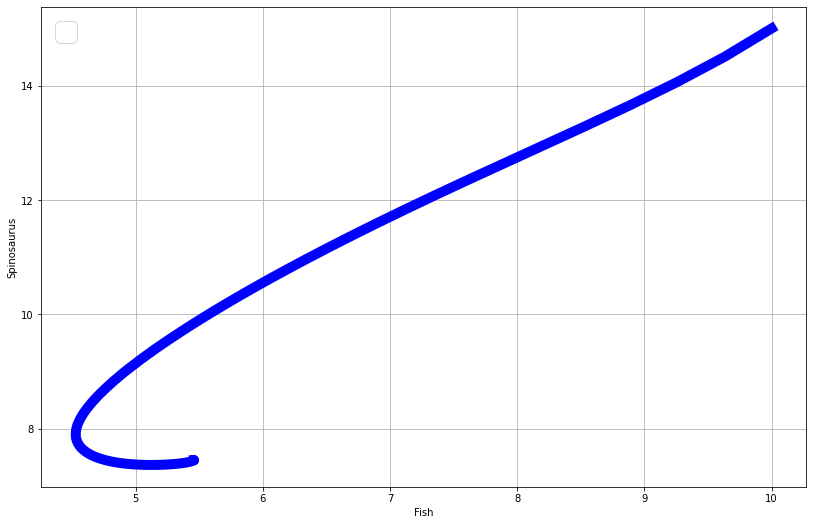

In [6]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(Fish, Spinosaurus, linestyle="-", linewidth=10, markersize=12,color="b")

plt.xlabel("Fish")
plt.ylabel("Spinosaurus")
plt.legend(fancybox=True, shadow=True)
plt.grid()
plt.rcParams.update({'font.size': 30})
leg = ax.legend(prop={"size":28})

plt.tight_layout()
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


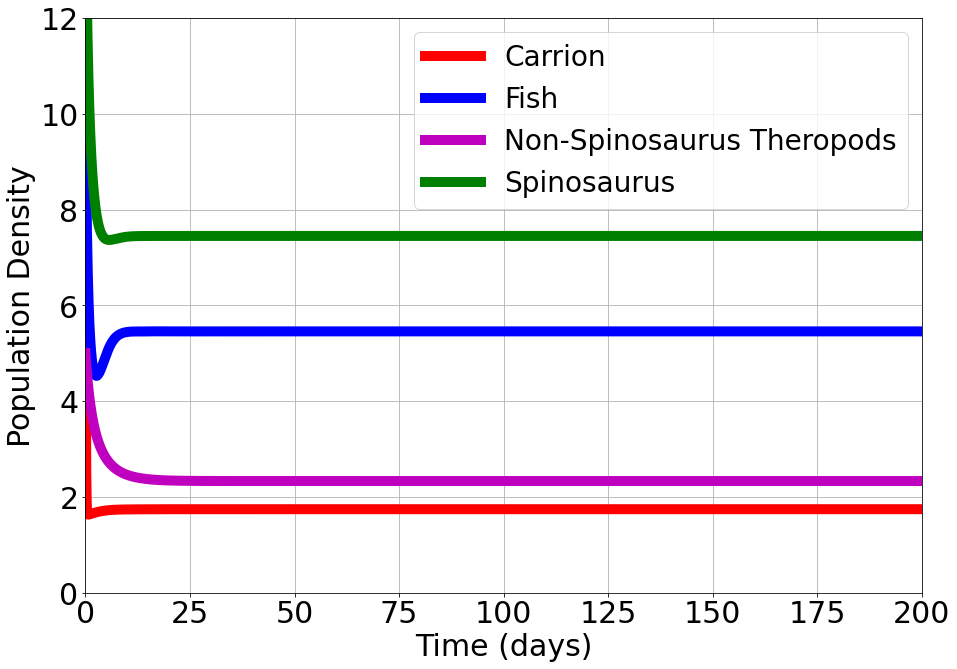

In [7]:
fig, ax = plt.subplots(figsize=(14, 10))

ax.plot(time_list, Carrion, label="Carrion", linestyle="-", linewidth=10, markersize=12,color="r")
ax.plot(time_list, Fish, label="Fish", linestyle="-", linewidth=10, markersize=12,color="b")
ax.plot(time_list, Other_Theropods, label="Non-Spinosaurus Theropods", linestyle="-", linewidth=10, markersize=12,color="m")
ax.plot(time_list, Spinosaurus, label="Spinosaurus", linestyle="-", linewidth=10, markersize=12,color="g")

plt.xlabel("Time (days)")
plt.ylabel("Population Density")
plt.legend(fancybox=True, shadow=True)
plt.xlim([0, time_list[-1]])
plt.ylim([0, 12])
plt.grid()
plt.rcParams.update({'font.size': 30})
leg = ax.legend(prop={"size":28})

plt.savefig('img/exponential_density_mediated_evolution.eps', format='eps')
plt.tight_layout()
plt.show()

## Sensitivity analysis

### Least-Squares objective function

In [8]:
from SALib.sample.morris import sample as ee_sample

mean_values_params = [
    lambda_T,
    lambda_S,
    alpha,
    beta,
    p,
    d,
    a_S,
    h_S,
    a_T,
    h_T,
    O,
    r_F,
    K_F,
    m_T,
    q_T,
    m_S,
    q_S,
]
factors_names = [
    r"$\lambda_T$",
    r"$\lambda_S$",
    r"$\alpha$",
    r"$\beta$",
    r"$p$",
    r"$d$",
    r"$a_S$",
    r"$h_S$",
    r"$a_T$",
    r"$h_T$",
    r"$O$",
    r"$r_F$",
    r"$K_F$",
    r"$m_T$",
    r"$q_T$",
    r"$m_S$",
    r"$q_S$",
]
params_perturbations = 0.5
problem_info = {
    'num_vars': len(mean_values_params),
    'names': factors_names,
    'bounds': [[param - params_perturbations * param, param + params_perturbations * param] for param in mean_values_params]
}

grid_level = 4
num_of_trajectories = 20
parameter_values = ee_sample(problem_info, grid_level, num_of_trajectories, local_optimization=False, seed=seed)

### Spinosaurus

In [9]:
from tqdm import tqdm

time_list_range = time_list

num_of_realizations = parameter_values.shape[0]
num_of_time_list_points = time_list_range.shape[0]
qoi_sensitivity_outputs = np.zeros([num_of_realizations, num_of_time_list_points])

for realization_index, parameters_realization in tqdm(enumerate(parameter_values), total=len(parameter_values)):
    
    realization_ODE_exponential_density_mediated = ode_solver_exponential_density_mediated(
        y0,
        (t0, tf + days_to_forecast),
        time_list_range,
        *parameters_realization
    )
    
    Carrion_realization, Fish_realization, Other_Theropods_realization, Spinosaurus_realization = realization_ODE_exponential_density_mediated.y
    
    qoi_sensitivity_outputs[realization_index, :] = Spinosaurus_realization

100%|██████████| 72/72 [00:01<00:00, 44.80it/s]


In [10]:
from SALib.analyze.morris import analyze as ee_analyze
import pandas as pd

df_Si = pd.DataFrame(columns=['time_list', *problem_info['names']])
df_sigmai = pd.DataFrame(columns=['time_list', *problem_info['names']])
df_Si['time_list'] = time_list
df_sigmai['time_list'] = time_list
for time_list_point in tqdm(range(num_of_time_list_points)):
    try:
        Si = ee_analyze(
            problem_info, 
            parameter_values, 
            qoi_sensitivity_outputs[:, time_list_point], 
            num_levels=grid_level, 
            seed=seed
        )
        Si['mu_star_normalized'] = Si['mu_star'] / Si['mu_star'].sum()
        sigmai_normalized = Si['sigma'] / Si['sigma'].sum()
        for idx, param_name in enumerate(problem_info['names']):
            df_Si.loc[time_list_point, param_name] = Si['mu_star_normalized'][idx]
            df_sigmai.loc[time_list_point, param_name] = sigmai_normalized[idx]
    except:
        continue

df_Si.sort_values(by='time_list', inplace=True)
df_Si.drop(index=0, inplace=True)
df_Si.dropna(inplace=True)
df_Si.reset_index(drop=True, inplace=True)

df_sigmai.sort_values(by='time_list', inplace=True)
df_sigmai.drop(index=0, inplace=True)
df_sigmai.dropna(inplace=True)
df_sigmai.reset_index(drop=True, inplace=True)

valid_time_lists = df_Si.time_list.values
df_Si

100%|██████████| 4000/4000 [01:36<00:00, 41.33it/s]


,time_list,$\lambda_T$,$\lambda_S$,$\alpha$,$\beta$,$p$,$d$,$a_S$,$h_S$,$a_T$,$h_T$,$O$,$r_F$,$K_F$,$m_T$,$q_T$,$m_S$,$q_S$
0,0.050013,3.75712e-13,0,2.0341e-12,0,0.000109889,0.000876672,0.0576425,0.346609,4.25604e-06,2.88993e-05,6.26071e-07,0.000258995,0.0026491,7.61522e-07,1.03331e-06,0.0369883,0.55483
1,0.100025,8.06814e-13,0,7.79155e-12,0,0.000158603,0.000437105,0.0595591,0.341832,3.40843e-06,3.56968e-05,1.25895e-06,0.000492074,0.00519831,2.22508e-07,1.0328e-06,0.0369653,0.555316
2,0.150038,2.90133e-12,0,2.53088e-11,0,0.000332498,0.000612323,0.0613403,0.336596,4.79526e-06,6.69112e-05,2.9518e-06,0.000728933,0.00774902,9.36578e-07,1.86624e-06,0.0369489,0.555615
3,0.200050,6.52366e-12,0,6.22661e-11,0,0.000713421,0.000864999,0.062958,0.330942,7.73132e-06,0.000125872,5.5316e-06,0.000978715,0.0103219,3.3443e-07,1.12065e-06,0.036943,0.556138
4,0.250063,1.36183e-11,0,1.23554e-10,0,0.00131465,0.00114757,0.0643961,0.325058,1.18364e-05,0.000207597,8.85171e-06,0.00124033,0.0129423,4.19127e-07,1.74755e-06,0.0369605,0.556711
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,199.799950,0.000177482,0,2.24984e-05,0,0.118054,0.0992323,0.0601093,0.106152,0.00332812,0.0083486,0.00725059,0.243942,0.102641,0.00501594,0.011707,0.052649,0.181369
3995,199.849962,0.00017748,0,2.24996e-05,0,0.118045,0.0985586,0.0601216,0.106151,0.00332809,0.00834852,0.00725021,0.243934,0.10264,0.0048741,0.0117068,0.0526484,0.182193
3996,199.899975,0.000177478,0,2.25008e-05,0,0.118037,0.0978936,0.0601337,0.10615,0.00332806,0.00834844,0.00724962,0.243926,0.102639,0.00472834,0.0117065,0.052648,0.183011
3997,199.949987,0.000177476,0,2.2502e-05,0,0.118028,0.0972382,0.0601456,0.10615,0.00332803,0.00834837,0.00724883,0.243918,0.102639,0.00457886,0.0117062,0.0526475,0.183824


In [11]:
df_sigmai

,time_list,$\lambda_T$,$\lambda_S$,$\alpha$,$\beta$,$p$,$d$,$a_S$,$h_S$,$a_T$,$h_T$,$O$,$r_F$,$K_F$,$m_T$,$q_T$,$m_S$,$q_S$
0,0.050013,2.72287e-12,0,1.528e-11,0,0.000710591,0.00381426,0.116922,0.710441,1.1749e-05,0.000220137,4.30537e-06,0.00207867,0.0057759,5.19745e-06,8.13526e-06,0.00600602,0.154003
1,0.100025,4.50481e-12,0,5.24252e-11,0,0.000389645,0.00104102,0.112031,0.606328,7.32194e-06,0.000117545,7.00853e-06,0.00349943,0.00973588,1.49121e-06,7.94463e-06,0.0101062,0.256727
2,0.150038,1.8994e-11,0,1.66414e-10,0,0.00110072,0.000543634,0.108008,0.524194,1.29721e-05,0.000284319,1.77074e-05,0.00463904,0.0127854,4.19854e-06,1.11038e-05,0.0130398,0.335359
3,0.200050,3.98668e-11,0,3.86204e-10,0,0.0025347,0.000941657,0.104903,0.459198,2.20568e-05,0.000547031,3.2265e-05,0.00552889,0.0155079,5.69218e-07,3.00491e-06,0.0152705,0.395511
4,0.250063,7.98553e-11,0,7.2241e-10,0,0.00470771,0.00150697,0.102345,0.406715,3.35979e-05,0.000898308,4.96648e-05,0.00628906,0.0182327,8.49432e-07,2.90166e-06,0.0170212,0.442197
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,199.799950,0.000338103,0,2.20346e-05,0,0.0935739,0.101608,0.0683878,0.158986,0.00463623,0.00832136,0.00862004,0.22228,0.0863918,0.00833274,0.00755892,0.0472809,0.183662
3995,199.849962,0.000338748,0,2.20787e-05,0,0.093754,0.100835,0.0685359,0.159289,0.00464507,0.00833724,0.00863633,0.222694,0.0865567,0.00806945,0.00757341,0.0473711,0.183341
3996,199.899975,0.000339386,0,2.21223e-05,0,0.093932,0.100078,0.0686822,0.159589,0.00465382,0.00835293,0.00865232,0.223103,0.0867196,0.00779739,0.00758774,0.0474603,0.18303
3997,199.949987,0.000340015,0,2.21653e-05,0,0.0941077,0.0993371,0.0688265,0.159885,0.00466245,0.00836842,0.00866799,0.223507,0.0868804,0.00751698,0.00760187,0.0475483,0.182728


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


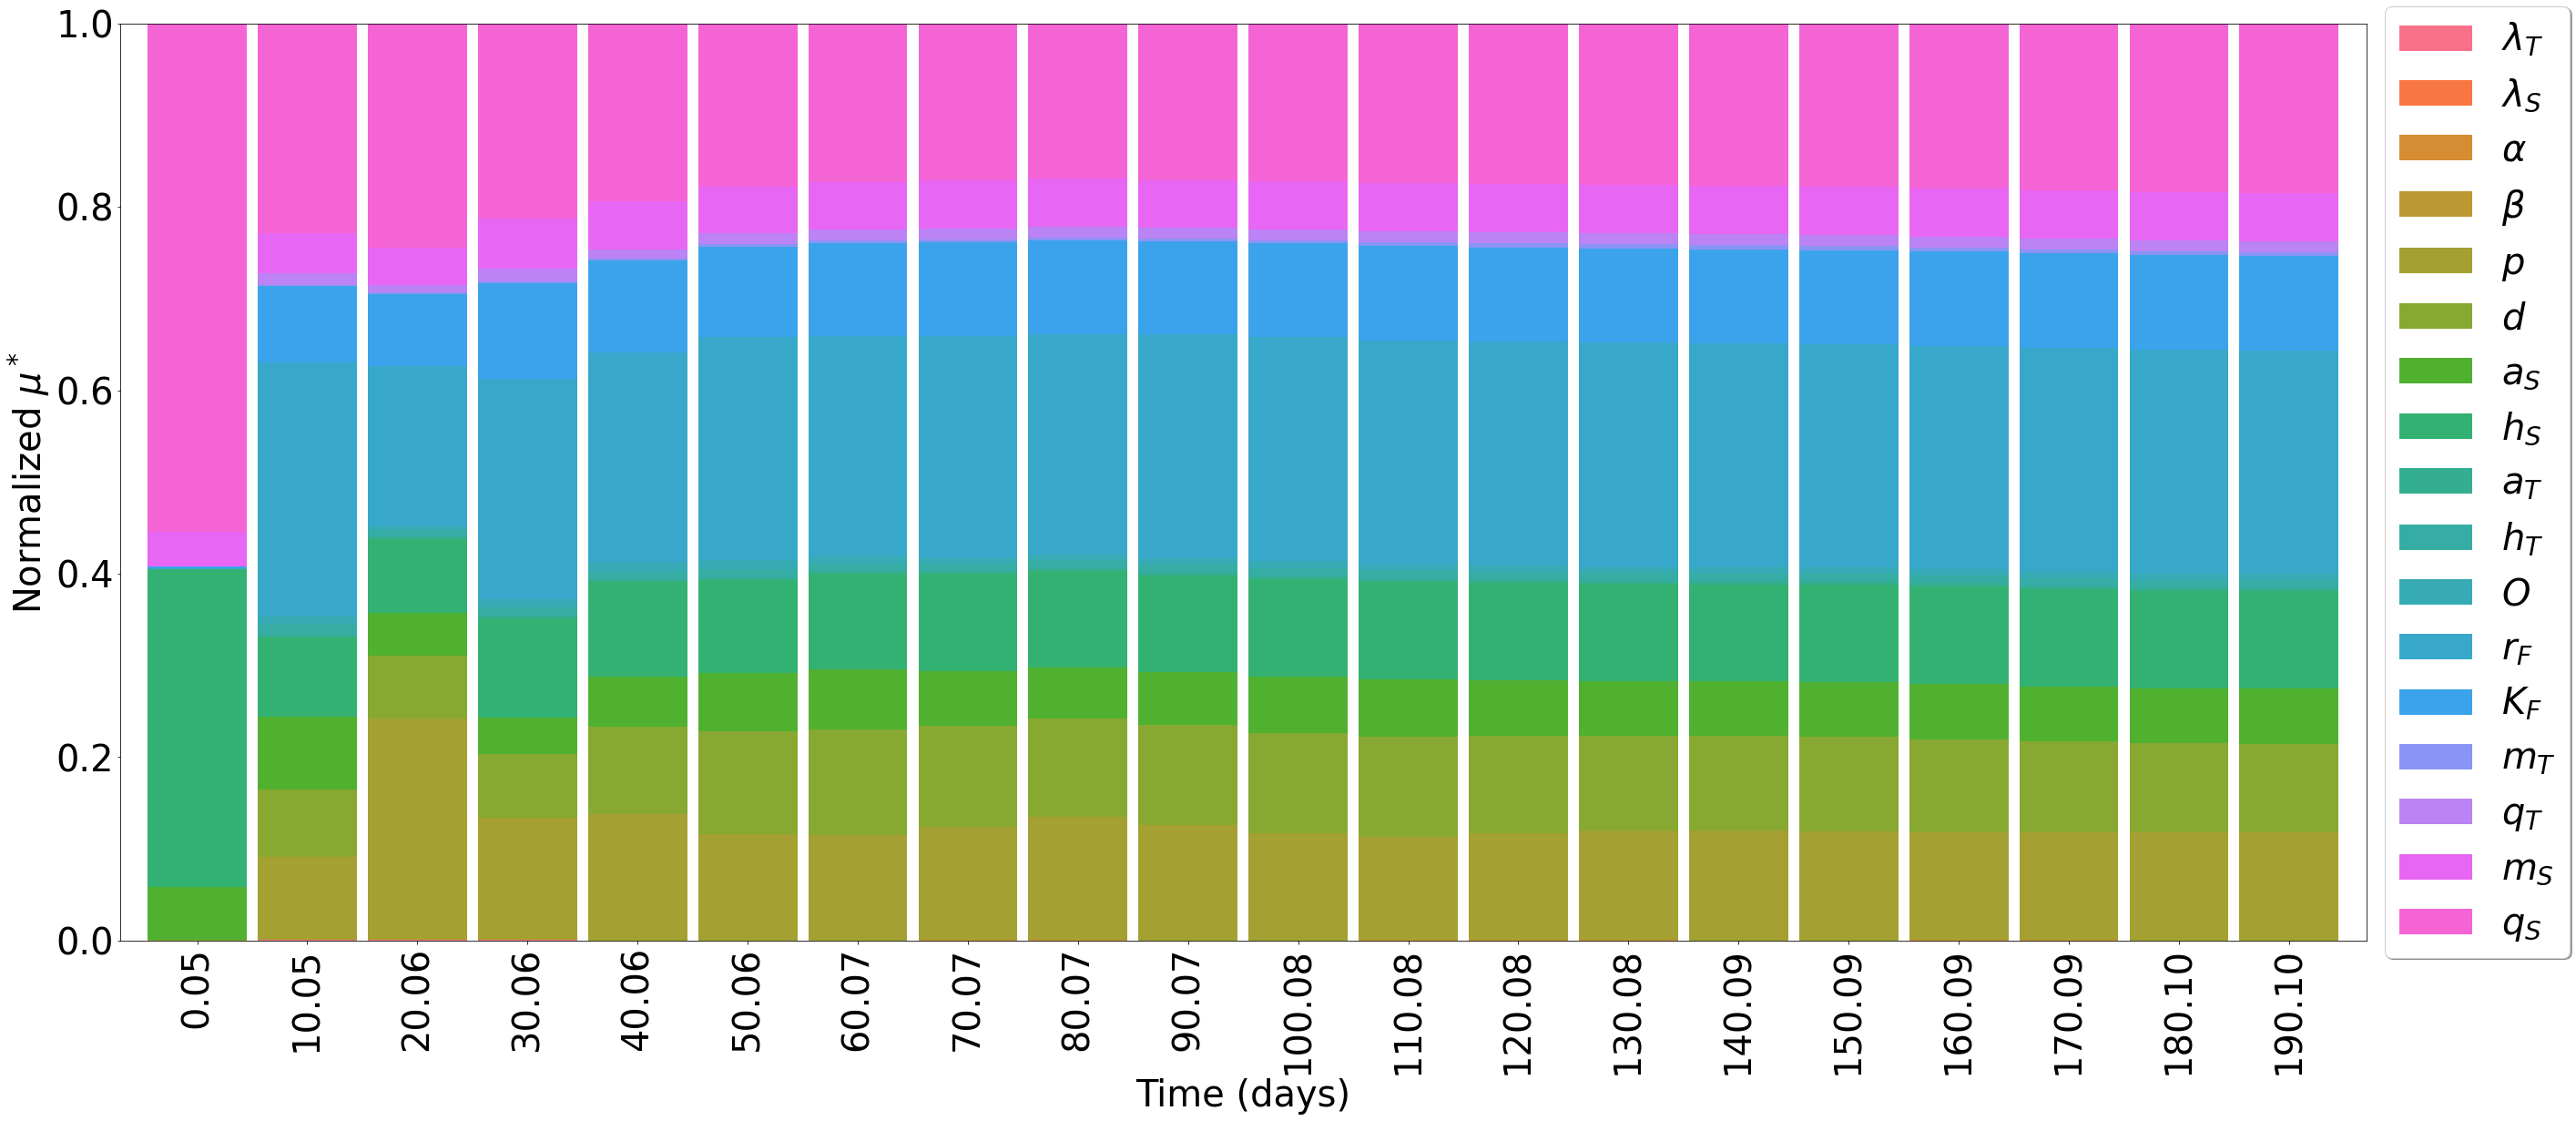

In [12]:
import seaborn as sns

fig = plt.figure()
ax = plt.subplot(111)
step_to_plot = 200
valid_time_lists_to_plot_mu = valid_time_lists[::step_to_plot]

colors = sns.color_palette("husl",18)
ax.set_prop_cycle('color', colors)

df_Si[::step_to_plot].plot.bar(x='time_list', rot=90, width=0.9, figsize=(40, 18), stacked=True, ax=ax, color=colors)
ax.xaxis.set_major_formatter(lambda x, pos: f"{valid_time_lists_to_plot_mu[x]:.2f}")
plt.xlabel("Time (days)", fontsize = 40)
plt.ylabel(r"Normalized $\mu^*$", fontsize = 40)

plt.xticks(fontsize=40)
plt.yticks(fontsize=40)

plt.ylim([0, 1])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1, fancybox=True, shadow=True, fontsize=40)
#ncol = len(problem_info['names'])

plt.tight_layout()
plt.savefig("img/exponential_density_mediated_SA_Spinosaurus_mu_star.eps", format='eps', bbox_inches = "tight", dpi=300)
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


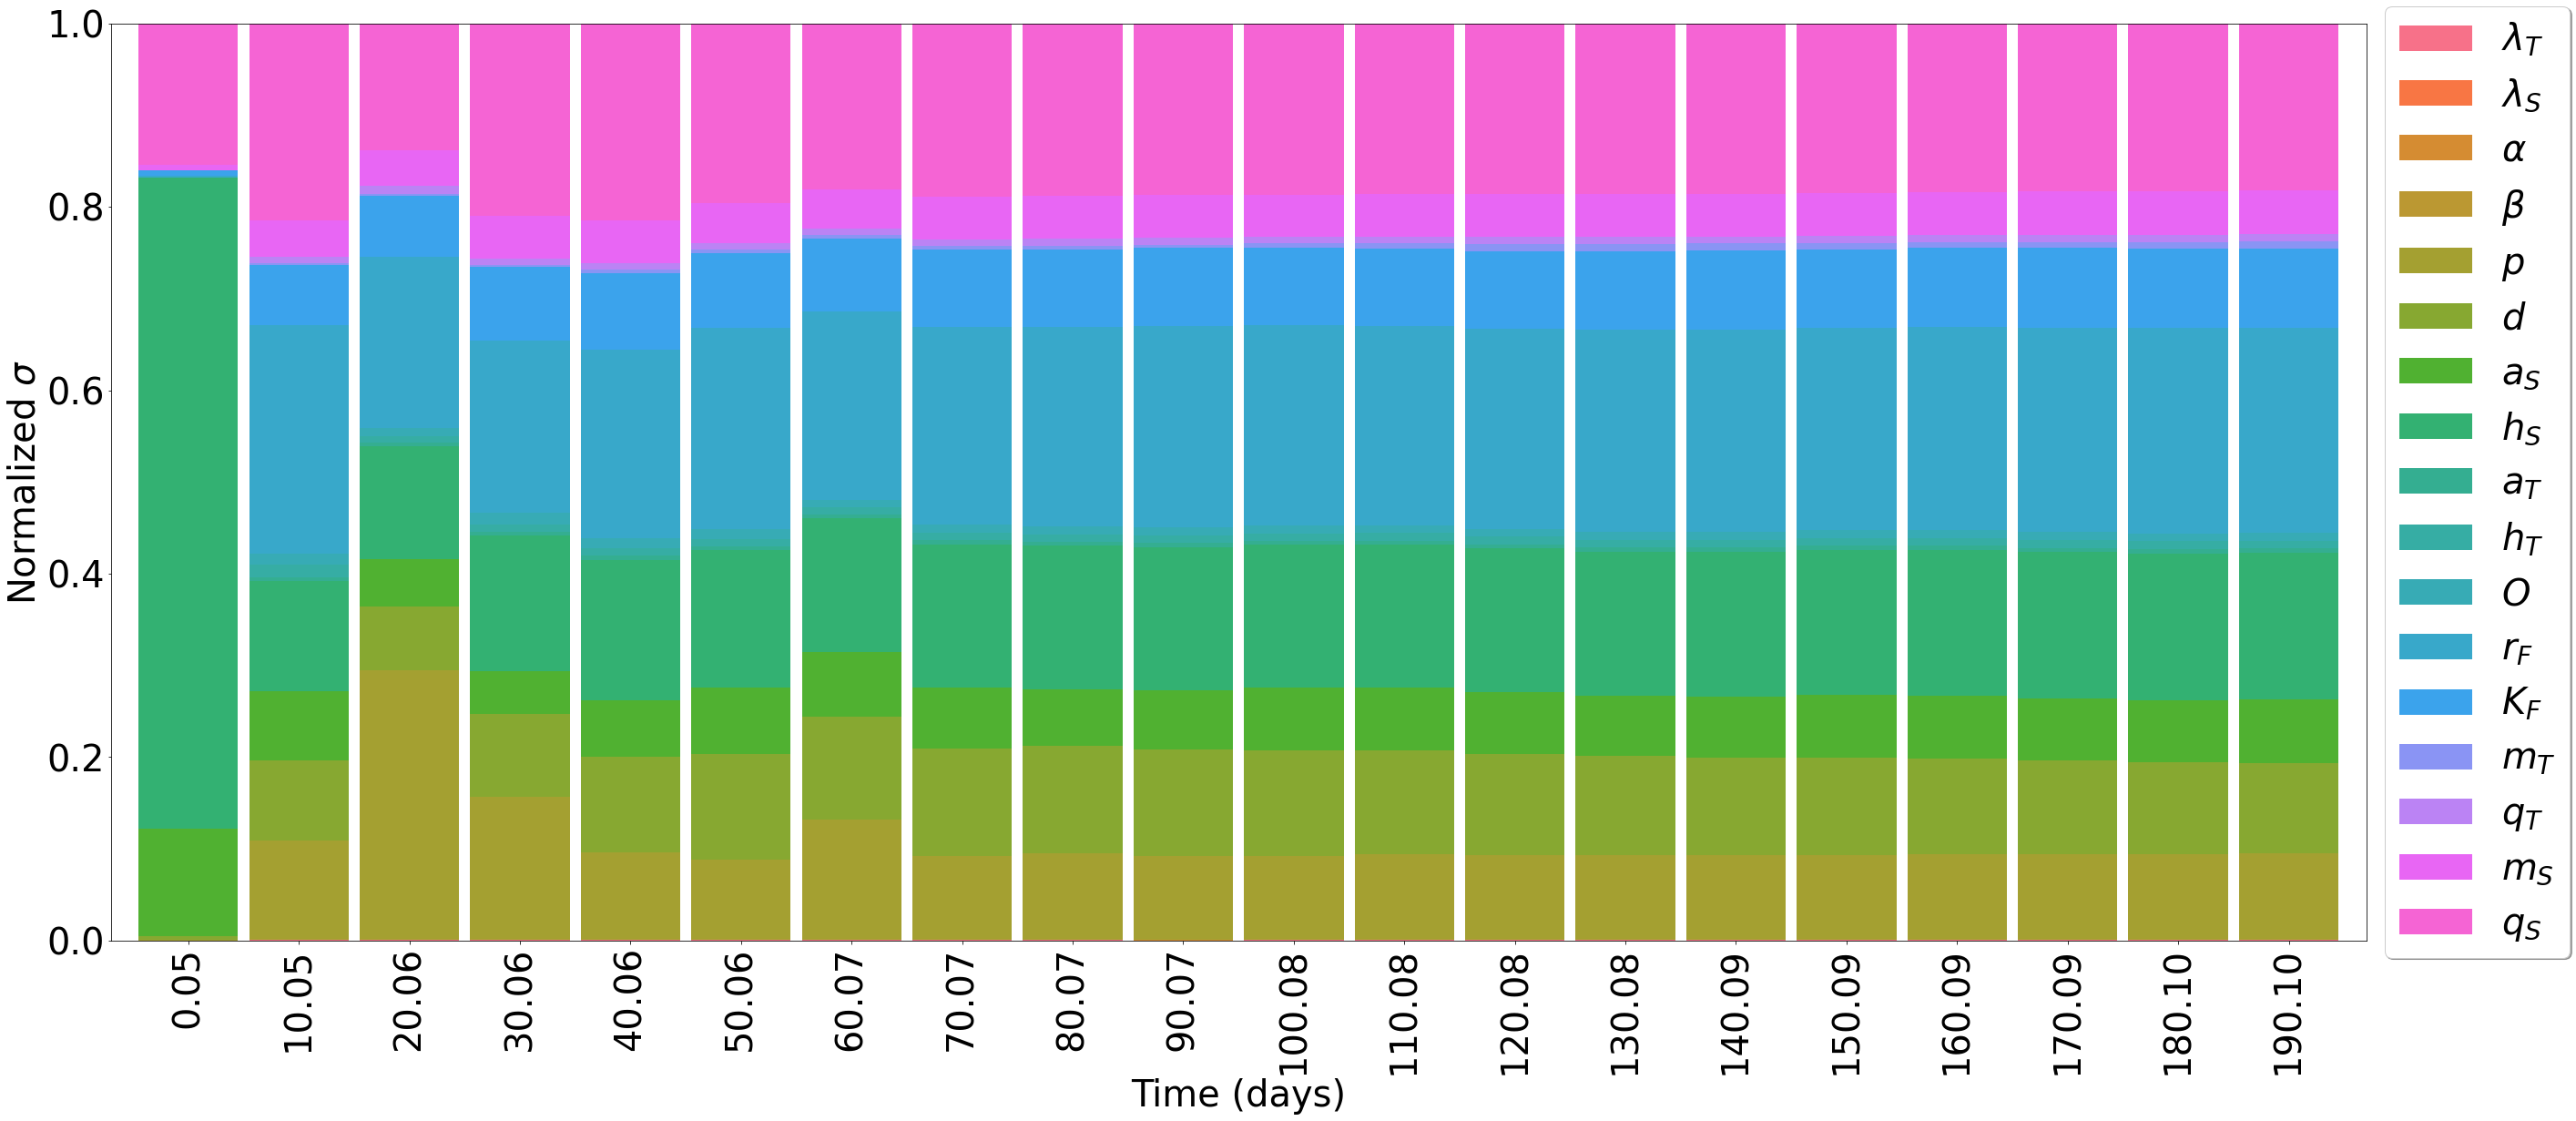

In [13]:
import seaborn as sns

fig = plt.figure()
ax = plt.subplot(111)
step_to_plot = 200
valid_time_lists_to_plot_sigma = valid_time_lists[::step_to_plot]

colors = sns.color_palette("husl",18)
ax.set_prop_cycle('color', colors)

df_sigmai[::step_to_plot].plot.bar(x='time_list', rot=90, width=0.9, figsize=(40, 18), stacked=True, ax=ax, color=colors)
ax.xaxis.set_major_formatter(lambda x, pos: f"{valid_time_lists_to_plot_sigma[x]:.2f}")
plt.xlabel("Time (days)", fontsize = 40)
plt.ylabel(r"Normalized $\sigma$", fontsize = 40)

plt.xticks(fontsize=40)
plt.yticks(fontsize=40)

plt.ylim([0, 1])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1, fancybox=True, shadow=True, fontsize=40)

plt.tight_layout()
plt.savefig("img/exponential_density_mediated_SA_Spinosaurus_sigma.eps", format='eps', bbox_inches = "tight", dpi=300)
plt.show()

### Non-Spinosaurus Theropods

In [14]:
from tqdm import tqdm

time_list_range = time_list

num_of_realizations = parameter_values.shape[0]
num_of_time_list_points = time_list_range.shape[0]
qoi_sensitivity_outputs = np.zeros([num_of_realizations, num_of_time_list_points])

for realization_index, parameters_realization in tqdm(enumerate(parameter_values), total=len(parameter_values)):
    
    realization_ODE_exponential_density_mediated = ode_solver_exponential_density_mediated(
        y0,
        (t0, tf + days_to_forecast),
        time_list_range,
        *parameters_realization
    )
    
    Carrion_realization, Fish_realization, Other_Theropods_realization, Spinosaurus_realization = realization_ODE_exponential_density_mediated.y
    
    qoi_sensitivity_outputs[realization_index, :] = Other_Theropods_realization

100%|██████████| 72/72 [00:01<00:00, 42.27it/s]


In [15]:
from SALib.analyze.morris import analyze as ee_analyze
import pandas as pd

df_Si = pd.DataFrame(columns=['time_list', *problem_info['names']])
df_sigmai = pd.DataFrame(columns=['time_list', *problem_info['names']])
df_Si['time_list'] = time_list
df_sigmai['time_list'] = time_list
for time_list_point in tqdm(range(num_of_time_list_points)):
    try:
        Si = ee_analyze(
            problem_info, 
            parameter_values, 
            qoi_sensitivity_outputs[:, time_list_point], 
            num_levels=grid_level, 
            seed=seed
        )
        Si['mu_star_normalized'] = Si['mu_star'] / Si['mu_star'].sum()
        sigmai_normalized = Si['sigma'] / Si['sigma'].sum()
        for idx, param_name in enumerate(problem_info['names']):
            df_Si.loc[time_list_point, param_name] = Si['mu_star_normalized'][idx]
            df_sigmai.loc[time_list_point, param_name] = sigmai_normalized[idx]
    except:
        continue

df_Si.sort_values(by='time_list', inplace=True)
df_Si.drop(index=0, inplace=True)
df_Si.dropna(inplace=True)
df_Si.reset_index(drop=True, inplace=True)

df_sigmai.sort_values(by='time_list', inplace=True)
df_sigmai.drop(index=0, inplace=True)
df_sigmai.dropna(inplace=True)
df_sigmai.reset_index(drop=True, inplace=True)

valid_time_lists = df_Si.time_list.values
df_Si

100%|██████████| 4000/4000 [01:51<00:00, 35.83it/s]


,time_list,$\lambda_T$,$\lambda_S$,$\alpha$,$\beta$,$p$,$d$,$a_S$,$h_S$,$a_T$,$h_T$,$O$,$r_F$,$K_F$,$m_T$,$q_T$,$m_S$,$q_S$
0,0.050013,1.62674e-06,0,9.27857e-06,0,0.000117187,0.000299562,1.05624e-06,4.18815e-05,0.187069,0.0858142,0.227335,1.04826e-07,1.03574e-07,0.0828685,0.416441,1.05708e-07,1.93181e-06
1,0.100025,1.505e-06,0,8.50977e-06,0,5.69088e-05,0.000126325,6.40093e-07,2.094e-05,0.186276,0.0854425,0.229152,1.23375e-07,9.71587e-08,0.0824814,0.416431,1.37455e-07,1.43723e-06
2,0.150038,1.40458e-06,0,7.9074e-06,0,3.45131e-05,9.00382e-05,5.26157e-07,1.14916e-05,0.185473,0.0850749,0.230948,1.62113e-07,6.63899e-08,0.0820895,0.416265,2.3008e-07,2.84443e-06
3,0.200050,1.32461e-06,0,7.47818e-06,0,2.71486e-05,6.94409e-05,4.97646e-07,9.53881e-06,0.184694,0.0847211,0.232714,2.39623e-08,2.03197e-08,0.0817066,0.416047,2.63158e-07,2.1121e-06
4,0.250063,1.26157e-06,0,7.22444e-06,0,2.15753e-05,5.54902e-05,5.0284e-07,8.6261e-06,0.18394,0.0843878,0.23445,5.83816e-09,1.41748e-08,0.0813375,0.415787,3.3636e-07,2.425e-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,199.799950,0.00525151,0,0.00119575,0,0.00233719,0.00083556,0.0037862,0.00951351,0.173135,0.0957664,0.310286,0.000800034,0.0010341,0.0767356,0.316839,0.000251942,0.00223158
3995,199.849962,0.0052515,0,0.00119575,0,0.0023368,0.000835447,0.00378637,0.00951351,0.173135,0.0957664,0.310286,0.000800022,0.0010341,0.0767356,0.316839,0.000251941,0.00223228
3996,199.899975,0.0052515,0,0.00119575,0,0.0023364,0.000835335,0.00378654,0.00951351,0.173135,0.0957664,0.310286,0.000800009,0.0010341,0.0767355,0.316839,0.000251941,0.002233
3997,199.949987,0.0052515,0,0.00119575,0,0.00233597,0.000835223,0.00378671,0.0095135,0.173135,0.0957663,0.310286,0.000799995,0.00103409,0.0767354,0.316839,0.000251941,0.00223373


In [16]:
df_sigmai

,time_list,$\lambda_T$,$\lambda_S$,$\alpha$,$\beta$,$p$,$d$,$a_S$,$h_S$,$a_T$,$h_T$,$O$,$r_F$,$K_F$,$m_T$,$q_T$,$m_S$,$q_S$
0,0.050013,1.3633e-05,0,4.66192e-05,0,0.000758199,0.00159662,6.65308e-06,0.000332423,0.422951,0.266642,0.280801,1.14078e-06,4.37386e-07,0.00312088,0.0237244,4.93594e-07,5.06526e-06
1,0.100025,1.20782e-05,0,3.87268e-05,0,0.00036983,0.000578186,3.63778e-06,0.00016719,0.406911,0.252426,0.288741,1.37638e-06,7.70583e-07,0.00583392,0.0449094,7.4854e-07,6.63728e-06
2,0.150038,1.08098e-05,0,3.25589e-05,0,0.00019585,0.00042286,2.77369e-06,7.8164e-05,0.392027,0.239473,0.295459,1.75069e-06,3.45641e-07,0.00820642,0.064082,1.30879e-06,5.99141e-06
3,0.200050,9.80107e-06,0,2.79961e-05,0,0.000152094,0.000309267,2.54942e-06,5.90734e-05,0.378456,0.227925,0.301455,2.47978e-07,8.3038e-08,0.0102548,0.0813393,1.63892e-06,7.70889e-06
4,0.250063,8.99379e-06,0,2.49012e-05,0,0.000115311,0.000235656,2.54349e-06,4.16737e-05,0.366073,0.217561,0.306868,4.83445e-08,8.74479e-08,0.0120463,0.0970109,2.17356e-06,9.61945e-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,199.799950,0.0212385,0,0.00235368,0,0.00922953,0.00282257,0.013788,0.0389862,0.14038,0.0969212,0.342962,0.00254531,0.00389091,0.0138555,0.302054,0.000855047,0.00811814
3995,199.849962,0.0212385,0,0.00235368,0,0.00922795,0.00282298,0.0137878,0.0389862,0.14038,0.0969212,0.342962,0.00254532,0.00389091,0.0138555,0.302054,0.000855047,0.00811881
3996,199.899975,0.0212386,0,0.00235368,0,0.00922627,0.00282341,0.0137877,0.0389863,0.14038,0.0969213,0.342963,0.00254533,0.00389092,0.0138556,0.302054,0.000855048,0.00811949
3997,199.949987,0.0212386,0,0.00235368,0,0.00922451,0.00282385,0.0137875,0.0389863,0.14038,0.0969213,0.342963,0.00254534,0.00389092,0.0138557,0.302054,0.000855048,0.00812018


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


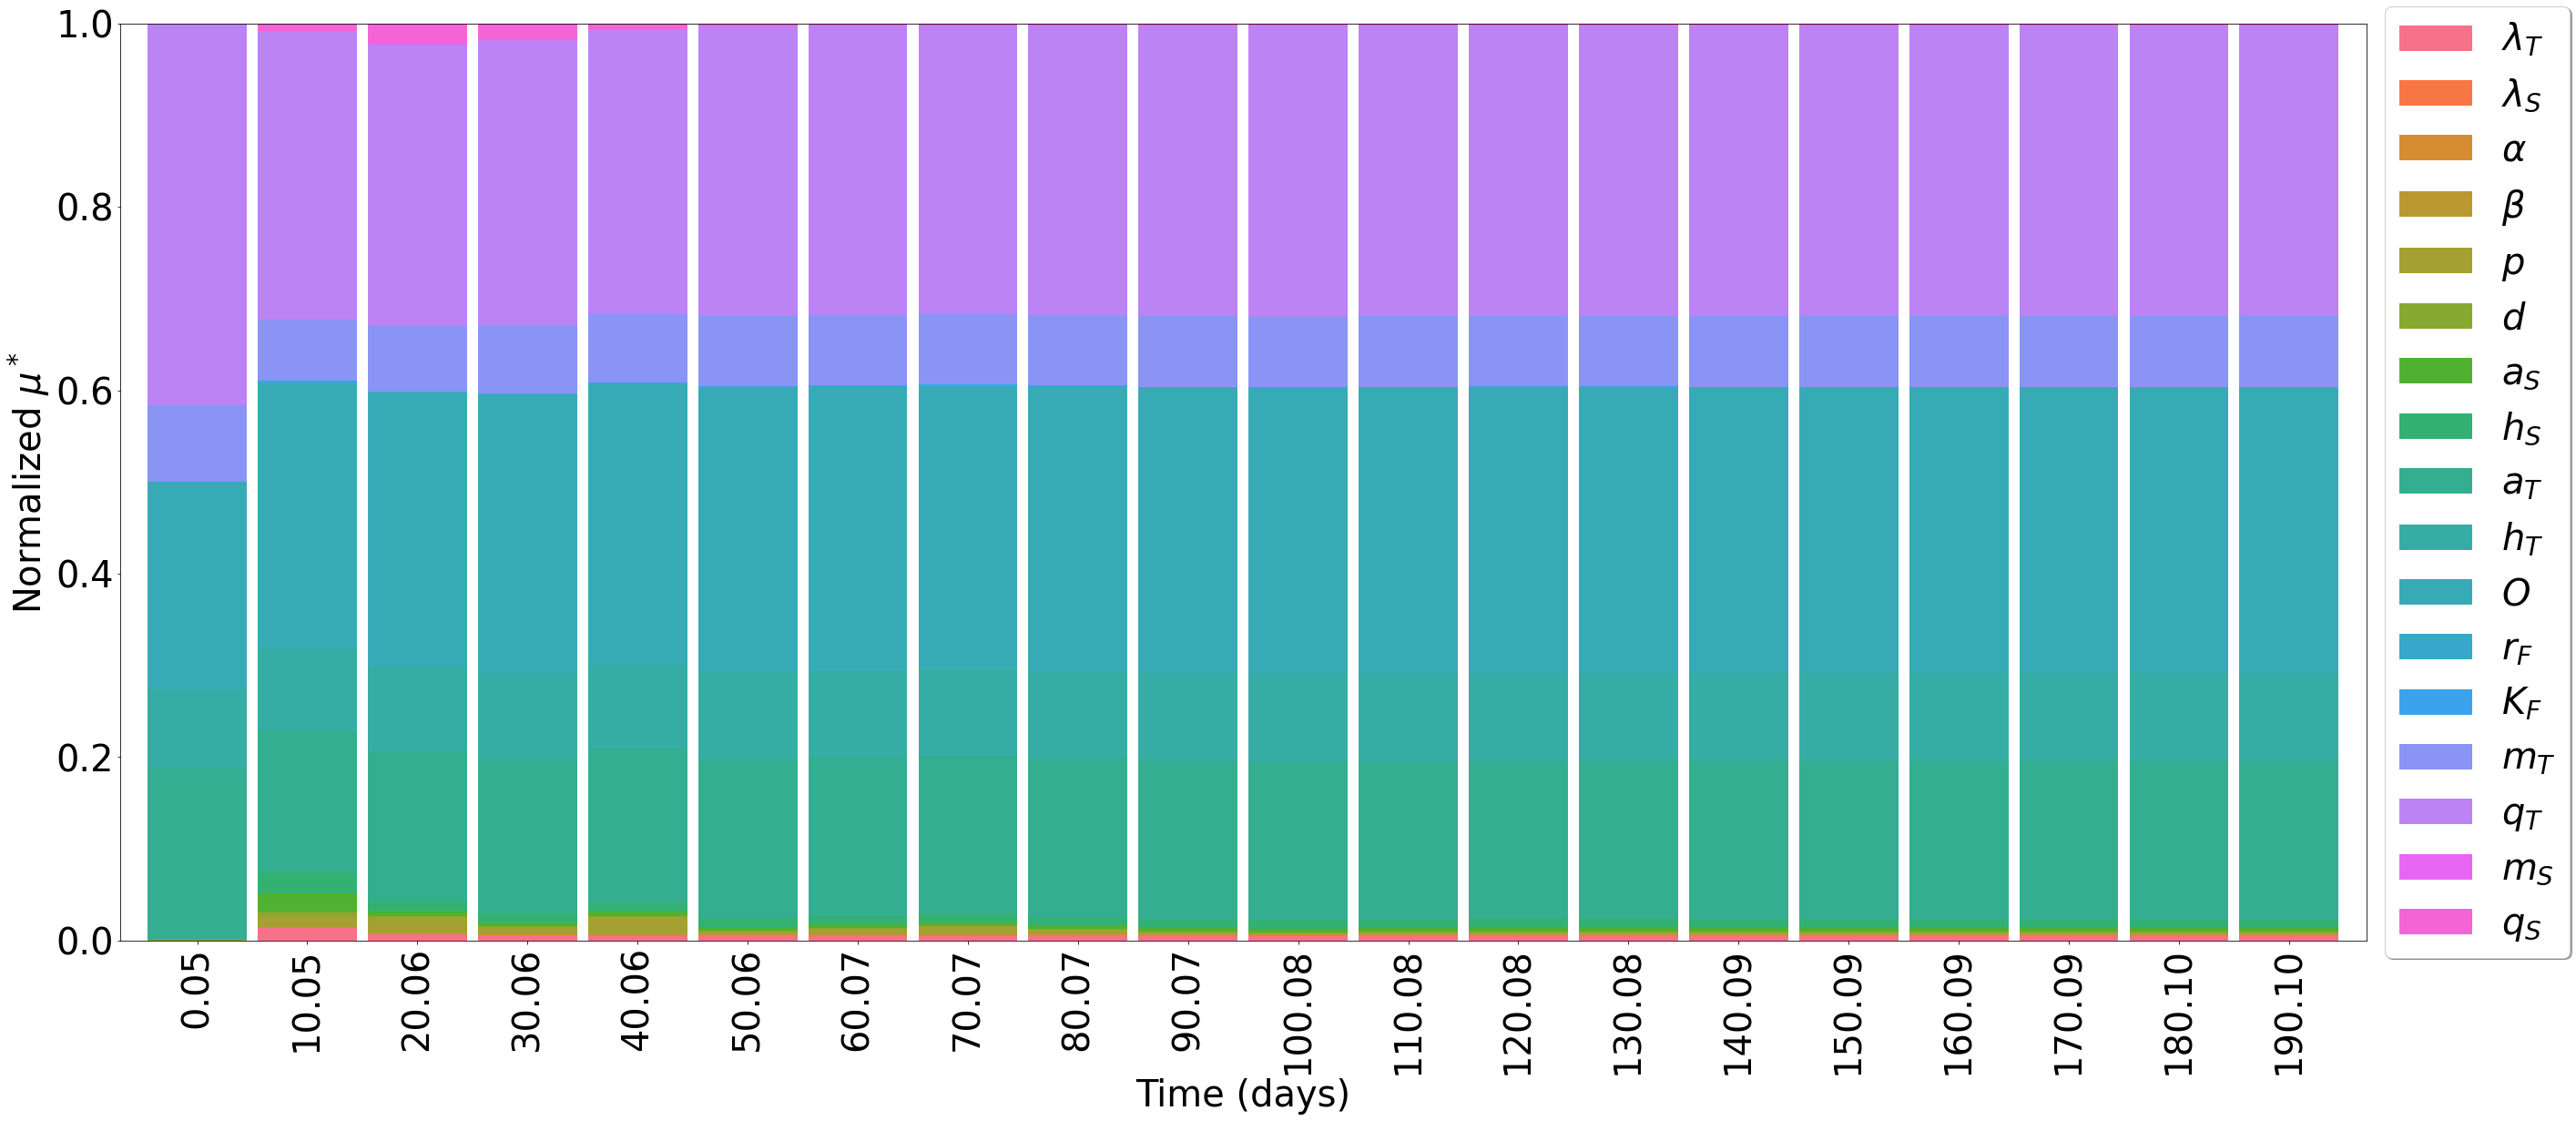

In [17]:
import seaborn as sns

fig = plt.figure()
ax = plt.subplot(111)
step_to_plot = 200
valid_time_lists_to_plot_mu = valid_time_lists[::step_to_plot]

colors = sns.color_palette("husl",18)
ax.set_prop_cycle('color', colors)

df_Si[::step_to_plot].plot.bar(x='time_list', rot=90, width=0.9, figsize=(40, 18), stacked=True, ax=ax, color=colors)
ax.xaxis.set_major_formatter(lambda x, pos: f"{valid_time_lists_to_plot_mu[x]:.2f}")
plt.xlabel("Time (days)", fontsize = 40)
plt.ylabel(r"Normalized $\mu^*$", fontsize = 40)

plt.xticks(fontsize=40)
plt.yticks(fontsize=40)

plt.ylim([0, 1])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1, fancybox=True, shadow=True, fontsize=40)

plt.tight_layout()
plt.savefig("img/exponential_density_mediated_SA_Other_Theropods_mu_star.eps", format='eps', bbox_inches = "tight", dpi=300)
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


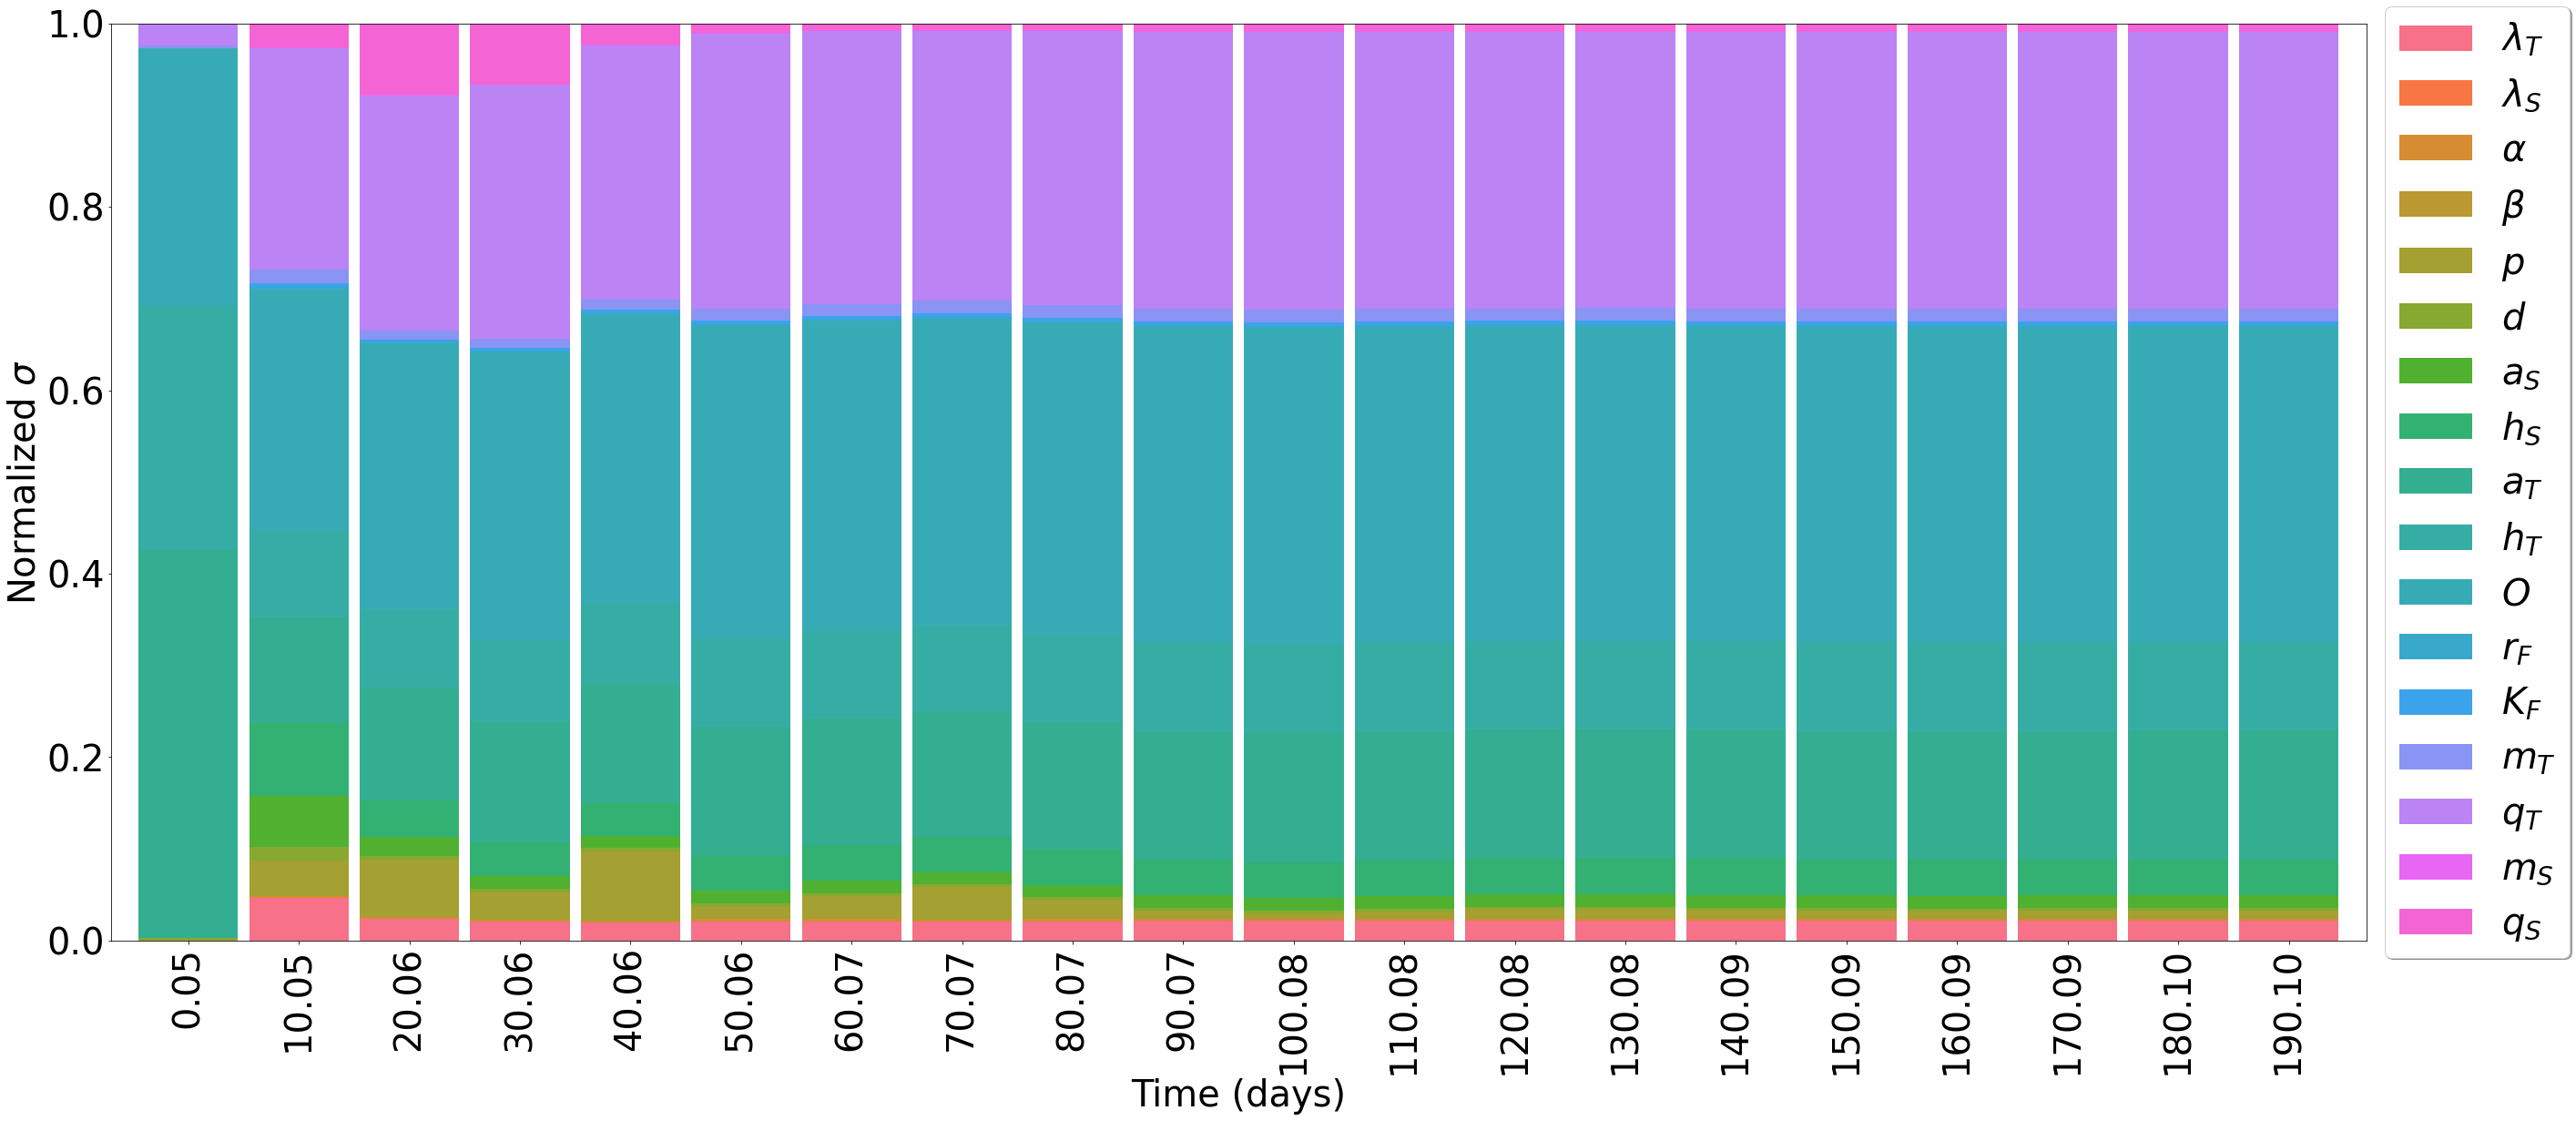

In [18]:
import seaborn as sns

fig = plt.figure()
ax = plt.subplot(111)
step_to_plot = 200
valid_time_lists_to_plot_sigma = valid_time_lists[::step_to_plot]

colors = sns.color_palette("husl",18)
ax.set_prop_cycle('color', colors)

df_sigmai[::step_to_plot].plot.bar(x='time_list', rot=90, width=0.9, figsize=(40, 18), stacked=True, ax=ax, color=colors)
ax.xaxis.set_major_formatter(lambda x, pos: f"{valid_time_lists_to_plot_sigma[x]:.2f}")
plt.xlabel("Time (days)", fontsize = 40)
plt.ylabel(r"Normalized $\sigma$", fontsize = 40)

plt.xticks(fontsize=40)
plt.yticks(fontsize=40)

plt.ylim([0, 1])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1, fancybox=True, shadow=True, fontsize=40)

plt.tight_layout()
plt.savefig("img/exponential_density_mediated_SA_Other_Theropods_sigma.eps", format='eps', bbox_inches = "tight", dpi=300)
plt.show()

## Continuation diagram

In [19]:
plt.rcParams.update({'font.size': 8})

SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rcParams['lines.linewidth'] = BIGGER_SIZE
plt.rcParams.update({'font.size': BIGGER_SIZE})

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

Plotting results: 100%|██████████| 4/4 [00:00<00:00, 37.03it/s]
<ipython-input-20-8d55498869ae>:133: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


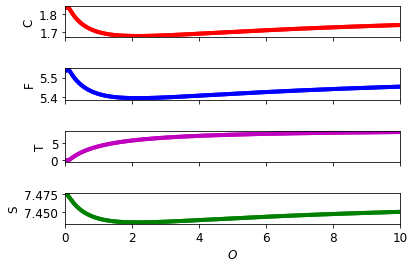

In [20]:
def run_continuation_analysis(
    ode_solver_wrapper,
    continuation_variable_name,
    parameter_span,
    parameter_num_of_points,
    fixed_parameters_dict,
    initial_conditions,
    output_variable_name_list,
    num_of_last_outcomes,
):
    if type(continuation_variable_name) != str:
        raise ValueError("Input continuation_variable_name must be of str type.")

    if type(parameter_num_of_points) != int:
        raise ValueError("Input parameter_num_of_points must be of integer type.")

    parameter_span_type = type(parameter_span)
    if parameter_span_type != tuple and parameter_span_type != list:
        raise ValueError("Input parameter_span must be a list or tuple of values.")
    else:
        if len(parameter_span) != 2:
            raise ValueError("Input parameter_span must be a list or tuple with two values.")

    if len(initial_conditions) != len(output_variable_name_list):
        raise ValueError(
            "The number of output variables from ODE model must be equal to number of initial conditions."
        )

    parameter_values = np.linspace(parameter_span[0], parameter_span[1], parameter_num_of_points)
    continuation_parameter_values_dict = {continuation_variable_name: parameter_values}
    time_values = time_list

    # Creating dictionary to record continuation realizations
    output_variables_dict = dict()
    for output_variable_name in output_variable_name_list:
        output_variables_dict[output_variable_name] = list()

    # Running continuation evaluations
    parameter_progress_bar = tqdm(parameter_values)
    for parameter_value in parameter_progress_bar:
        parameter_progress_bar.set_description("Running continuation")
        parameters = fixed_parameters
        parameters[continuation_variable_name] = parameter_value
        ode_solver_output = ode_solver_wrapper(initial_conditions, (t0, tf + days_to_forecast), time_values, **parameters)
        t_output, y_output = ode_solver_output.t, ode_solver_output.y
        y_last_outputs = y_output[:, -num_of_last_outcomes:]
        output_index = 0
        for output_variable_name in output_variable_name_list:
            output_variable_last_results = y_last_outputs[output_index]
            output_variables_dict[output_variable_name].append(
                [output_variable_last_results.min(), output_variable_last_results.max()]
            )
            output_index += 1

    return continuation_parameter_values_dict, output_variables_dict

fixed_parameters = {
    "lambda_T": lambda_T,
    "lambda_S": lambda_S,
    "alpha": alpha,
    "beta": beta,
    "p": p,
    "d": d,
    "a_S": a_S,
    "h_S": h_S,
    "a_T": a_T,
    "h_T": h_T,
#    "O": O,
    "r_F": r_F,
    "K_F": K_F,
    "m_T": m_T,
    "q_T": q_T,
    "m_S": m_S,
    "q_S": q_S
}


O_min = 0
O_max = 10
O_points = np.linspace(O_min, O_max, num_of_points)
parameter_to_continuation = {"O": O_points}

O_values, y_last_results = run_continuation_analysis(
    ode_solver_wrapper=ode_solver_exponential_density_mediated,
    continuation_variable_name="O",
    parameter_span=(O_min, O_max),
    parameter_num_of_points=num_of_points,
    fixed_parameters_dict=fixed_parameters,
    initial_conditions=y0,
    output_variable_name_list=["C", "F", "T", "S"],
    num_of_last_outcomes=1000,
)

colors_list = ["r", "b", "m", "g"]
results_progress_bar = tqdm(y_last_results)
num_of_state_variables = len(y_last_results)
fig, axs = plt.subplots(num_of_state_variables, sharex=True, gridspec_kw={"hspace": 1})
index = 0
for variable_name in results_progress_bar:
    results_progress_bar.set_description("Plotting results")
    variable_result = np.array(y_last_results[variable_name])
    variable_min_values = variable_result[:, 0].astype(np.int)
    variable_max_values = variable_result[:, 1].astype(np.int)

    color = colors_list[index]
#    axs[index].fill_between(
#        O_values["O"], variable_min_values, variable_max_values, color=color, alpha=1, linewidth=4
    axs[index].plot(
        O_values["O"], variable_result, color=color, alpha=1, linewidth=4
    )

    index += 1

for ax, variable_name in zip(axs.flat, y_last_results):
    ax.set(xlabel=r"$O$", ylabel=f"{variable_name}", xlim=(O_min, O_max))
    ax.plot(linewidth=15, markersize=20)
    ax.label_outer()

SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rcParams['lines.linewidth'] = BIGGER_SIZE
plt.rcParams.update({'font.size': BIGGER_SIZE})

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

plt.tight_layout()
plt.savefig("img/exponential_density_mediated_continuation_O.eps", format='eps', bbox_inches = "tight", dpi=300)

Plotting results: 100%|██████████| 4/4 [00:00<00:00, 27.40it/s]
<ipython-input-21-de77f56fa07b>:121: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


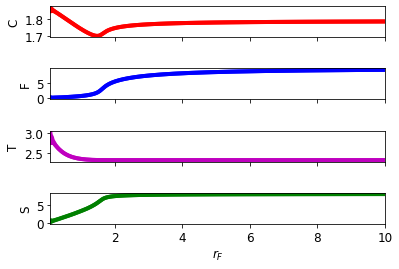

In [21]:
def run_continuation_analysis(
    ode_solver_wrapper,
    continuation_variable_name,
    parameter_span,
    parameter_num_of_points,
    fixed_parameters_dict,
    initial_conditions,
    output_variable_name_list,
    num_of_last_outcomes,
):
    if type(continuation_variable_name) != str:
        raise ValueError("Input continuation_variable_name must be of str type.")

    if type(parameter_num_of_points) != int:
        raise ValueError("Input parameter_num_of_points must be of integer type.")

    parameter_span_type = type(parameter_span)
    if parameter_span_type != tuple and parameter_span_type != list:
        raise ValueError("Input parameter_span must be a list or tuple of values.")
    else:
        if len(parameter_span) != 2:
            raise ValueError("Input parameter_span must be a list or tuple with two values.")

    if len(initial_conditions) != len(output_variable_name_list):
        raise ValueError(
            "The number of output variables from ODE model must be equal to number of initial conditions."
        )

    parameter_values = np.linspace(parameter_span[0], parameter_span[1], parameter_num_of_points)
    continuation_parameter_values_dict = {continuation_variable_name: parameter_values}
    time_values = time_list

    # Creating dictionary to record continuation realizations
    output_variables_dict = dict()
    for output_variable_name in output_variable_name_list:
        output_variables_dict[output_variable_name] = list()

    # Running continuation evaluations
    parameter_progress_bar = tqdm(parameter_values)
    for parameter_value in parameter_progress_bar:
        parameter_progress_bar.set_description("Running continuation")
        parameters = fixed_parameters
        parameters[continuation_variable_name] = parameter_value
        ode_solver_output = ode_solver_wrapper(initial_conditions,(t0, tf + days_to_forecast), time_values, **parameters)
        t_output, y_output = ode_solver_output.t, ode_solver_output.y
        y_last_outputs = y_output[:, -num_of_last_outcomes:]
        output_index = 0
        for output_variable_name in output_variable_name_list:
            output_variable_last_results = y_last_outputs[output_index]
            output_variables_dict[output_variable_name].append(
                [output_variable_last_results.min(), output_variable_last_results.max()]
            )
            output_index += 1

    return continuation_parameter_values_dict, output_variables_dict

fixed_parameters = {
    "lambda_T": lambda_T,
    "lambda_S": lambda_S,
    "alpha": alpha,
    "beta": beta,
    "p": p,
    "d": d,
    "a_S": a_S,
    "h_S": h_S,
    "a_T": a_T,
    "h_T": h_T,
    "O": O,
#    "r_F": r_F,
    "K_F": K_F,
    "m_T": m_T,
    "q_T": q_T,
    "m_S": m_S,
    "q_S": q_S
}


r_F_min = 0.1
r_F_max = 10
r_F_points = np.linspace(r_F_min, r_F_max, num_of_points)
parameter_to_continuation = {"r_F": r_F_points}

r_F_values, y_last_results = run_continuation_analysis(
    ode_solver_wrapper=ode_solver_exponential_density_mediated,
    continuation_variable_name="r_F",
    parameter_span=(r_F_min, r_F_max),
    parameter_num_of_points=num_of_points,
    fixed_parameters_dict=fixed_parameters,
    initial_conditions=y0,
    output_variable_name_list=["C", "F", "T", "S"],
    num_of_last_outcomes=1000,
)

colors_list = ["r", "b", "m", "g"]
results_progress_bar = tqdm(y_last_results)
num_of_state_variables = len(y_last_results)
fig, axs = plt.subplots(num_of_state_variables, sharex=True, gridspec_kw={"hspace": 1})
index = 0
for variable_name in results_progress_bar:
    results_progress_bar.set_description("Plotting results")
    variable_result = np.array(y_last_results[variable_name])
    variable_min_values = variable_result[:, 0].astype(np.int)
    variable_max_values = variable_result[:, 1].astype(np.int)

    color = colors_list[index]
#    axs[index].fill_between(
#        r_F_values["r_F"], variable_min_values, variable_max_values, color=color, alpha=1, linewidth=4]
    axs[index].plot(
        r_F_values["r_F"], variable_result, color=color, alpha=1, linewidth=4
    )

    index += 1

for ax, variable_name in zip(axs.flat, y_last_results):
    ax.set(xlabel=r"$r_F$", ylabel=f"{variable_name}", xlim=(r_F_min, r_F_max))
    ax.plot(linewidth=10, markersize=12)
    ax.label_outer()

plt.rcParams.update({'font.size': 8})

plt.tight_layout()
plt.savefig("img/exponential_density_mediated_continuation_r_F.eps", format='eps', bbox_inches = "tight", dpi=300)

Plotting results: 100%|██████████| 4/4 [00:00<00:00, 33.92it/s]
<ipython-input-22-c66584fe1554>:121: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


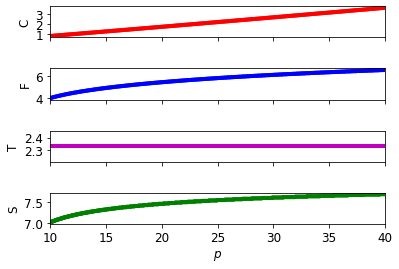

In [22]:
def run_continuation_analysis(
    ode_solver_wrapper,
    continuation_variable_name,
    parameter_span,
    parameter_num_of_points,
    fixed_parameters_dict,
    initial_conditions,
    output_variable_name_list,
    num_of_last_outcomes,
):
    if type(continuation_variable_name) != str:
        raise ValueError("Input continuation_variable_name must be of str type.")

    if type(parameter_num_of_points) != int:
        raise ValueError("Input parameter_num_of_points must be of integer type.")

    parameter_span_type = type(parameter_span)
    if parameter_span_type != tuple and parameter_span_type != list:
        raise ValueError("Input parameter_span must be a list or tuple of values.")
    else:
        if len(parameter_span) != 2:
            raise ValueError("Input parameter_span must be a list or tuple with two values.")

    if len(initial_conditions) != len(output_variable_name_list):
        raise ValueError(
            "The number of output variables from ODE model must be equal to number of initial conditions."
        )

    parameter_values = np.linspace(parameter_span[0], parameter_span[1], parameter_num_of_points)
    continuation_parameter_values_dict = {continuation_variable_name: parameter_values}
    time_values = time_list

    # Creating dictionary to record continuation realizations
    output_variables_dict = dict()
    for output_variable_name in output_variable_name_list:
        output_variables_dict[output_variable_name] = list()

    # Running continuation evaluations
    parameter_progress_bar = tqdm(parameter_values)
    for parameter_value in parameter_progress_bar:
        parameter_progress_bar.set_description("Running continuation")
        parameters = fixed_parameters
        parameters[continuation_variable_name] = parameter_value
        ode_solver_output = ode_solver_wrapper(initial_conditions,(t0, tf + days_to_forecast), time_values, **parameters)
        t_output, y_output = ode_solver_output.t, ode_solver_output.y
        y_last_outputs = y_output[:, -num_of_last_outcomes:]
        output_index = 0
        for output_variable_name in output_variable_name_list:
            output_variable_last_results = y_last_outputs[output_index]
            output_variables_dict[output_variable_name].append(
                [output_variable_last_results.min(), output_variable_last_results.max()]
            )
            output_index += 1

    return continuation_parameter_values_dict, output_variables_dict

fixed_parameters = {
    "lambda_T": lambda_T,
    "lambda_S": lambda_S,
    "alpha": alpha,
    "beta": beta,
#    "p": p,
    "d": d,
    "a_S": a_S,
    "h_S": h_S,
    "a_T": a_T,
    "h_T": h_T,
    "O": O,
    "r_F": r_F,
    "K_F": K_F,
    "m_T": m_T,
    "q_T": q_T,
    "m_S": m_S,
    "q_S": q_S
}


p_min = 10
p_max = 40
p_points = np.linspace(p_min, p_max, num_of_points)
parameter_to_continuation = {"p": p_points}

p_values, y_last_results = run_continuation_analysis(
    ode_solver_wrapper=ode_solver_exponential_density_mediated,
    continuation_variable_name="p",
    parameter_span=(p_min, p_max),
    parameter_num_of_points=num_of_points,
    fixed_parameters_dict=fixed_parameters,
    initial_conditions=y0,
    output_variable_name_list=["C", "F", "T", "S"],
    num_of_last_outcomes=1000,
)

colors_list = ["r", "b", "m", "g"]
results_progress_bar = tqdm(y_last_results)
num_of_state_variables = len(y_last_results)
fig, axs = plt.subplots(num_of_state_variables, sharex=True, gridspec_kw={"hspace": 1})
index = 0
for variable_name in results_progress_bar:
    results_progress_bar.set_description("Plotting results")
    variable_result = np.array(y_last_results[variable_name])
    variable_min_values = variable_result[:, 0].astype(np.int)
    variable_max_values = variable_result[:, 1].astype(np.int)

    color = colors_list[index]
#    axs[index].fill_between(
#        p_values["p"], variable_min_values, variable_max_values, color=color, alpha=1, linewidth=4
    axs[index].plot(
        p_values["p"], np.round(variable_result,2), color=color, alpha=1, linewidth=4
    )

    index += 1

for ax, variable_name in zip(axs.flat, y_last_results):
    ax.set(xlabel=r"$p$", ylabel=f"{variable_name}", xlim=(p_min, p_max))
    ax.plot(linewidth=10, markersize=12)
    ax.label_outer()

plt.rcParams.update({'font.size': 8})

plt.tight_layout()
plt.savefig("img/exponential_density_mediated_continuation_p.eps", format='eps', bbox_inches = "tight", dpi=300)

Plotting results: 100%|██████████| 4/4 [00:00<00:00, 31.04it/s]
<ipython-input-23-dd5d99b7b5b7>:121: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


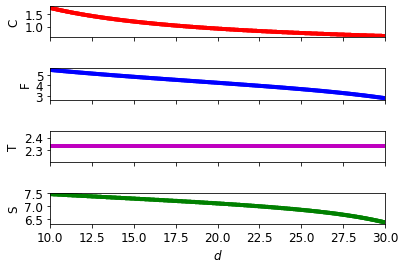

In [23]:
def run_continuation_analysis(
    ode_solver_wrapper,
    continuation_variable_name,
    parameter_span,
    parameter_num_of_points,
    fixed_parameters_dict,
    initial_conditions,
    output_variable_name_list,
    num_of_last_outcomes,
):
    if type(continuation_variable_name) != str:
        raise ValueError("Input continuation_variable_name must be of str type.")

    if type(parameter_num_of_points) != int:
        raise ValueError("Input parameter_num_of_points must be of integer type.")

    parameter_span_type = type(parameter_span)
    if parameter_span_type != tuple and parameter_span_type != list:
        raise ValueError("Input parameter_span must be a list or tuple of values.")
    else:
        if len(parameter_span) != 2:
            raise ValueError("Input parameter_span must be a list or tuple with two values.")

    if len(initial_conditions) != len(output_variable_name_list):
        raise ValueError(
            "The number of output variables from ODE model must be equal to number of initial conditions."
        )

    parameter_values = np.linspace(parameter_span[0], parameter_span[1], parameter_num_of_points)
    continuation_parameter_values_dict = {continuation_variable_name: parameter_values}
    time_values = time_list

    # Creating dictionary to record continuation realizations
    output_variables_dict = dict()
    for output_variable_name in output_variable_name_list:
        output_variables_dict[output_variable_name] = list()

    # Running continuation evaluations
    parameter_progress_bar = tqdm(parameter_values)
    for parameter_value in parameter_progress_bar:
        parameter_progress_bar.set_description("Running continuation")
        parameters = fixed_parameters
        parameters[continuation_variable_name] = parameter_value
        ode_solver_output = ode_solver_wrapper(initial_conditions,(t0, tf + days_to_forecast), time_values, **parameters)
        t_output, y_output = ode_solver_output.t, ode_solver_output.y
        y_last_outputs = y_output[:, -num_of_last_outcomes:]
        output_index = 0
        for output_variable_name in output_variable_name_list:
            output_variable_last_results = y_last_outputs[output_index]
            output_variables_dict[output_variable_name].append(
                [output_variable_last_results.min(), output_variable_last_results.max()]
            )
            output_index += 1

    return continuation_parameter_values_dict, output_variables_dict

fixed_parameters = {
    "lambda_T": lambda_T,
    "lambda_S": lambda_S,
    "alpha": alpha,
    "beta": beta,
    "p": p,
#    "d": d,
    "a_S": a_S,
    "h_S": h_S,
    "a_T": a_T,
    "h_T": h_T,
    "O": O,
    "r_F": r_F,
    "K_F": K_F,
    "m_T": m_T,
    "q_T": q_T,
    "m_S": m_S,
    "q_S": q_S
}


d_min = 10
d_max = 30
d_points = np.linspace(d_min, d_max, num_of_points)
parameter_to_continuation = {"d": d_points}

d_values, y_last_results = run_continuation_analysis(
    ode_solver_wrapper=ode_solver_exponential_density_mediated,
    continuation_variable_name="d",
    parameter_span=(d_min, d_max),
    parameter_num_of_points=num_of_points,
    fixed_parameters_dict=fixed_parameters,
    initial_conditions=y0,
    output_variable_name_list=["C", "F", "T", "S"],
    num_of_last_outcomes=1000,
)

colors_list = ["r", "b", "m", "g"]
results_progress_bar = tqdm(y_last_results)
num_of_state_variables = len(y_last_results)
fig, axs = plt.subplots(num_of_state_variables, sharex=True, gridspec_kw={"hspace": 1})
index = 0
for variable_name in results_progress_bar:
    results_progress_bar.set_description("Plotting results")
    variable_result = np.array(y_last_results[variable_name])
    variable_min_values = variable_result[:, 0].astype(np.int)
    variable_max_values = variable_result[:, 1].astype(np.int)

    color = colors_list[index]
#    axs[index].fill_between(
#        d_values["d"], variable_min_values, variable_max_values, color=color, alpha=1, linewidth=4
    axs[index].plot(
        d_values["d"], np.round(variable_result,2), color=color, alpha=1, linewidth=4
    )

    index += 1

for ax, variable_name in zip(axs.flat, y_last_results):
    ax.set(xlabel=r"$d$", ylabel=f"{variable_name}", xlim=(d_min, d_max))
    ax.plot(linewidth=10, markersize=12)
    ax.label_outer()

plt.rcParams.update({'font.size': 8})

plt.tight_layout()
#plt.savefig("img/exponential_density_mediated_continuation_d.eps", format='eps', bbox_inches = "tight", dpi=300)

# No density-mediated interaction

## Parameter values

In [24]:
p=20
d=10
a_S=1
h_S=1
a_T=1
h_T=1
O=0.5
r_F=2
K_F=10
m_T=0.1
q_T=0.1
m_S=0.1
q_S=0.1

y0 = np.array([10, 10, 5, 15])

In [25]:
def model_No_density_mediated(
    t,
    X,
    p=p,
    d=d,
    a_S=a_S,
    h_S=h_S,
    a_T=a_T,
    h_T=h_T,
    O=O,
    r_F=r_F,
    K_F=K_F,
    m_T=m_T,
    q_T=q_T,
    m_S=m_S,
    q_S=q_S,
):
    C, F, T, S = X
    aTS = a_T
    aST = a_S
    C_prime = p - d * C - a_S * C * S / ( 1 + a_S * h_S * C + a_S * h_S * F ) - a_T * C * T / ( 1 + a_T * h_T * C + a_T * h_T + O )
    F_prime = r_F * F * ( 1 - F / K_F ) - a_S * F * S / ( 1 + a_S * h_S * C + a_S * h_S * F )
    T_prime = ( aTS * C * T + a_T * O * T ) / ( 1 + aTS * h_T * C + a_T * h_T * O ) - m_T * T - q_T * T**2
    S_prime = ( aST * C * S + a_S * F * S ) / ( 1 + aST * h_S * C + a_S * h_S * F ) - m_S * S - q_S * S**2
    return C_prime, F_prime, T_prime, S_prime

def ode_solver_No_density_mediated(
    y0,
    t_span,
    t_eval,
    p=p,
    d=d,
    a_S=a_S,
    h_S=h_S,
    a_T=a_T,
    h_T=h_T,
    O=O,
    r_F=r_F,
    K_F=K_F,
    m_T=m_T,
    q_T=q_T,
    m_S=m_S,
    q_S=q_S,
):
    solution_ODE_No_density_mediated = solve_ivp(
        fun=model_No_density_mediated,
        t_span=t_span,
        y0=y0,
        t_eval=t_eval,
        args=(p,d,a_S,h_S,a_T,h_T,O,r_F,K_F,m_T,q_T,m_S,q_S),
        method=method,
    )
    return solution_ODE_No_density_mediated

t0 = time_list.min()
tf = time_list.max()
days_to_forecast = 0

In [26]:
solution_ODE_No_density_mediated = ode_solver_No_density_mediated(y0,(t0, tf + days_to_forecast),time_list, p=p, d=d, a_S=a_S, h_S=h_S, a_T=a_T, h_T=h_T, O=O, r_F=r_F, K_F=K_F, m_T=m_T, q_T=q_T, m_S=m_S, q_S=q_S)
t_computed_No_density_mediated, y_computed_No_density_mediated = solution_ODE_No_density_mediated.t, solution_ODE_No_density_mediated.y
Carrion, Fish, Other_Theropods, Spinosaurus = y_computed_No_density_mediated

No handles with labels found to put in legend.
No handles with labels found to put in legend.


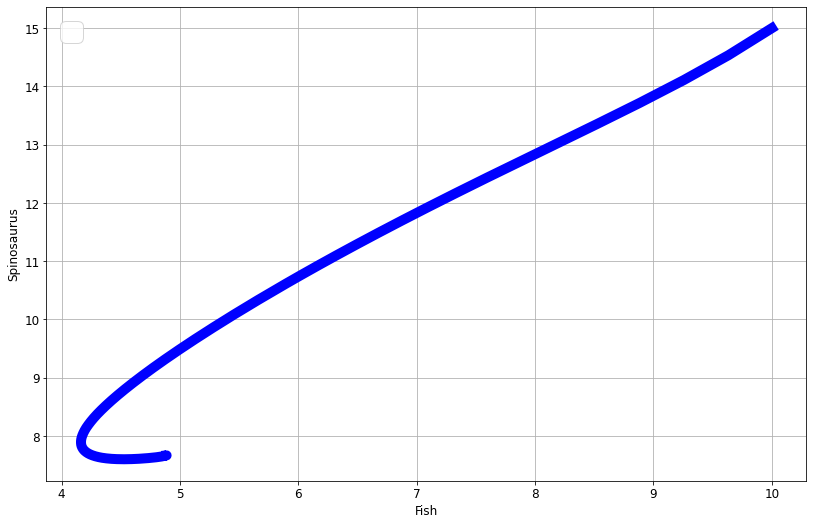

In [27]:
plt.rcParams['lines.linewidth'] = 30
plt.rcParams.update({'font.size': 28})

fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(Fish, Spinosaurus, linestyle="-", linewidth=10, markersize=12,color="b")

plt.xlabel("Fish")
plt.ylabel("Spinosaurus")
plt.legend(fancybox=True, shadow=True)
plt.grid()
plt.rcParams.update({'font.size': 30})
leg = ax.legend(prop={"size":28})

plt.tight_layout()
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


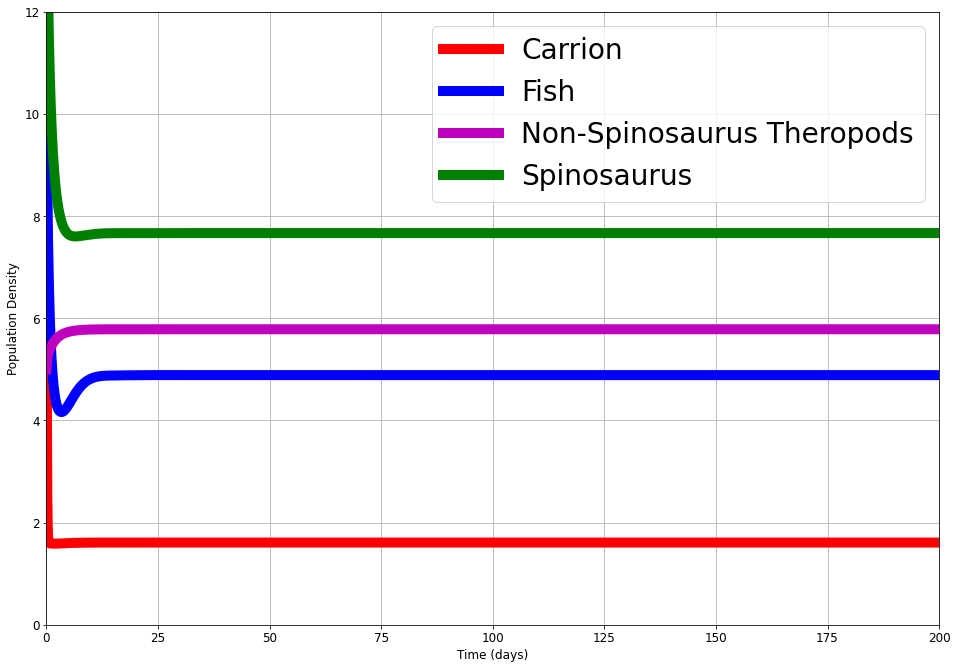

In [28]:
fig, ax = plt.subplots(figsize=(14, 10))

ax.plot(time_list, Carrion, label="Carrion", linestyle="-", linewidth=10, markersize=12,color="r")
ax.plot(time_list, Fish, label="Fish", linestyle="-", linewidth=10, markersize=12,color="b")
ax.plot(time_list, Other_Theropods, label="Non-Spinosaurus Theropods", linestyle="-", linewidth=10, markersize=12,color="m")
ax.plot(time_list, Spinosaurus, label="Spinosaurus", linestyle="-", linewidth=10, markersize=12,color="g")

plt.xlabel("Time (days)")
plt.ylabel("Population Density")
plt.legend(fancybox=True, shadow=True)
plt.xlim([0, time_list[-1]])
plt.ylim([0, 12])
plt.grid()
plt.rcParams.update({'font.size': 30})
leg = ax.legend(prop={"size":28})

plt.savefig('img/No_density_mediated_evolution.eps', format='eps')
plt.tight_layout()
plt.show()

## Sensitivity analysis

### Least-Squares objective function

In [29]:
from SALib.sample.morris import sample as ee_sample

mean_values_params = [
    p,
    d,
    a_S,
    h_S,
    a_T,
    h_T,
    O,
    r_F,
    K_F,
    m_T,
    q_T,
    m_S,
    q_S,
]
factors_names = [
    r"$p$",
    r"$d$",
    r"$a_S$",
    r"$h_S$",
    r"$a_T$",
    r"$h_T$",
    r"$O$",
    r"$r_F$",
    r"$K_F$",
    r"$m_T$",
    r"$q_T$",
    r"$m_S$",
    r"$q_S$",
]
params_perturbations = 0.5
problem_info = {
    'num_vars': len(mean_values_params),
    'names': factors_names,
    'bounds': [[param - params_perturbations * param, param + params_perturbations * param] for param in mean_values_params]
}

grid_level = 4
num_of_trajectories = 20
parameter_values = ee_sample(problem_info, grid_level, num_of_trajectories, local_optimization=False, seed=seed)

### Spinosaurus

In [30]:
from tqdm import tqdm

t0 = time_list.min()
tf = time_list.max()
days_to_forecast = 0
time_list_range = np.linspace(t0, tf + days_to_forecast, step)

num_of_realizations = parameter_values.shape[0]
num_of_time_list_points = time_list_range.shape[0]
qoi_sensitivity_outputs = np.zeros([num_of_realizations, num_of_time_list_points])

for realization_index, parameters_realization in tqdm(enumerate(parameter_values), total=len(parameter_values)):
    
    realization_ODE_No_density_mediated = ode_solver_No_density_mediated(
        y0,
        (t0, tf + days_to_forecast),
        time_list_range,
        *parameters_realization
    )
    
    Carrion_realization, Fish_realization, Other_Theropods_realization, Spinosaurus_realization = realization_ODE_No_density_mediated.y
    
    qoi_sensitivity_outputs[realization_index, :] = Spinosaurus_realization

100%|██████████| 56/56 [00:00<00:00, 70.58it/s]


In [31]:
from SALib.analyze.morris import analyze as ee_analyze
import pandas as pd

df_Si = pd.DataFrame(columns=['time_list', *problem_info['names']])
df_sigmai = pd.DataFrame(columns=['time_list', *problem_info['names']])
df_Si['time_list'] = time_list
df_sigmai['time_list'] = time_list
for time_list_point in tqdm(range(num_of_time_list_points)):
    try:
        Si = ee_analyze(
            problem_info, 
            parameter_values, 
            qoi_sensitivity_outputs[:, time_list_point], 
            num_levels=grid_level, 
            seed=seed
        )
        Si['mu_star_normalized'] = Si['mu_star'] / Si['mu_star'].sum()
        sigmai_normalized = Si['sigma'] / Si['sigma'].sum()
        for idx, param_name in enumerate(problem_info['names']):
            df_Si.loc[time_list_point, param_name] = Si['mu_star_normalized'][idx]
            df_sigmai.loc[time_list_point, param_name] = sigmai_normalized[idx]
    except:
        continue

df_Si.sort_values(by='time_list', inplace=True)
df_Si.drop(index=0, inplace=True)
df_Si.dropna(inplace=True)
df_Si.reset_index(drop=True, inplace=True)

df_sigmai.sort_values(by='time_list', inplace=True)
df_sigmai.drop(index=0, inplace=True)
df_sigmai.dropna(inplace=True)
df_sigmai.reset_index(drop=True, inplace=True)

valid_time_lists = df_Si.time_list.values
df_Si

100%|██████████| 4000/4000 [01:14<00:00, 53.48it/s]


,time_list,$p$,$d$,$a_S$,$h_S$,$a_T$,$h_T$,$O$,$r_F$,$K_F$,$m_T$,$q_T$,$m_S$,$q_S$
0,0.050013,0.000778714,0.00419901,0.0264836,0.375496,2.23617e-05,0.000158185,3.25014e-06,0.000180772,0.00137418,2.64516e-07,1.18686e-06,0.0370276,0.554275
1,0.100025,0.00153105,0.00689454,0.0290652,0.375733,3.56301e-05,0.000302544,5.42124e-06,0.000372614,0.00310643,1.01963e-06,4.24955e-06,0.0366481,0.546301
2,0.150038,0.00249754,0.00940238,0.0316263,0.375492,5.31096e-05,0.000475905,7.86471e-06,0.000574373,0.00518246,2.2689e-06,9.35927e-06,0.0363311,0.538345
3,0.200050,0.00360154,0.0114611,0.0341287,0.374943,7.54425e-05,0.000657244,1.00837e-05,0.000768087,0.00754071,3.85754e-06,1.72815e-05,0.0360857,0.530707
4,0.250063,0.00484014,0.0131161,0.0365454,0.374017,0.000100846,0.000847382,1.21874e-05,0.000947923,0.0101292,5.71129e-06,2.80342e-05,0.0359025,0.523507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,199.799950,0.146819,0.0959732,0.0875916,0.212262,0.00273764,0.0110028,9.13024e-05,0.0579433,0.0478206,0.000822038,0.00672503,0.0437867,0.286424
3995,199.849962,0.146819,0.0959732,0.0875916,0.212262,0.00273764,0.0110028,9.13024e-05,0.0579433,0.0478206,0.000822038,0.00672503,0.0437867,0.286424
3996,199.899975,0.146819,0.0959731,0.0875917,0.212262,0.00273764,0.0110028,9.13024e-05,0.0579433,0.0478206,0.000822038,0.00672502,0.0437867,0.286424
3997,199.949987,0.146819,0.0959731,0.0875917,0.212262,0.00273764,0.0110028,9.13024e-05,0.0579433,0.0478206,0.000822038,0.00672502,0.0437866,0.286424


In [32]:
df_sigmai

,time_list,$p$,$d$,$a_S$,$h_S$,$a_T$,$h_T$,$O$,$r_F$,$K_F$,$m_T$,$q_T$,$m_S$,$q_S$
0,0.050013,0.00194711,0.00942449,0.0733259,0.807295,2.88375e-05,0.000200094,9.16478e-06,0.000723247,0.00688544,8.80428e-07,3.19485e-06,0.00723943,0.0929169
1,0.100025,0.00268015,0.0188838,0.0703211,0.7348,4.72689e-05,0.00064821,1.43894e-05,0.0012718,0.0131173,3.35915e-06,1.19289e-05,0.011406,0.146795
2,0.150038,0.00396342,0.0255347,0.0693678,0.683089,9.97582e-05,0.00101998,1.54347e-05,0.00178271,0.0193707,6.74871e-06,2.74677e-05,0.0140436,0.181679
3,0.200050,0.00550323,0.0303847,0.0695465,0.643496,0.000158295,0.00142651,1.32477e-05,0.0022368,0.0258409,1.0676e-05,4.98887e-05,0.0158284,0.205504
4,0.250063,0.00736808,0.0343293,0.0703424,0.611339,0.000236588,0.00186481,9.70143e-06,0.00266182,0.0325671,1.49018e-05,7.97452e-05,0.0171091,0.222078
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,199.799950,0.120208,0.0821126,0.113254,0.208805,0.00525504,0.0100095,0.000130177,0.111015,0.0776063,0.000838855,0.00968904,0.0184072,0.24267
3995,199.849962,0.120208,0.0821126,0.113254,0.208805,0.00525504,0.0100095,0.000130177,0.111015,0.0776062,0.000838855,0.00968904,0.0184072,0.24267
3996,199.899975,0.120208,0.0821126,0.113254,0.208805,0.00525504,0.0100095,0.000130177,0.111015,0.0776062,0.000838855,0.00968903,0.0184072,0.24267
3997,199.949987,0.120208,0.0821126,0.113254,0.208805,0.00525504,0.0100095,0.000130177,0.111015,0.0776062,0.000838855,0.00968903,0.0184072,0.24267


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


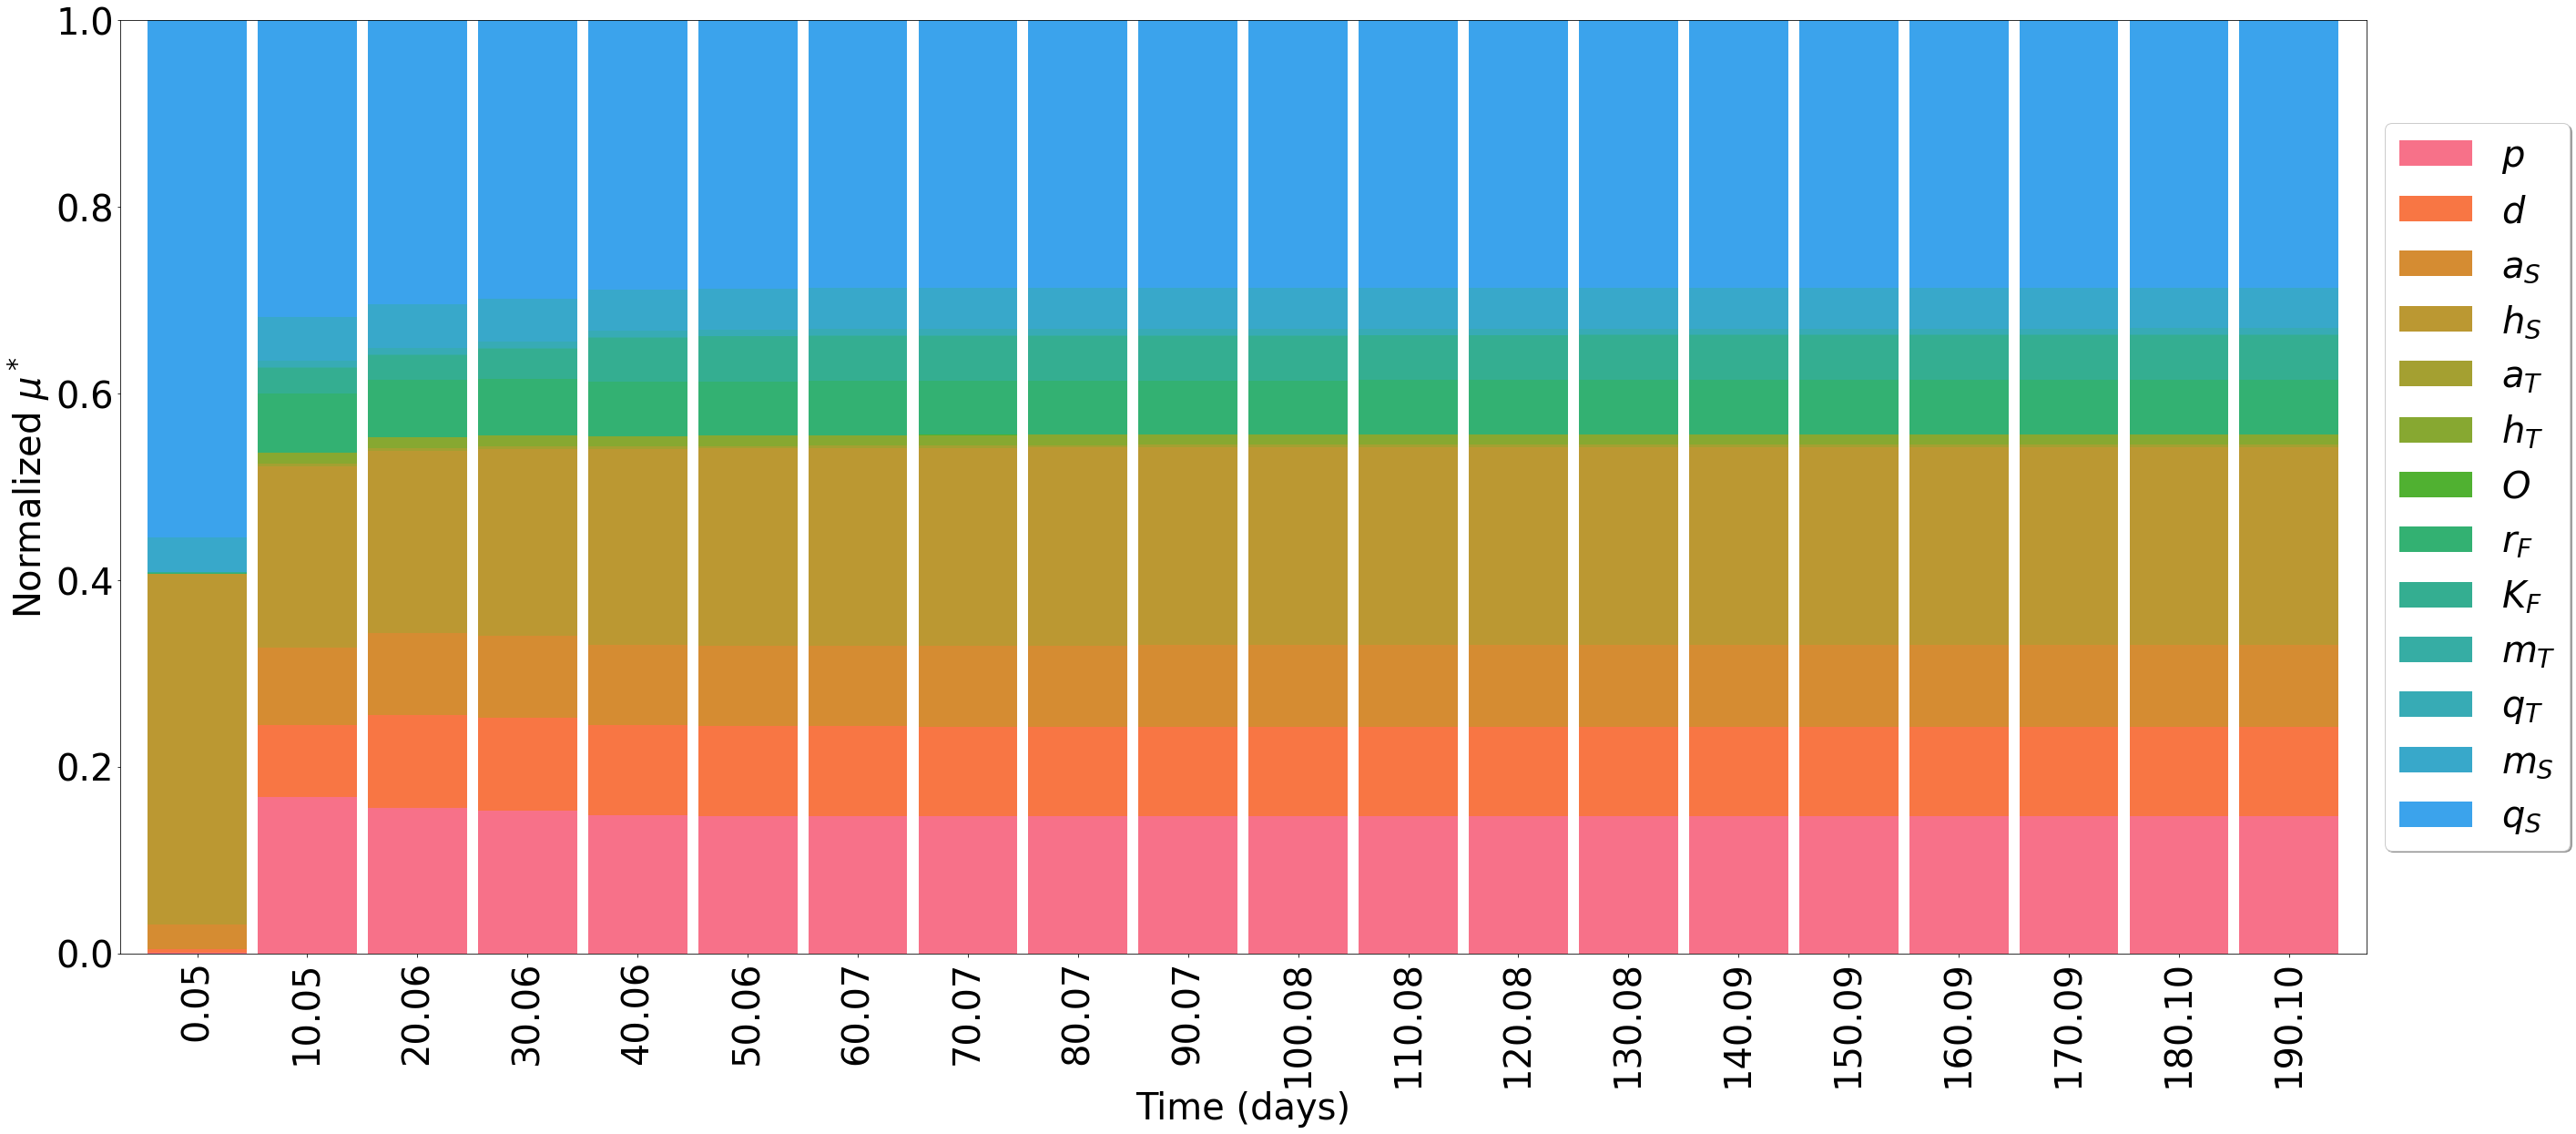

In [33]:
import seaborn as sns

fig = plt.figure()
ax = plt.subplot(111)
step_to_plot = 200
valid_time_lists_to_plot_mu = valid_time_lists[::step_to_plot]

colors = sns.color_palette("husl",18)
ax.set_prop_cycle('color', colors)

df_Si[::step_to_plot].plot.bar(x='time_list', rot=90, width=0.9, figsize=(40, 18), stacked=True, ax=ax, color=colors)
ax.xaxis.set_major_formatter(lambda x, pos: f"{valid_time_lists_to_plot_mu[x]:.2f}")
plt.xlabel("Time (days)", fontsize = 40)
plt.ylabel(r"Normalized $\mu^*$", fontsize = 40)

plt.xticks(fontsize=40)
plt.yticks(fontsize=40)

plt.ylim([0, 1])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1, fancybox=True, shadow=True, fontsize=40)

plt.tight_layout()
plt.savefig("img/No_density_mediated_SA_Spinosaurus_mu_star.eps", format='eps', bbox_inches = "tight", dpi=300)
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


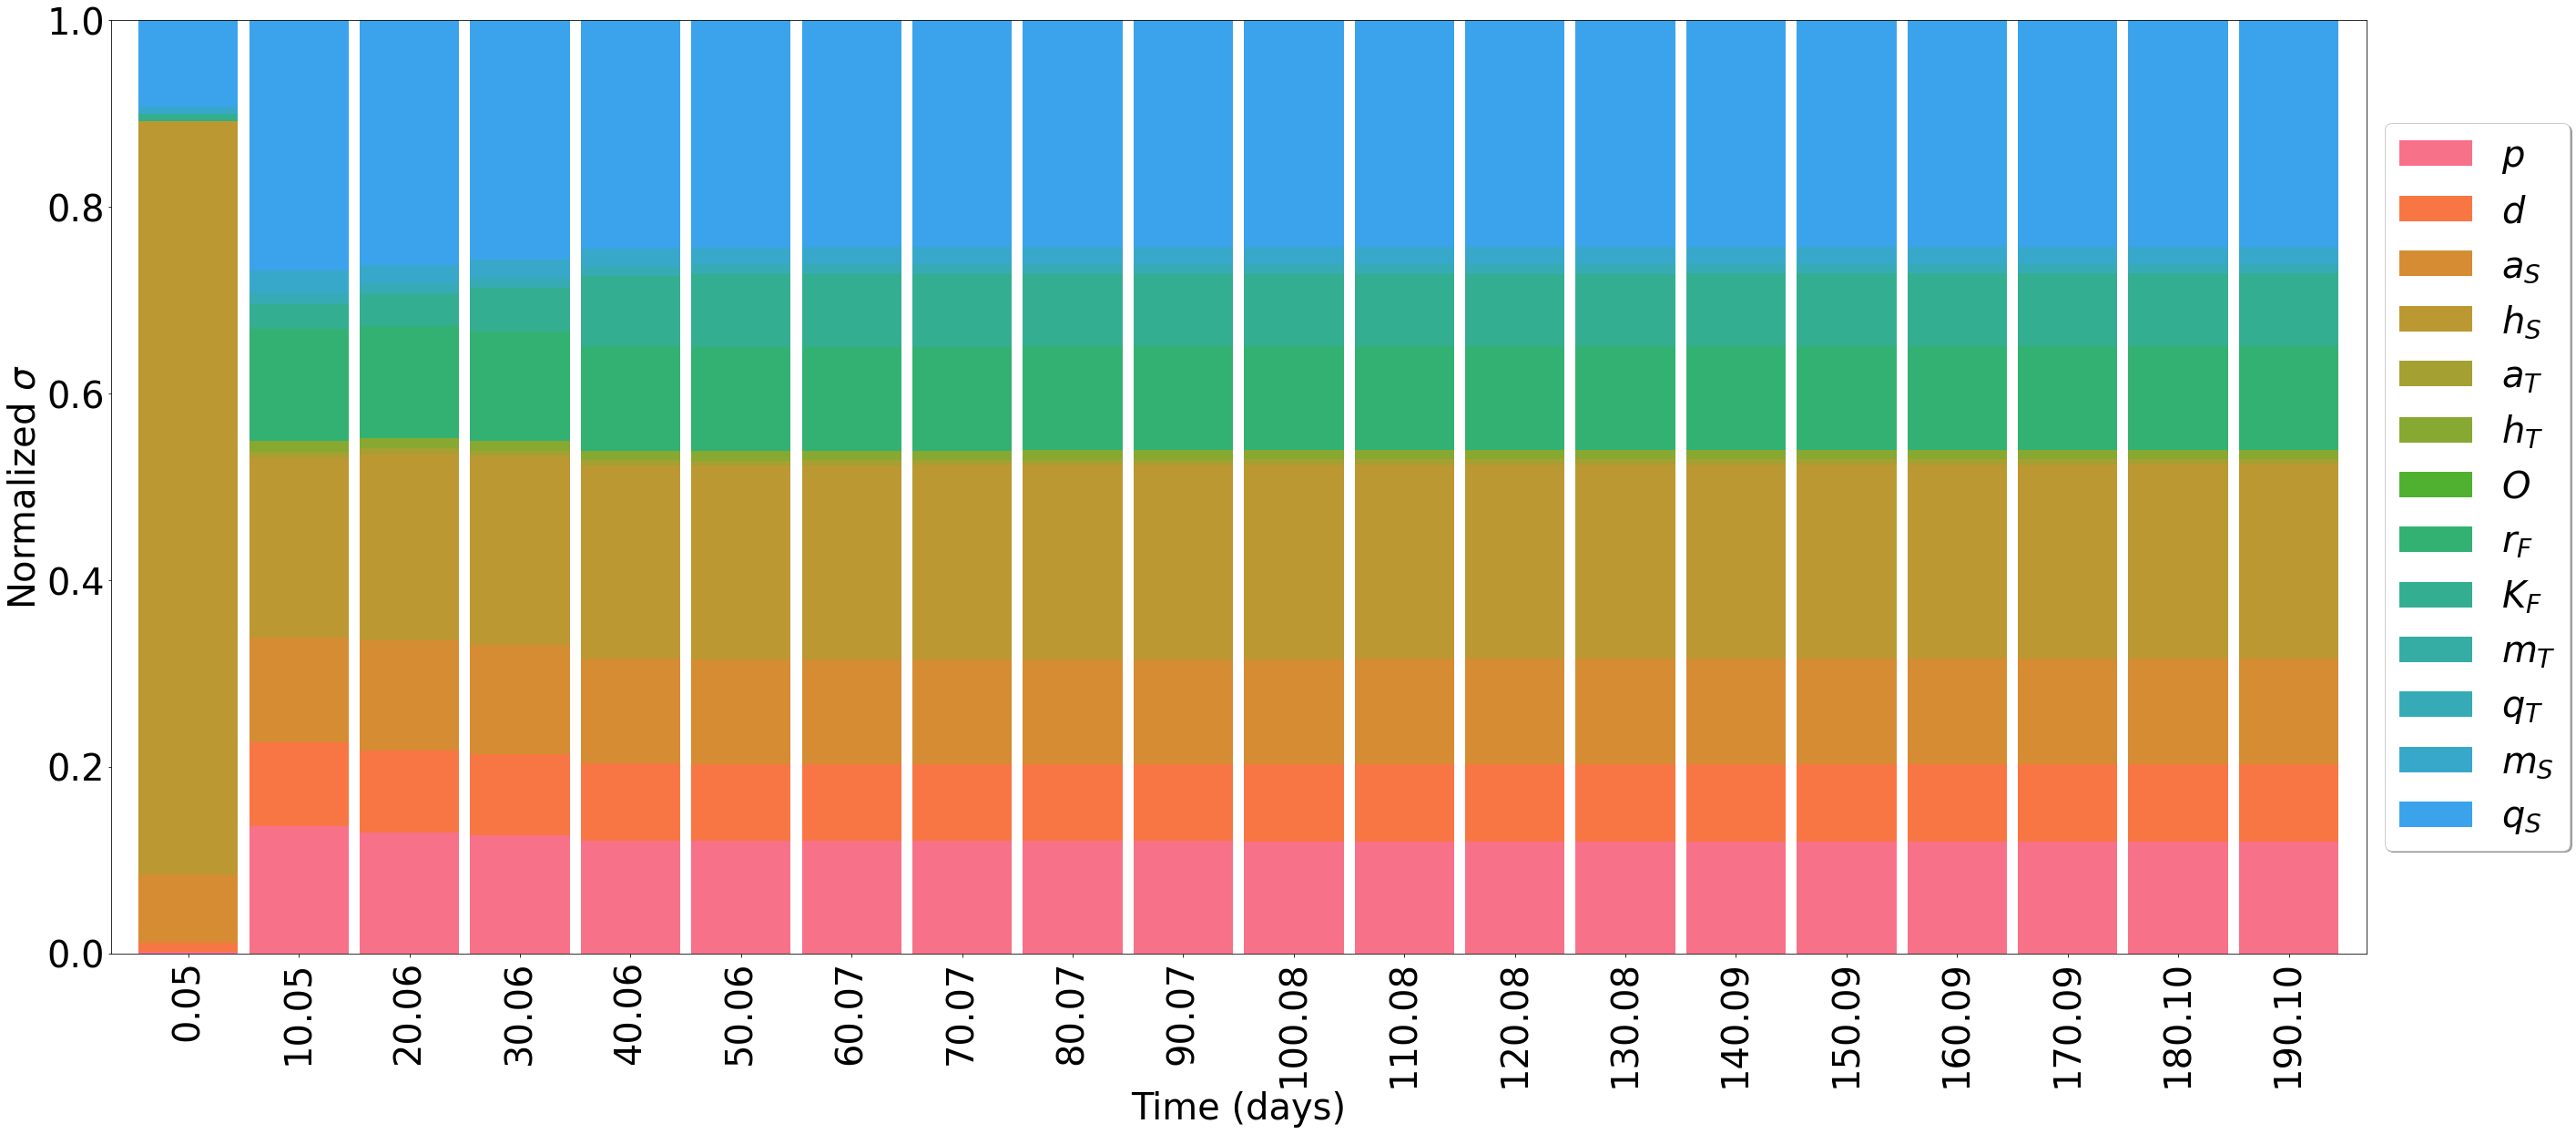

In [34]:
import seaborn as sns

fig = plt.figure()
ax = plt.subplot(111)
step_to_plot = 200
valid_time_lists_to_plot_sigma = valid_time_lists[::step_to_plot]

colors = sns.color_palette("husl",18)
ax.set_prop_cycle('color', colors)

df_sigmai[::step_to_plot].plot.bar(x='time_list', rot=90, width=0.9, figsize=(40, 18), stacked=True, ax=ax, color=colors)
ax.xaxis.set_major_formatter(lambda x, pos: f"{valid_time_lists_to_plot_sigma[x]:.2f}")
plt.xlabel("Time (days)", fontsize = 40)
plt.ylabel(r"Normalized $\sigma$", fontsize = 40)

plt.xticks(fontsize=40)
plt.yticks(fontsize=40)

plt.ylim([0, 1])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1, fancybox=True, shadow=True, fontsize=40)

plt.tight_layout()
plt.savefig("img/No_density_mediated_SA_Spinosaurus_sigma.eps", format='eps', bbox_inches = "tight", dpi=300)
plt.show()

### Non-Spinosaurus Theropods

In [35]:
from tqdm import tqdm

t0 = time_list.min()
tf = time_list.max()
days_to_forecast = 0
time_list_range = np.linspace(t0, tf + days_to_forecast, step)

#time_list_range = time_list

num_of_realizations = parameter_values.shape[0]
num_of_time_list_points = time_list_range.shape[0]
qoi_sensitivity_outputs = np.zeros([num_of_realizations, num_of_time_list_points])

for realization_index, parameters_realization in tqdm(enumerate(parameter_values), total=len(parameter_values)):
    
    realization_ODE_No_density_mediated = ode_solver_No_density_mediated(
        y0,
        (t0, tf + days_to_forecast),
        time_list_range,
        *parameters_realization
    )
    
    Carrion_realization, Fish_realization, Other_Theropods_realization, Spinosaurus_realization = realization_ODE_No_density_mediated.y
    
    qoi_sensitivity_outputs[realization_index, :] = Other_Theropods_realization

100%|██████████| 56/56 [00:00<00:00, 81.97it/s]


In [36]:
from SALib.analyze.morris import analyze as ee_analyze
import pandas as pd

df_Si = pd.DataFrame(columns=['time_list', *problem_info['names']])
df_sigmai = pd.DataFrame(columns=['time_list', *problem_info['names']])
df_Si['time_list'] = time_list
df_sigmai['time_list'] = time_list
for time_list_point in tqdm(range(num_of_time_list_points)):
    try:
        Si = ee_analyze(
            problem_info, 
            parameter_values, 
            qoi_sensitivity_outputs[:, time_list_point], 
            num_levels=grid_level, 
            seed=seed
        )
        Si['mu_star_normalized'] = Si['mu_star'] / Si['mu_star'].sum()
        sigmai_normalized = Si['sigma'] / Si['sigma'].sum()
        for idx, param_name in enumerate(problem_info['names']):
            df_Si.loc[time_list_point, param_name] = Si['mu_star_normalized'][idx]
            df_sigmai.loc[time_list_point, param_name] = sigmai_normalized[idx]
    except:
        continue

df_Si.sort_values(by='time_list', inplace=True)
df_Si.drop(index=0, inplace=True)
df_Si.dropna(inplace=True)
df_Si.reset_index(drop=True, inplace=True)

df_sigmai.sort_values(by='time_list', inplace=True)
df_sigmai.drop(index=0, inplace=True)
df_sigmai.dropna(inplace=True)
df_sigmai.reset_index(drop=True, inplace=True)

valid_time_lists = df_Si.time_list.values
df_Si

100%|██████████| 4000/4000 [01:10<00:00, 56.65it/s]


,time_list,$p$,$d$,$a_S$,$h_S$,$a_T$,$h_T$,$O$,$r_F$,$K_F$,$m_T$,$q_T$,$m_S$,$q_S$
0,0.050013,0.00226949,0.018472,0.00013261,0.00119798,0.0789852,0.501781,0.00508974,5.04923e-06,1.96923e-05,0.0650879,0.326921,1.61125e-06,3.68976e-05
1,0.100025,0.00562028,0.0386759,0.000334351,0.00268458,0.0885876,0.468796,0.00773722,2.08465e-05,8.3882e-05,0.0640411,0.323252,6.64386e-06,0.00015998
2,0.150038,0.0100499,0.0554575,0.000611579,0.0040593,0.0946279,0.438889,0.0106793,5.05362e-05,0.000207605,0.0633862,0.321576,1.6044e-05,0.000388838
3,0.200050,0.0153855,0.0665057,0.000974872,0.00519064,0.0982561,0.413747,0.0133904,9.21579e-05,0.000389735,0.0631846,0.322151,2.9961e-05,0.000701668
4,0.250063,0.0212285,0.0725745,0.00141454,0.00616354,0.10078,0.392929,0.0156507,0.000140833,0.000615226,0.0632747,0.324117,4.7372e-05,0.00106351
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,199.799950,0.0856341,0.0592606,0.0257674,0.0280906,0.106883,0.215833,0.0266254,0.00358397,0.00786948,0.0596622,0.362532,0.00261796,0.0156396
3995,199.849962,0.0856341,0.0592606,0.0257673,0.0280906,0.106883,0.215833,0.0266254,0.00358397,0.00786948,0.0596622,0.362532,0.00261796,0.0156396
3996,199.899975,0.0856341,0.0592606,0.0257673,0.0280906,0.106883,0.215833,0.0266254,0.00358397,0.00786948,0.0596622,0.362532,0.00261796,0.0156396
3997,199.949987,0.0856341,0.0592606,0.0257673,0.0280906,0.106883,0.215833,0.0266254,0.00358397,0.00786948,0.0596622,0.362532,0.00261796,0.0156396


In [37]:
df_sigmai

,time_list,$p$,$d$,$a_S$,$h_S$,$a_T$,$h_T$,$O$,$r_F$,$K_F$,$m_T$,$q_T$,$m_S$,$q_S$
0,0.050013,0.00618433,0.0846587,0.000605415,0.00441437,0.397629,0.471066,0.0265655,2.11262e-05,4.14668e-05,0.00287367,0.00585983,3.33943e-06,7.72029e-05
1,0.100025,0.014359,0.15305,0.00134894,0.00848258,0.398472,0.369538,0.0385048,7.70208e-05,0.000147718,0.00495781,0.0107024,1.38988e-05,0.000345664
2,0.150038,0.0246987,0.190649,0.00227749,0.0105785,0.385899,0.311608,0.0502366,0.000171671,0.000335191,0.00682985,0.0158899,3.11883e-05,0.0007954
3,0.200050,0.0365048,0.200618,0.00352537,0.0109739,0.371636,0.283594,0.0600193,0.000295992,0.000619489,0.00875775,0.0220301,5.21618e-05,0.00137296
4,0.250063,0.0485796,0.193534,0.00510485,0.0108776,0.359579,0.271595,0.0673059,0.000437426,0.000991747,0.0107826,0.02913,7.10687e-05,0.00201188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,199.799950,0.0975725,0.0576871,0.046896,0.0436661,0.133262,0.262551,0.0439079,0.00904491,0.0246364,0.0293051,0.231131,0.00267792,0.0176623
3995,199.849962,0.0975725,0.0576871,0.046896,0.0436661,0.133262,0.262551,0.0439079,0.00904491,0.0246364,0.0293051,0.231131,0.00267792,0.0176623
3996,199.899975,0.0975725,0.0576871,0.046896,0.0436661,0.133262,0.262551,0.0439079,0.00904491,0.0246364,0.0293051,0.231131,0.00267792,0.0176623
3997,199.949987,0.0975725,0.0576871,0.046896,0.0436661,0.133262,0.262551,0.0439079,0.00904491,0.0246364,0.0293051,0.231131,0.00267792,0.0176623


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


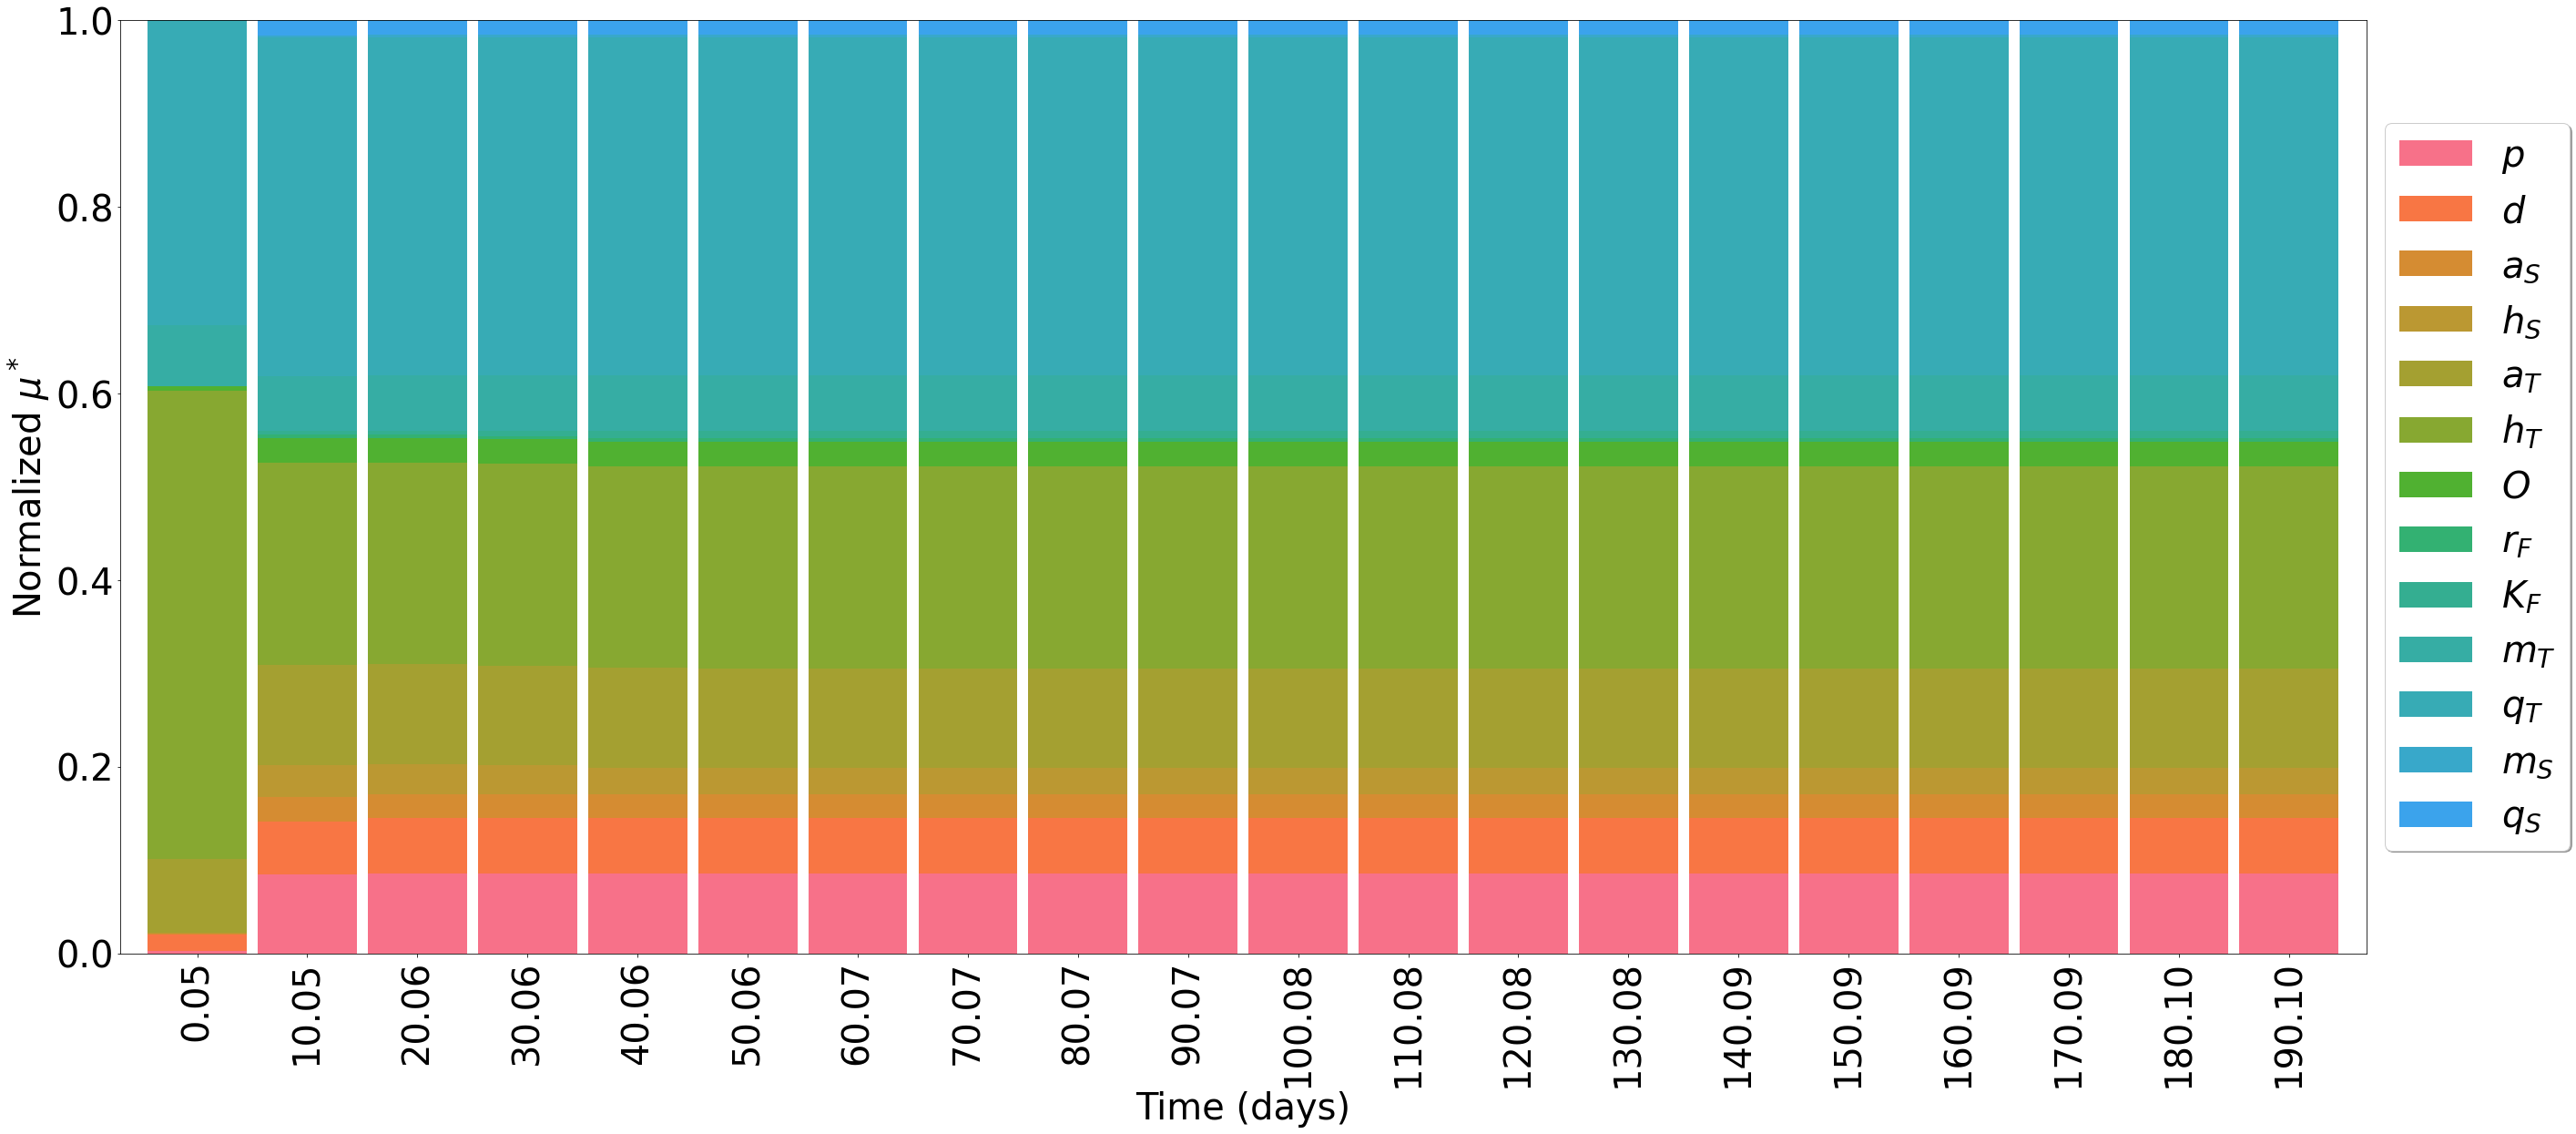

In [38]:
import seaborn as sns

fig = plt.figure()
ax = plt.subplot(111)
step_to_plot = 200
valid_time_lists_to_plot_mu = valid_time_lists[::step_to_plot]

colors = sns.color_palette("husl",18)
ax.set_prop_cycle('color', colors)

df_Si[::step_to_plot].plot.bar(x='time_list', rot=90, width=0.9, figsize=(40, 18), stacked=True, ax=ax, color=colors)
ax.xaxis.set_major_formatter(lambda x, pos: f"{valid_time_lists_to_plot_mu[x]:.2f}")
plt.xlabel("Time (days)", fontsize = 40)
plt.ylabel(r"Normalized $\mu^*$", fontsize = 40)

plt.xticks(fontsize=40)
plt.yticks(fontsize=40)

plt.ylim([0, 1])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1, fancybox=True, shadow=True, fontsize=40)

plt.tight_layout()
plt.savefig("img/No_density_mediated_SA_Other_Theropods_mu_star.eps", format='eps', bbox_inches = "tight", dpi=300)
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


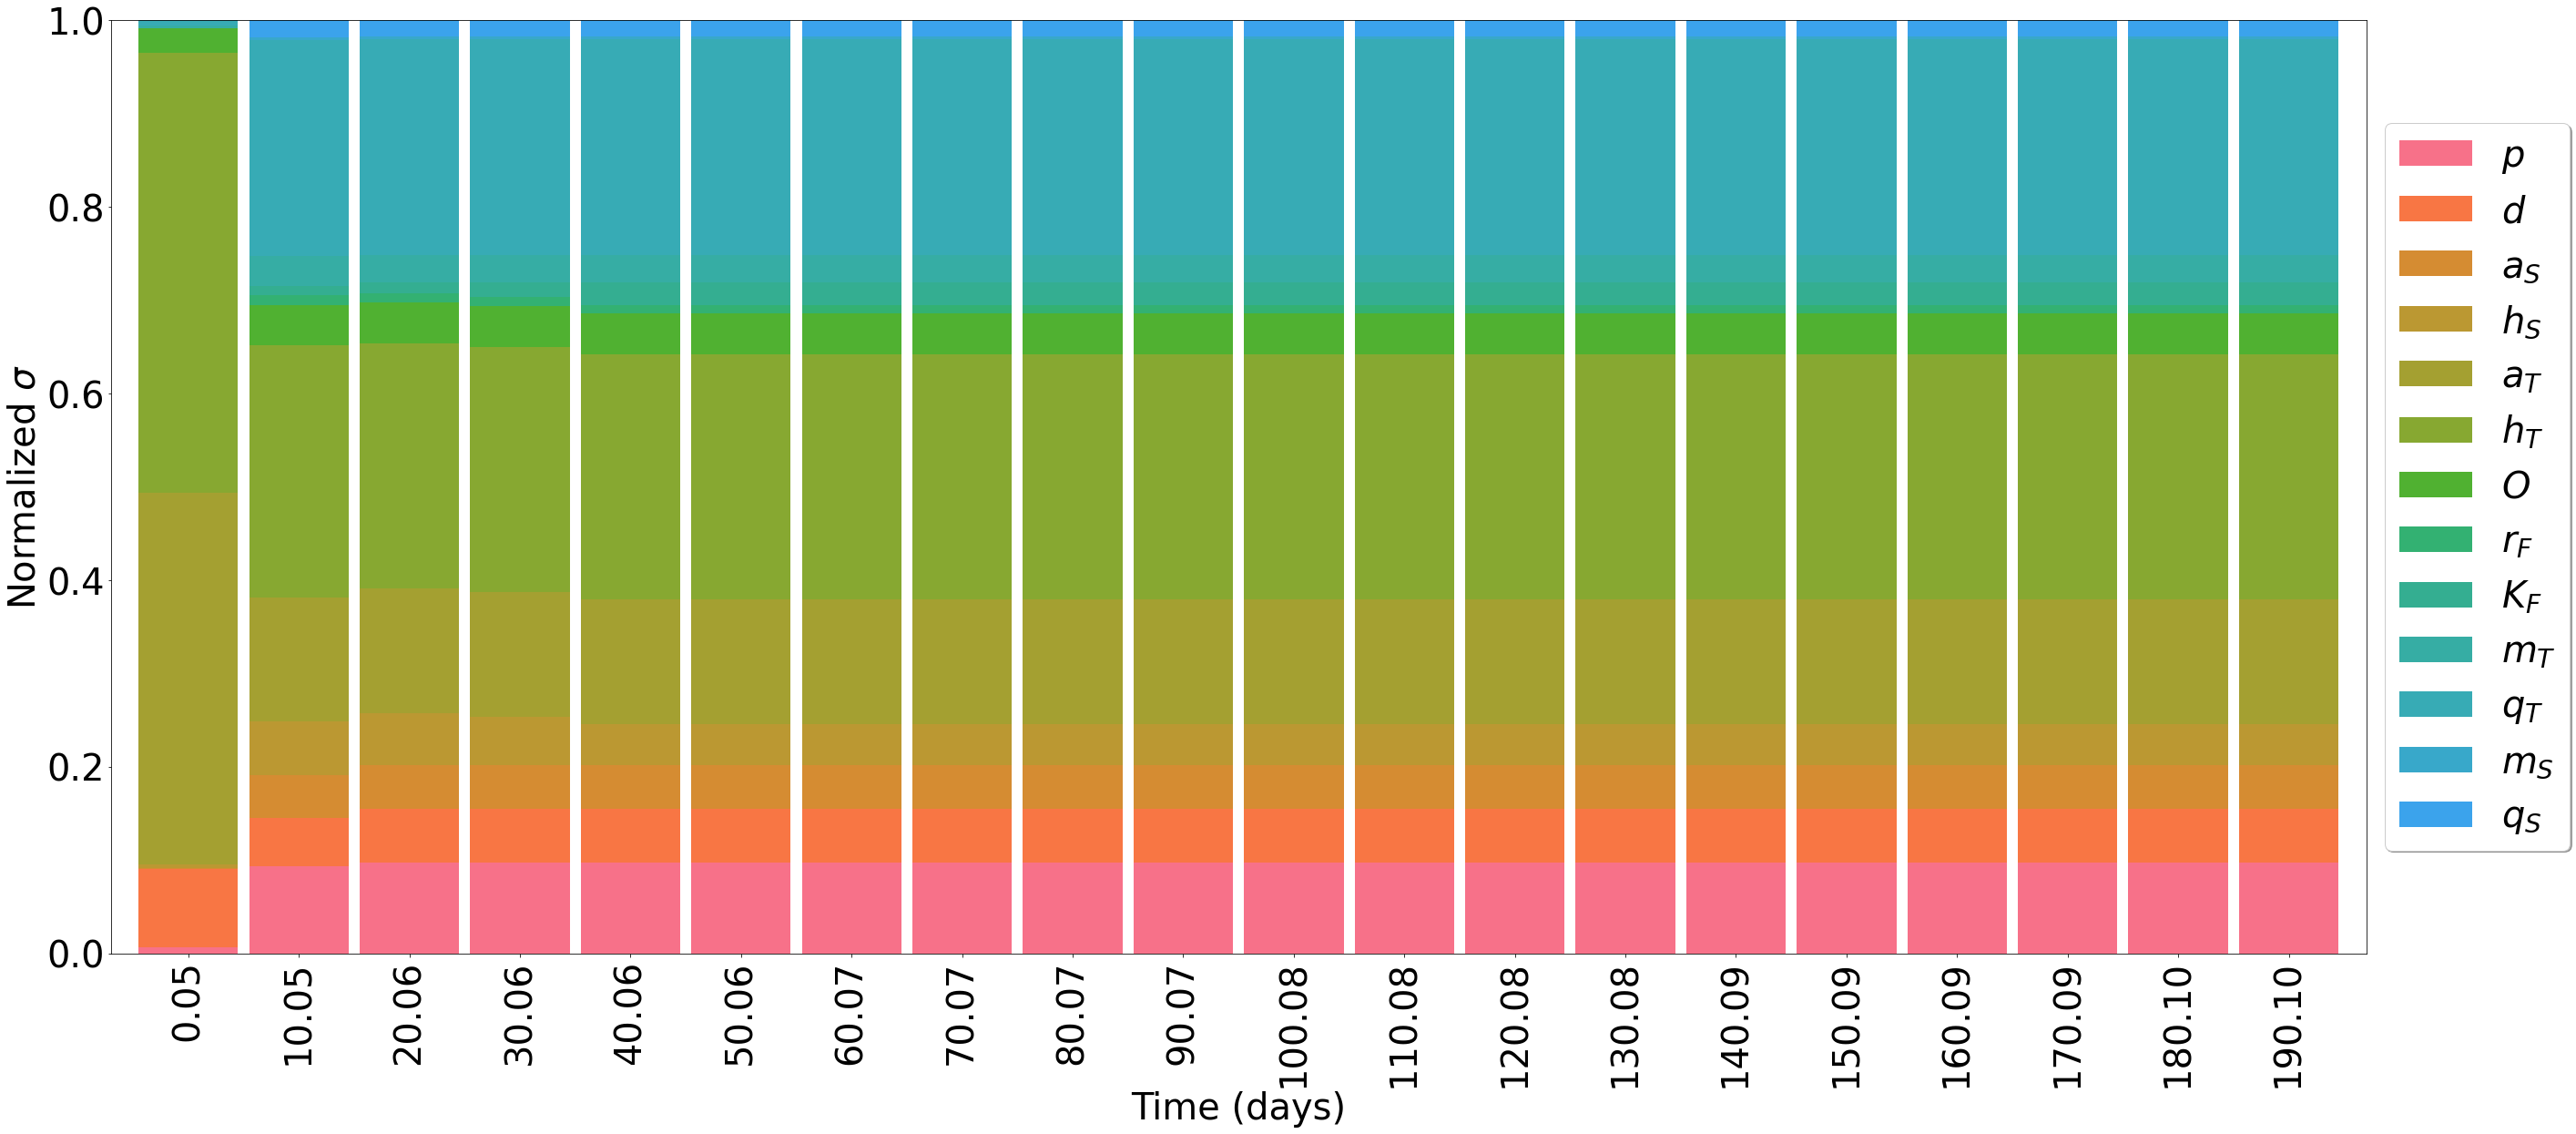

In [39]:
import seaborn as sns

fig = plt.figure()
ax = plt.subplot(111)
step_to_plot = 200
valid_time_lists_to_plot_sigma = valid_time_lists[::step_to_plot]

colors = sns.color_palette("husl",18)
ax.set_prop_cycle('color', colors)

df_sigmai[::step_to_plot].plot.bar(x='time_list', rot=90, width=0.9, figsize=(40, 18), stacked=True, ax=ax, color=colors)
ax.xaxis.set_major_formatter(lambda x, pos: f"{valid_time_lists_to_plot_sigma[x]:.2f}")
plt.xlabel("Time (days)", fontsize = 40)
plt.ylabel(r"Normalized $\sigma$", fontsize = 40)

plt.xticks(fontsize=40)
plt.yticks(fontsize=40)

plt.ylim([0, 1])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1, fancybox=True, shadow=True, fontsize=40)

plt.tight_layout()
plt.savefig("img/No_density_mediated_SA_Other_Theropods_sigma.eps", format='eps', bbox_inches = "tight", dpi=300)
plt.show()

## Continuation diagram

In [40]:
plt.rcParams.update({'font.size': 8})

SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rcParams['lines.linewidth'] = BIGGER_SIZE
plt.rcParams.update({'font.size': BIGGER_SIZE})

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

Plotting results: 100%|██████████| 4/4 [00:00<00:00, 17.69it/s]
<ipython-input-41-b770bcc185f4>:117: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


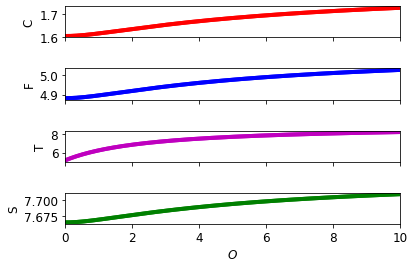

In [41]:
def run_continuation_analysis(
    ode_solver_wrapper,
    continuation_variable_name,
    parameter_span,
    parameter_num_of_points,
    fixed_parameters_dict,
    initial_conditions,
    output_variable_name_list,
    num_of_last_outcomes,
):
    if type(continuation_variable_name) != str:
        raise ValueError("Input continuation_variable_name must be of str type.")

    if type(parameter_num_of_points) != int:
        raise ValueError("Input parameter_num_of_points must be of integer type.")

    parameter_span_type = type(parameter_span)
    if parameter_span_type != tuple and parameter_span_type != list:
        raise ValueError("Input parameter_span must be a list or tuple of values.")
    else:
        if len(parameter_span) != 2:
            raise ValueError("Input parameter_span must be a list or tuple with two values.")

    if len(initial_conditions) != len(output_variable_name_list):
        raise ValueError(
            "The number of output variables from ODE model must be equal to number of initial conditions."
        )

    parameter_values = np.linspace(parameter_span[0], parameter_span[1], parameter_num_of_points)
    continuation_parameter_values_dict = {continuation_variable_name: parameter_values}
    time_values = time_list

    # Creating dictionary to record continuation realizations
    output_variables_dict = dict()
    for output_variable_name in output_variable_name_list:
        output_variables_dict[output_variable_name] = list()

    # Running continuation evaluations
    parameter_progress_bar = tqdm(parameter_values)
    for parameter_value in parameter_progress_bar:
        parameter_progress_bar.set_description("Running continuation")
        parameters = fixed_parameters
        parameters[continuation_variable_name] = parameter_value
        ode_solver_output = ode_solver_wrapper(initial_conditions, (t0, tf + days_to_forecast), time_values, **parameters)
        t_output, y_output = ode_solver_output.t, ode_solver_output.y
        y_last_outputs = y_output[:, -num_of_last_outcomes:]
        output_index = 0
        for output_variable_name in output_variable_name_list:
            output_variable_last_results = y_last_outputs[output_index]
            output_variables_dict[output_variable_name].append(
                [output_variable_last_results.min(), output_variable_last_results.max()]
            )
            output_index += 1

    return continuation_parameter_values_dict, output_variables_dict

fixed_parameters = {
    "p": p,
    "d": d,
    "a_S": a_S,
    "h_S": h_S,
    "a_T": a_T,
    "h_T": h_T,
#    "O": O,
    "r_F": r_F,
    "K_F": K_F,
    "m_T": m_T,
    "q_T": q_T,
    "m_S": m_S,
    "q_S": q_S
}


O_min = 0
O_max = 10
O_points = np.linspace(O_min, O_max, num_of_points)
parameter_to_continuation = {"O": O_points}

O_values, y_last_results = run_continuation_analysis(
    ode_solver_wrapper=ode_solver_No_density_mediated,
    continuation_variable_name="O",
    parameter_span=(O_min, O_max),
    parameter_num_of_points=num_of_points,
    fixed_parameters_dict=fixed_parameters,
    initial_conditions=y0,
    output_variable_name_list=["C", "F", "T", "S"],
    num_of_last_outcomes=1000,
)

colors_list = ["r", "b", "m", "g"]
results_progress_bar = tqdm(y_last_results)
num_of_state_variables = len(y_last_results)
fig, axs = plt.subplots(num_of_state_variables, sharex=True, gridspec_kw={"hspace": 1})
index = 0
for variable_name in results_progress_bar:
    results_progress_bar.set_description("Plotting results")
    variable_result = np.array(y_last_results[variable_name])
    variable_min_values = variable_result[:, 0].astype(np.int)
    variable_max_values = variable_result[:, 1].astype(np.int)

    color = colors_list[index]
#    axs[index].fill_between(
#        O_values["O"], variable_min_values, variable_max_values, color=color, alpha=1, linewidth=4
    axs[index].plot(
        O_values["O"], variable_result, color=color, alpha=1, linewidth=4
    )

    index += 1

for ax, variable_name in zip(axs.flat, y_last_results):
    ax.set(xlabel=r"$O$", ylabel=f"{variable_name}", xlim=(O_min, O_max))
    ax.plot(linewidth=10, markersize=12)
    ax.label_outer()

plt.rcParams.update({'font.size': 8})

plt.tight_layout()
plt.savefig("img/No_density_mediated_continuation_O.eps", format='eps', bbox_inches = "tight", dpi=300)

Plotting results: 100%|██████████| 4/4 [00:00<00:00, 18.90it/s]
<ipython-input-42-5dfcca28f96c>:117: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


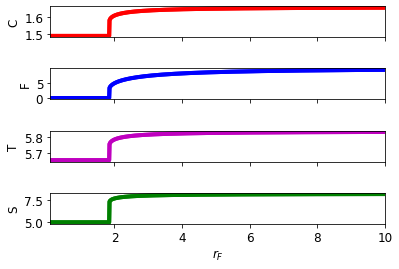

In [42]:
def run_continuation_analysis(
    ode_solver_wrapper,
    continuation_variable_name,
    parameter_span,
    parameter_num_of_points,
    fixed_parameters_dict,
    initial_conditions,
    output_variable_name_list,
    num_of_last_outcomes,
):
    if type(continuation_variable_name) != str:
        raise ValueError("Input continuation_variable_name must be of str type.")

    if type(parameter_num_of_points) != int:
        raise ValueError("Input parameter_num_of_points must be of integer type.")

    parameter_span_type = type(parameter_span)
    if parameter_span_type != tuple and parameter_span_type != list:
        raise ValueError("Input parameter_span must be a list or tuple of values.")
    else:
        if len(parameter_span) != 2:
            raise ValueError("Input parameter_span must be a list or tuple with two values.")

    if len(initial_conditions) != len(output_variable_name_list):
        raise ValueError(
            "The number of output variables from ODE model must be equal to number of initial conditions."
        )

    parameter_values = np.linspace(parameter_span[0], parameter_span[1], parameter_num_of_points)
    continuation_parameter_values_dict = {continuation_variable_name: parameter_values}
    time_values = time_list

    # Creating dictionary to record continuation realizations
    output_variables_dict = dict()
    for output_variable_name in output_variable_name_list:
        output_variables_dict[output_variable_name] = list()

    # Running continuation evaluations
    parameter_progress_bar = tqdm(parameter_values)
    for parameter_value in parameter_progress_bar:
        parameter_progress_bar.set_description("Running continuation")
        parameters = fixed_parameters
        parameters[continuation_variable_name] = parameter_value
        ode_solver_output = ode_solver_wrapper(initial_conditions,(t0, tf + days_to_forecast), time_values, **parameters)
        t_output, y_output = ode_solver_output.t, ode_solver_output.y
        y_last_outputs = y_output[:, -num_of_last_outcomes:]
        output_index = 0
        for output_variable_name in output_variable_name_list:
            output_variable_last_results = y_last_outputs[output_index]
            output_variables_dict[output_variable_name].append(
                [output_variable_last_results.min(), output_variable_last_results.max()]
            )
            output_index += 1

    return continuation_parameter_values_dict, output_variables_dict

fixed_parameters = {
    "p": p,
    "d": d,
    "a_S": a_S,
    "h_S": h_S,
    "a_T": a_T,
    "h_T": h_T,
    "O": O,
#    "r_F": r_F,
    "K_F": K_F,
    "m_T": m_T,
    "q_T": q_T,
    "m_S": m_S,
    "q_S": q_S
}


r_F_min = 0.1
r_F_max = 10
r_F_points = np.linspace(r_F_min, r_F_max, num_of_points)
parameter_to_continuation = {"r_F": r_F_points}

r_F_values, y_last_results = run_continuation_analysis(
    ode_solver_wrapper=ode_solver_No_density_mediated,
    continuation_variable_name="r_F",
    parameter_span=(r_F_min, r_F_max),
    parameter_num_of_points=num_of_points,
    fixed_parameters_dict=fixed_parameters,
    initial_conditions=y0,
    output_variable_name_list=["C", "F", "T", "S"],
    num_of_last_outcomes=1000,
)

colors_list = ["r", "b", "m", "g"]
results_progress_bar = tqdm(y_last_results)
num_of_state_variables = len(y_last_results)
fig, axs = plt.subplots(num_of_state_variables, sharex=True, gridspec_kw={"hspace": 1})
index = 0
for variable_name in results_progress_bar:
    results_progress_bar.set_description("Plotting results")
    variable_result = np.array(y_last_results[variable_name])
    variable_min_values = variable_result[:, 0].astype(np.int)
    variable_max_values = variable_result[:, 1].astype(np.int)

    color = colors_list[index]
#    axs[index].fill_between(
#        r_F_values["r_F"], variable_min_values, variable_max_values, color=color, alpha=1, linewidth=4
    axs[index].plot(
        r_F_values["r_F"], variable_result, color=color, alpha=1, linewidth=4
    )

    index += 1

for ax, variable_name in zip(axs.flat, y_last_results):
    ax.set(xlabel=r"$r_F$", ylabel=f"{variable_name}", xlim=(r_F_min, r_F_max))
    ax.plot(linewidth=10, markersize=12)
    ax.label_outer()

plt.rcParams.update({'font.size': 8})

plt.tight_layout()
plt.savefig("img/No_density_mediated_continuation_r_F.eps", format='eps', bbox_inches = "tight", dpi=300)

Plotting results: 100%|██████████| 4/4 [00:00<00:00, 31.15it/s]
<ipython-input-43-9d8ef1265453>:117: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


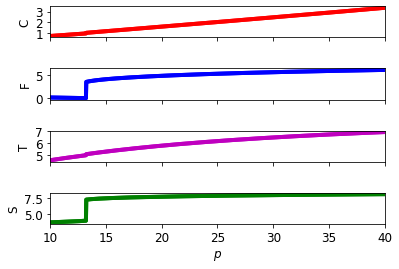

In [43]:
def run_continuation_analysis(
    ode_solver_wrapper,
    continuation_variable_name,
    parameter_span,
    parameter_num_of_points,
    fixed_parameters_dict,
    initial_conditions,
    output_variable_name_list,
    num_of_last_outcomes,
):
    if type(continuation_variable_name) != str:
        raise ValueError("Input continuation_variable_name must be of str type.")

    if type(parameter_num_of_points) != int:
        raise ValueError("Input parameter_num_of_points must be of integer type.")

    parameter_span_type = type(parameter_span)
    if parameter_span_type != tuple and parameter_span_type != list:
        raise ValueError("Input parameter_span must be a list or tuple of values.")
    else:
        if len(parameter_span) != 2:
            raise ValueError("Input parameter_span must be a list or tuple with two values.")

    if len(initial_conditions) != len(output_variable_name_list):
        raise ValueError(
            "The number of output variables from ODE model must be equal to number of initial conditions."
        )

    parameter_values = np.linspace(parameter_span[0], parameter_span[1], parameter_num_of_points)
    continuation_parameter_values_dict = {continuation_variable_name: parameter_values}
    time_values = time_list

    # Creating dictionary to record continuation realizations
    output_variables_dict = dict()
    for output_variable_name in output_variable_name_list:
        output_variables_dict[output_variable_name] = list()

    # Running continuation evaluations
    parameter_progress_bar = tqdm(parameter_values)
    for parameter_value in parameter_progress_bar:
        parameter_progress_bar.set_description("Running continuation")
        parameters = fixed_parameters
        parameters[continuation_variable_name] = parameter_value
        ode_solver_output = ode_solver_wrapper(initial_conditions,(t0, tf + days_to_forecast), time_values, **parameters)
        t_output, y_output = ode_solver_output.t, ode_solver_output.y
        y_last_outputs = y_output[:, -num_of_last_outcomes:]
        output_index = 0
        for output_variable_name in output_variable_name_list:
            output_variable_last_results = y_last_outputs[output_index]
            output_variables_dict[output_variable_name].append(
                [output_variable_last_results.min(), output_variable_last_results.max()]
            )
            output_index += 1

    return continuation_parameter_values_dict, output_variables_dict

fixed_parameters = {
#    "p": p,
    "d": d,
    "a_S": a_S,
    "h_S": h_S,
    "a_T": a_T,
    "h_T": h_T,
    "O": O,
    "r_F": r_F,
    "K_F": K_F,
    "m_T": m_T,
    "q_T": q_T,
    "m_S": m_S,
    "q_S": q_S
}


p_min = 10
p_max = 40
p_points = np.linspace(p_min, p_max, num_of_points)
parameter_to_continuation = {"p": p_points}

p_values, y_last_results = run_continuation_analysis(
    ode_solver_wrapper=ode_solver_No_density_mediated,
    continuation_variable_name="p",
    parameter_span=(p_min, p_max),
    parameter_num_of_points=num_of_points,
    fixed_parameters_dict=fixed_parameters,
    initial_conditions=y0,
    output_variable_name_list=["C", "F", "T", "S"],
    num_of_last_outcomes=1000,
)

colors_list = ["r", "b", "m", "g"]
results_progress_bar = tqdm(y_last_results)
num_of_state_variables = len(y_last_results)
fig, axs = plt.subplots(num_of_state_variables, sharex=True, gridspec_kw={"hspace": 1})
index = 0
for variable_name in results_progress_bar:
    results_progress_bar.set_description("Plotting results")
    variable_result = np.array(y_last_results[variable_name])
    variable_min_values = variable_result[:, 0].astype(np.int)
    variable_max_values = variable_result[:, 1].astype(np.int)

    color = colors_list[index]
#    axs[index].fill_between(
#        p_values["p"], variable_min_values, variable_max_values, color=color, alpha=1, linewidth=4
    axs[index].plot(
        p_values["p"], variable_result, color=color, alpha=1, linewidth=4
    )

    index += 1

for ax, variable_name in zip(axs.flat, y_last_results):
    ax.set(xlabel=r"$p$", ylabel=f"{variable_name}", xlim=(p_min, p_max))
    ax.plot(linewidth=10, markersize=12)
    ax.label_outer()

plt.rcParams.update({'font.size': 8})

plt.tight_layout()
plt.savefig("img/No_density_mediated_continuation_p.eps", format='eps', bbox_inches = "tight", dpi=300)

Plotting results: 100%|██████████| 4/4 [00:00<00:00, 33.96it/s]
<ipython-input-44-86c74f7b4115>:117: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


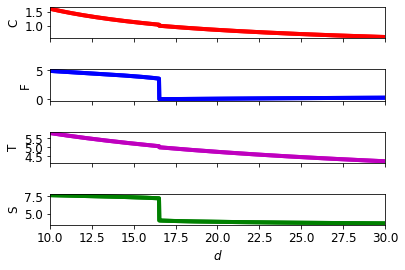

In [44]:
def run_continuation_analysis(
    ode_solver_wrapper,
    continuation_variable_name,
    parameter_span,
    parameter_num_of_points,
    fixed_parameters_dict,
    initial_conditions,
    output_variable_name_list,
    num_of_last_outcomes,
):
    if type(continuation_variable_name) != str:
        raise ValueError("Input continuation_variable_name must be of str type.")

    if type(parameter_num_of_points) != int:
        raise ValueError("Input parameter_num_of_points must be of integer type.")

    parameter_span_type = type(parameter_span)
    if parameter_span_type != tuple and parameter_span_type != list:
        raise ValueError("Input parameter_span must be a list or tuple of values.")
    else:
        if len(parameter_span) != 2:
            raise ValueError("Input parameter_span must be a list or tuple with two values.")

    if len(initial_conditions) != len(output_variable_name_list):
        raise ValueError(
            "The number of output variables from ODE model must be equal to number of initial conditions."
        )

    parameter_values = np.linspace(parameter_span[0], parameter_span[1], parameter_num_of_points)
    continuation_parameter_values_dict = {continuation_variable_name: parameter_values}
    time_values = time_list

    # Creating dictionary to record continuation realizations
    output_variables_dict = dict()
    for output_variable_name in output_variable_name_list:
        output_variables_dict[output_variable_name] = list()

    # Running continuation evaluations
    parameter_progress_bar = tqdm(parameter_values)
    for parameter_value in parameter_progress_bar:
        parameter_progress_bar.set_description("Running continuation")
        parameters = fixed_parameters
        parameters[continuation_variable_name] = parameter_value
        ode_solver_output = ode_solver_wrapper(initial_conditions,(t0, tf + days_to_forecast), time_values, **parameters)
        t_output, y_output = ode_solver_output.t, ode_solver_output.y
        y_last_outputs = y_output[:, -num_of_last_outcomes:]
        output_index = 0
        for output_variable_name in output_variable_name_list:
            output_variable_last_results = y_last_outputs[output_index]
            output_variables_dict[output_variable_name].append(
                [output_variable_last_results.min(), output_variable_last_results.max()]
            )
            output_index += 1

    return continuation_parameter_values_dict, output_variables_dict

fixed_parameters = {
    "p": p,
#    "d": d,
    "a_S": a_S,
    "h_S": h_S,
    "a_T": a_T,
    "h_T": h_T,
    "O": O,
    "r_F": r_F,
    "K_F": K_F,
    "m_T": m_T,
    "q_T": q_T,
    "m_S": m_S,
    "q_S": q_S
}


d_min = 10
d_max = 30
d_points = np.linspace(d_min, d_max, num_of_points)
parameter_to_continuation = {"d": d_points}

d_values, y_last_results = run_continuation_analysis(
    ode_solver_wrapper=ode_solver_No_density_mediated,
    continuation_variable_name="d",
    parameter_span=(d_min, d_max),
    parameter_num_of_points=num_of_points,
    fixed_parameters_dict=fixed_parameters,
    initial_conditions=y0,
    output_variable_name_list=["C", "F", "T", "S"],
    num_of_last_outcomes=1000,
)

colors_list = ["r", "b", "m", "g"]
results_progress_bar = tqdm(y_last_results)
num_of_state_variables = len(y_last_results)
fig, axs = plt.subplots(num_of_state_variables, sharex=True, gridspec_kw={"hspace": 1})
index = 0
for variable_name in results_progress_bar:
    results_progress_bar.set_description("Plotting results")
    variable_result = np.array(y_last_results[variable_name])
    variable_min_values = variable_result[:, 0].astype(np.int)
    variable_max_values = variable_result[:, 1].astype(np.int)

    color = colors_list[index]
#    axs[index].fill_between(
#        d_values["d"], variable_min_values, variable_max_values, color=color, alpha=1, linewidth=4
    axs[index].plot(
        d_values["d"], variable_result, color=color, alpha=1, linewidth=4
    )

    index += 1

for ax, variable_name in zip(axs.flat, y_last_results):
    ax.set(xlabel=r"$d$", ylabel=f"{variable_name}", xlim=(d_min, d_max))
    ax.plot(linewidth=10, markersize=12)
    ax.label_outer()

plt.rcParams.update({'font.size': 8})

plt.tight_layout()
#plt.savefig("img/No_density_mediated_continuation_d.eps", format='eps', bbox_inches = "tight", dpi=300)

# Complementary analyses

# No density-mediated interaction

## Parameter values

In [45]:
p=20
d=10
a_S=1
h_S=1
a_T=1
h_T=1
O=0.5
r_F=2
K_F=10
m_T=0.1
q_T=0.1
m_S=0.1
q_S=0.1

y0 = np.array([10, 10, 5, 15])

In [46]:
def model_No_density_mediated(
    t,
    X,
    p=p,
    d=d,
    a_S=a_S,
    h_S=h_S,
    a_T=a_T,
    h_T=h_T,
    O=O,
    r_F=r_F,
    K_F=K_F,
    m_T=m_T,
    q_T=q_T,
    m_S=m_S,
    q_S=q_S,
):
    C, F, T, S = X
    aTS = a_T
    aST = a_S
    C_prime = p - d * C - a_S * C * S / ( 1 + a_S * h_S * C + a_S * h_S * F ) - a_T * C * T / ( 1 + a_T * h_T * C + a_T * h_T + O )
    F_prime = r_F * F * ( 1 - F / K_F ) - a_S * F * S / ( 1 + a_S * h_S * C + a_S * h_S * F )
    T_prime = ( aTS * C * T + a_T * O * T ) / ( 1 + aTS * h_T * C + a_T * h_T * O ) - m_T * T - q_T * T**2
    S_prime = ( aST * C * S + a_S * F * S ) / ( 1 + aST * h_S * C + a_S * h_S * F ) - m_S * S - q_S * S**2
    return C_prime, F_prime, T_prime, S_prime

def ode_solver_No_density_mediated(
    y0,
    t_span,
    t_eval,
    p=p,
    d=d,
    a_S=a_S,
    h_S=h_S,
    a_T=a_T,
    h_T=h_T,
    O=O,
    r_F=r_F,
    K_F=K_F,
    m_T=m_T,
    q_T=q_T,
    m_S=m_S,
    q_S=q_S,
):
    solution_ODE_No_density_mediated = solve_ivp(
        fun=model_No_density_mediated,
        t_span=t_span,
        y0=y0,
        t_eval=t_eval,
        args=(p,d,a_S,h_S,a_T,h_T,O,r_F,K_F,m_T,q_T,m_S,q_S),
        method=method,
    )
    return solution_ODE_No_density_mediated

t0 = time_list.min()
tf = time_list.max()
days_to_forecast = 0

In [47]:
solution_ODE_No_density_mediated = ode_solver_No_density_mediated(y0,(t0, tf + days_to_forecast),time_list, p=p, d=d, a_S=a_S, h_S=h_S, a_T=a_T, h_T=h_T, O=O, r_F=r_F, K_F=K_F, m_T=m_T, q_T=q_T, m_S=m_S, q_S=q_S)
t_computed_No_density_mediated, y_computed_No_density_mediated = solution_ODE_No_density_mediated.t, solution_ODE_No_density_mediated.y
Carrion, Fish, Other_Theropods, Spinosaurus = y_computed_No_density_mediated

No handles with labels found to put in legend.
No handles with labels found to put in legend.


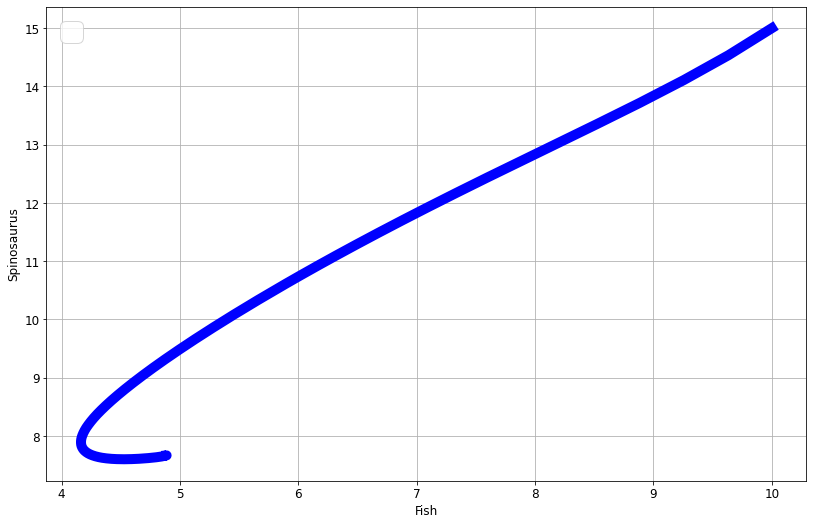

In [48]:
plt.rcParams['lines.linewidth'] = 30
plt.rcParams.update({'font.size': 28})

fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(Fish, Spinosaurus, linestyle="-", linewidth=10, markersize=12,color="b")

plt.xlabel("Fish")
plt.ylabel("Spinosaurus")
plt.legend(fancybox=True, shadow=True)
plt.grid()
plt.rcParams.update({'font.size': 30})
leg = ax.legend(prop={"size":28})

plt.tight_layout()
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


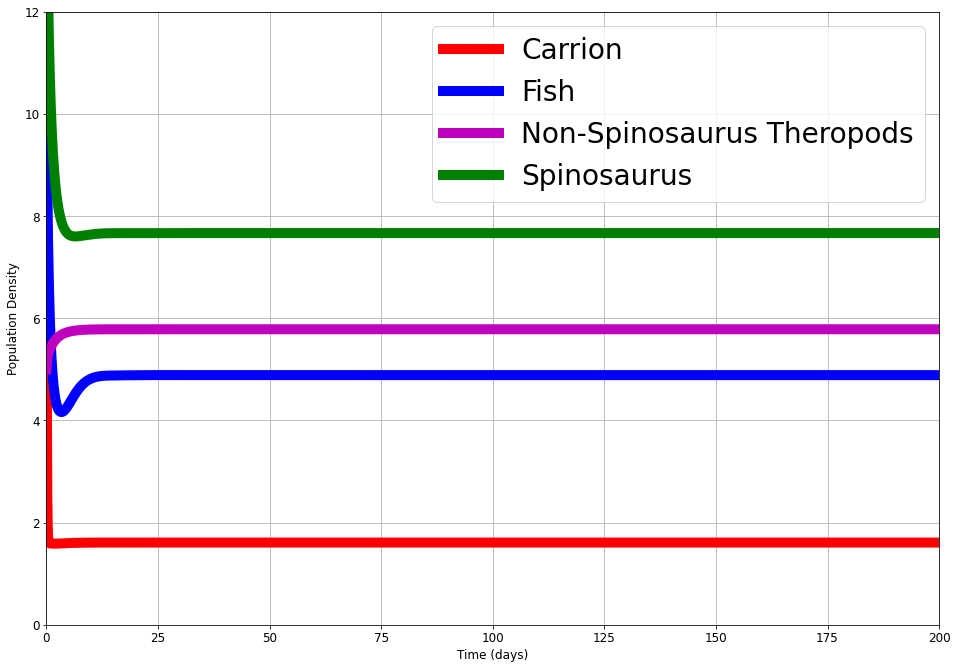

In [49]:
fig, ax = plt.subplots(figsize=(14, 10))

ax.plot(time_list, Carrion, label="Carrion", linestyle="-", linewidth=10, markersize=12,color="r")
ax.plot(time_list, Fish, label="Fish", linestyle="-", linewidth=10, markersize=12,color="b")
ax.plot(time_list, Other_Theropods, label="Non-Spinosaurus Theropods", linestyle="-", linewidth=10, markersize=12,color="m")
ax.plot(time_list, Spinosaurus, label="Spinosaurus", linestyle="-", linewidth=10, markersize=12,color="g")

plt.xlabel("Time (days)")
plt.ylabel("Population Density")
plt.legend(fancybox=True, shadow=True)
plt.xlim([0, time_list[-1]])
plt.ylim([0, 12])
plt.grid()
plt.rcParams.update({'font.size': 30})
leg = ax.legend(prop={"size":28})

plt.savefig('img/No_density_mediated_evolution.eps', format='eps')
plt.tight_layout()
plt.show()

# Absence of Sauropods and others 

## Exponential Density-Mediated Interaction

## Parameter values

In [50]:
lambda_T=0.1
lambda_S=0.01
alpha=1
beta=100
p=20
d=10
a_S=1
h_S=1
a_T=1
h_T=1
O=0
r_F=2
K_F=10
m_T=0.1
q_T=0.1
m_S=0.1
q_S=0.1

y0 = np.array([10, 10, 5, 15])

In [51]:
def model_exponential_density_mediated(
    t,
    X,
    lambda_T=lambda_T,
    lambda_S=lambda_S,
    alpha=alpha,
    beta=beta,
    p=p,
    d=d,
    a_S=a_S,
    h_S=h_S,
    a_T=a_T,
    h_T=h_T,
    O=O,
    r_F=r_F,
    K_F=K_F,
    m_T=m_T,
    q_T=q_T,
    m_S=m_S,
    q_S=q_S,
):
    C, F, T, S = X
    aTS = lambda_T * np.exp( - alpha * S )
    aST = lambda_S * np.exp ( - beta * T )
    C_prime = p - d * C - a_S * C * S / ( 1 + a_S * h_S * C + a_S * h_S * F ) - a_T * C * T / ( 1 + a_T * h_T * C + a_T * h_T + O )
    F_prime = r_F * F * ( 1 - F / K_F ) - a_S * F * S / ( 1 + a_S * h_S * C + a_S * h_S * F )
    T_prime = ( aTS * C * T + a_T * O * T ) / ( 1 + aTS * h_T * C + a_T * h_T * O ) - m_T * T - q_T * T**2
    S_prime = ( aST * C * S + a_S * F * S ) / ( 1 + aST * h_S * C + a_S * h_S * F ) - m_S * S - q_S * S**2
    return C_prime, F_prime, T_prime, S_prime

def ode_solver_exponential_density_mediated(
    y0,
    t_span,
    t_eval,
    lambda_T=lambda_T,
    lambda_S=lambda_S,
    alpha=alpha,
    beta=beta,
    p=p,
    d=d,
    a_S=a_S,
    h_S=h_S,
    a_T=a_T,
    h_T=h_T,
    O=O,
    r_F=r_F,
    K_F=K_F,
    m_T=m_T,
    q_T=q_T,
    m_S=m_S,
    q_S=q_S,
):
    solution_ODE_exponential_density_mediated = solve_ivp(
        fun=model_exponential_density_mediated,
        t_span=t_span,
        y0=y0,
        t_eval=t_eval,
        args=(lambda_T,lambda_S,alpha,beta,p,d,a_S,h_S,a_T,h_T,O,r_F,K_F,m_T,q_T,m_S,q_S),
        method=method,
    )
    return solution_ODE_exponential_density_mediated

t0 = time_list.min()
tf = time_list.max()
days_to_forecast = 0

In [52]:
solution_ODE_exponential_density_mediated = ode_solver_exponential_density_mediated(y0,(t0, tf + days_to_forecast),time_list,lambda_T=lambda_T, lambda_S=lambda_S, alpha=alpha, beta=beta, p=p, d=d, a_S=a_S, h_S=h_S, a_T=a_T, h_T=h_T, O=O, r_F=r_F, K_F=K_F, m_T=m_T, q_T=q_T, m_S=m_S, q_S=q_S)
t_computed_exponential_density_mediated, y_computed_exponential_density_mediated = solution_ODE_exponential_density_mediated.t, solution_ODE_exponential_density_mediated.y
Carrion, Fish, Other_Theropods, Spinosaurus = y_computed_exponential_density_mediated

No handles with labels found to put in legend.
No handles with labels found to put in legend.


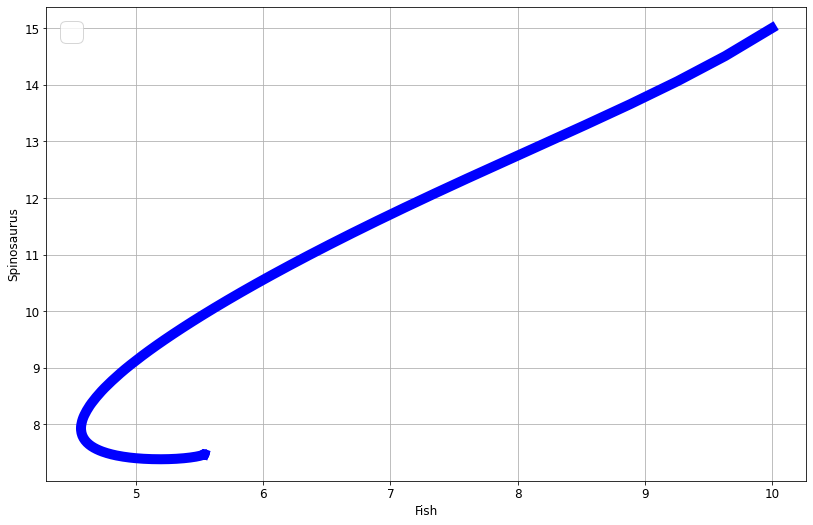

In [53]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(Fish, Spinosaurus, linestyle="-", linewidth=10, markersize=12,color="b")

plt.xlabel("Fish")
plt.ylabel("Spinosaurus")
plt.legend(fancybox=True, shadow=True)
plt.grid()
plt.rcParams.update({'font.size': 30})
leg = ax.legend(prop={"size":28})

plt.tight_layout()
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


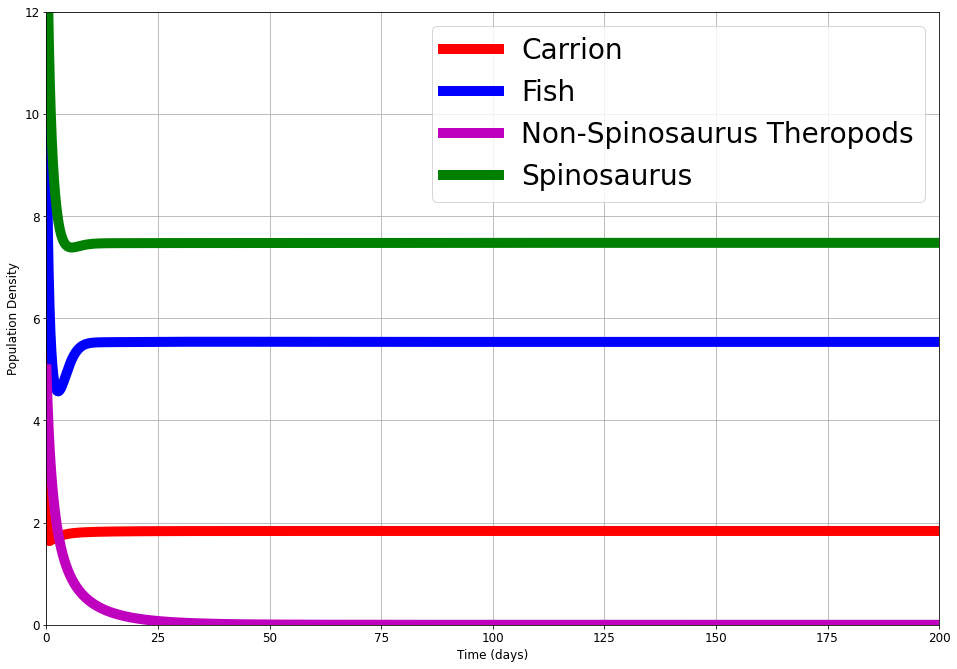

In [54]:
fig, ax = plt.subplots(figsize=(14, 10))

ax.plot(time_list, Carrion, label="Carrion", linestyle="-", linewidth=10, markersize=12,color="r")
ax.plot(time_list, Fish, label="Fish", linestyle="-", linewidth=10, markersize=12,color="b")
ax.plot(time_list, Other_Theropods, label="Non-Spinosaurus Theropods", linestyle="-", linewidth=10, markersize=12,color="m")
ax.plot(time_list, Spinosaurus, label="Spinosaurus", linestyle="-", linewidth=10, markersize=12,color="g")

plt.xlabel("Time (days)")
plt.ylabel("Population Density")
plt.legend(fancybox=True, shadow=True)
plt.xlim([0, time_list[-1]])
plt.ylim([0, 12])
plt.grid()
plt.rcParams.update({'font.size': 30})
leg = ax.legend(prop={"size":28})

plt.savefig('img/exponential_density_mediated_evolution_free_O.eps', format='eps')
plt.tight_layout()
plt.show()

## No density-mediated interaction

In [55]:
def model_No_density_mediated(
    t,
    X,
    p=p,
    d=d,
    a_S=a_S,
    h_S=h_S,
    a_T=a_T,
    h_T=h_T,
    O=O,
    r_F=r_F,
    K_F=K_F,
    m_T=m_T,
    q_T=q_T,
    m_S=m_S,
    q_S=q_S,
):
    C, F, T, S = X
    aTS = a_T
    aST = a_S
    C_prime = p - d * C - a_S * C * S / ( 1 + a_S * h_S * C + a_S * h_S * F ) - a_T * C * T / ( 1 + a_T * h_T * C + a_T * h_T + O )
    F_prime = r_F * F * ( 1 - F / K_F ) - a_S * F * S / ( 1 + a_S * h_S * C + a_S * h_S * F )
    T_prime = ( aTS * C * T + a_T * O * T ) / ( 1 + aTS * h_T * C + a_T * h_T * O ) - m_T * T - q_T * T**2
    S_prime = ( aST * C * S + a_S * F * S ) / ( 1 + aST * h_S * C + a_S * h_S * F ) - m_S * S - q_S * S**2
    return C_prime, F_prime, T_prime, S_prime

def ode_solver_No_density_mediated(
    y0,
    t_span,
    t_eval,
    p=p,
    d=d,
    a_S=a_S,
    h_S=h_S,
    a_T=a_T,
    h_T=h_T,
    O=O,
    r_F=r_F,
    K_F=K_F,
    m_T=m_T,
    q_T=q_T,
    m_S=m_S,
    q_S=q_S,
):
    solution_ODE_No_density_mediated = solve_ivp(
        fun=model_No_density_mediated,
        t_span=t_span,
        y0=y0,
        t_eval=t_eval,
        args=(p,d,a_S,h_S,a_T,h_T,O,r_F,K_F,m_T,q_T,m_S,q_S),
        method=method,
    )
    return solution_ODE_No_density_mediated

t0 = time_list.min()
tf = time_list.max()
days_to_forecast = 0

In [56]:
solution_ODE_No_density_mediated = ode_solver_No_density_mediated(y0,(t0, tf + days_to_forecast),time_list, p=p, d=d, a_S=a_S, h_S=h_S, a_T=a_T, h_T=h_T, O=O, r_F=r_F, K_F=K_F, m_T=m_T, q_T=q_T, m_S=m_S, q_S=q_S)
t_computed_No_density_mediated, y_computed_No_density_mediated = solution_ODE_No_density_mediated.t, solution_ODE_No_density_mediated.y
Carrion, Fish, Other_Theropods, Spinosaurus = y_computed_No_density_mediated

No handles with labels found to put in legend.
No handles with labels found to put in legend.


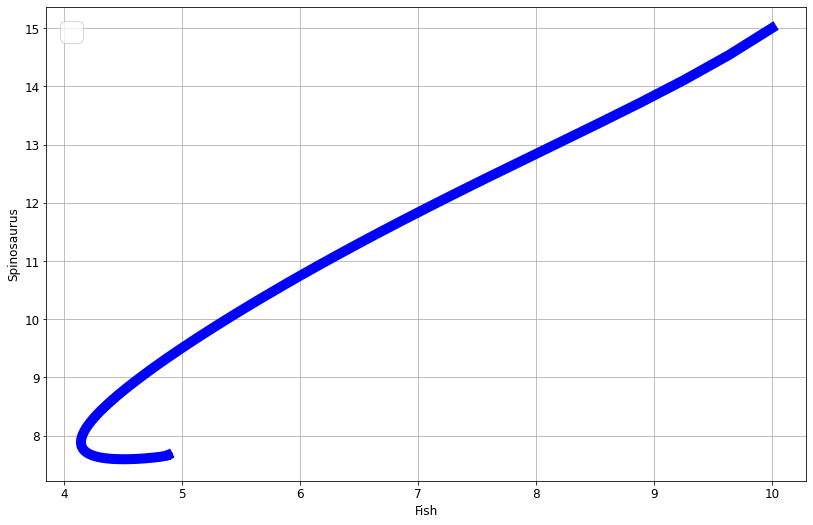

In [57]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(Fish, Spinosaurus, linestyle="-", linewidth=10, markersize=12,color="b")

plt.xlabel("Fish")
plt.ylabel("Spinosaurus")
plt.legend(fancybox=True, shadow=True)
plt.grid()
plt.rcParams.update({'font.size': 30})
leg = ax.legend(prop={"size":28})

plt.tight_layout()
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


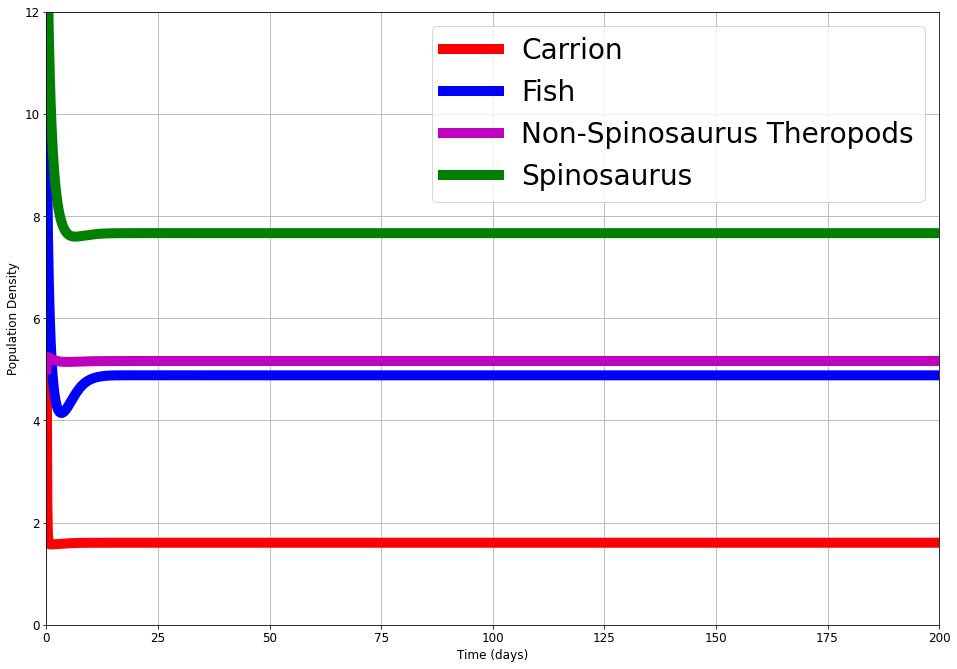

In [58]:
fig, ax = plt.subplots(figsize=(14, 10))

ax.plot(time_list, Carrion, label="Carrion", linestyle="-", linewidth=10, markersize=12,color="r")
ax.plot(time_list, Fish, label="Fish", linestyle="-", linewidth=10, markersize=12,color="b")
ax.plot(time_list, Other_Theropods, label="Non-Spinosaurus Theropods", linestyle="-", linewidth=10, markersize=12,color="m")
ax.plot(time_list, Spinosaurus, label="Spinosaurus", linestyle="-", linewidth=10, markersize=12,color="g")

plt.xlabel("Time (days)")
plt.ylabel("Population Density")
plt.legend(fancybox=True, shadow=True)
plt.xlim([0, time_list[-1]])
plt.ylim([0, 12])
plt.grid()
plt.rcParams.update({'font.size': 30})
leg = ax.legend(prop={"size":28})

plt.savefig('img/No_density_mediated_evolution_free_O.eps', format='eps')
plt.tight_layout()
plt.show()

# Absence of Fishes

## Exponential Density-Mediated Interaction

## Parameter values

In [59]:
lambda_T=0.1
lambda_S=0.01
alpha=1
beta=100
p=20
d=10
a_S=1
h_S=1
a_T=1
h_T=1
O=0.5
r_F=2
K_F=10
m_T=0.1
q_T=0.1
m_S=0.1
q_S=0.1

y0 = np.array([10, 0, 5, 15])

In [60]:
def model_exponential_density_mediated(
    t,
    X,
    lambda_T=lambda_T,
    lambda_S=lambda_S,
    alpha=alpha,
    beta=beta,
    p=p,
    d=d,
    a_S=a_S,
    h_S=h_S,
    a_T=a_T,
    h_T=h_T,
    O=O,
    r_F=r_F,
    K_F=K_F,
    m_T=m_T,
    q_T=q_T,
    m_S=m_S,
    q_S=q_S,
):
    C, F, T, S = X
    aTS = lambda_T * np.exp( - alpha * S )
    aST = lambda_S * np.exp ( - beta * T )
    C_prime = p - d * C - a_S * C * S / ( 1 + a_S * h_S * C + a_S * h_S * F ) - a_T * C * T / ( 1 + a_T * h_T * C + a_T * h_T + O )
    F_prime = 0#r_F * F * ( 1 - F / K_F ) - a_S * F * S / ( 1 + a_S * h_S * C + a_S * h_S * F )
    T_prime = ( aTS * C * T + a_T * O * T ) / ( 1 + aTS * h_T * C + a_T * h_T * O ) - m_T * T - q_T * T**2
    S_prime = ( aST * C * S + a_S * F * S ) / ( 1 + aST * h_S * C + a_S * h_S * F ) - m_S * S - q_S * S**2
    return C_prime, F_prime, T_prime, S_prime

def ode_solver_exponential_density_mediated(
    y0,
    t_span,
    t_eval,
    lambda_T=lambda_T,
    lambda_S=lambda_S,
    alpha=alpha,
    beta=beta,
    p=p,
    d=d,
    a_S=a_S,
    h_S=h_S,
    a_T=a_T,
    h_T=h_T,
    O=O,
    r_F=r_F,
    K_F=K_F,
    m_T=m_T,
    q_T=q_T,
    m_S=m_S,
    q_S=q_S,
):
    solution_ODE_exponential_density_mediated = solve_ivp(
        fun=model_exponential_density_mediated,
        t_span=t_span,
        y0=y0,
        t_eval=t_eval,
        args=(lambda_T,lambda_S,alpha,beta,p,d,a_S,h_S,a_T,h_T,O,r_F,K_F,m_T,q_T,m_S,q_S),
        method=method,
    )
    return solution_ODE_exponential_density_mediated

t0 = time_list.min()
tf = time_list.max()
days_to_forecast = 0

In [61]:
solution_ODE_exponential_density_mediated = ode_solver_exponential_density_mediated(y0,(t0, tf + days_to_forecast),time_list,lambda_T=lambda_T, lambda_S=lambda_S, alpha=alpha, beta=beta, p=p, d=d, a_S=a_S, h_S=h_S, a_T=a_T, h_T=h_T, O=O, r_F=r_F, K_F=K_F, m_T=m_T, q_T=q_T, m_S=m_S, q_S=q_S)
t_computed_exponential_density_mediated, y_computed_exponential_density_mediated = solution_ODE_exponential_density_mediated.t, solution_ODE_exponential_density_mediated.y
Carrion, Fish, Other_Theropods, Spinosaurus = y_computed_exponential_density_mediated

No handles with labels found to put in legend.
No handles with labels found to put in legend.


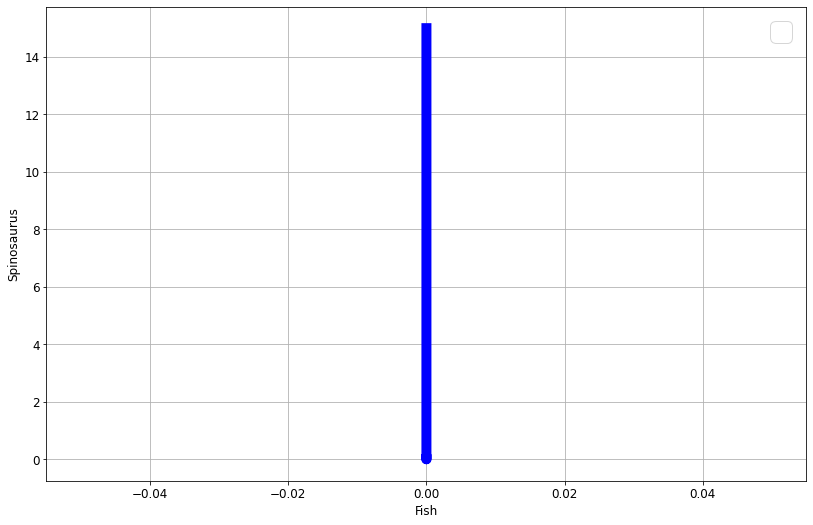

In [62]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(Fish, Spinosaurus, linestyle="-", linewidth=10, markersize=12,color="b")

plt.xlabel("Fish")
plt.ylabel("Spinosaurus")
plt.legend(fancybox=True, shadow=True)
plt.grid()
plt.rcParams.update({'font.size': 30})
leg = ax.legend(prop={"size":28})

plt.tight_layout()
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


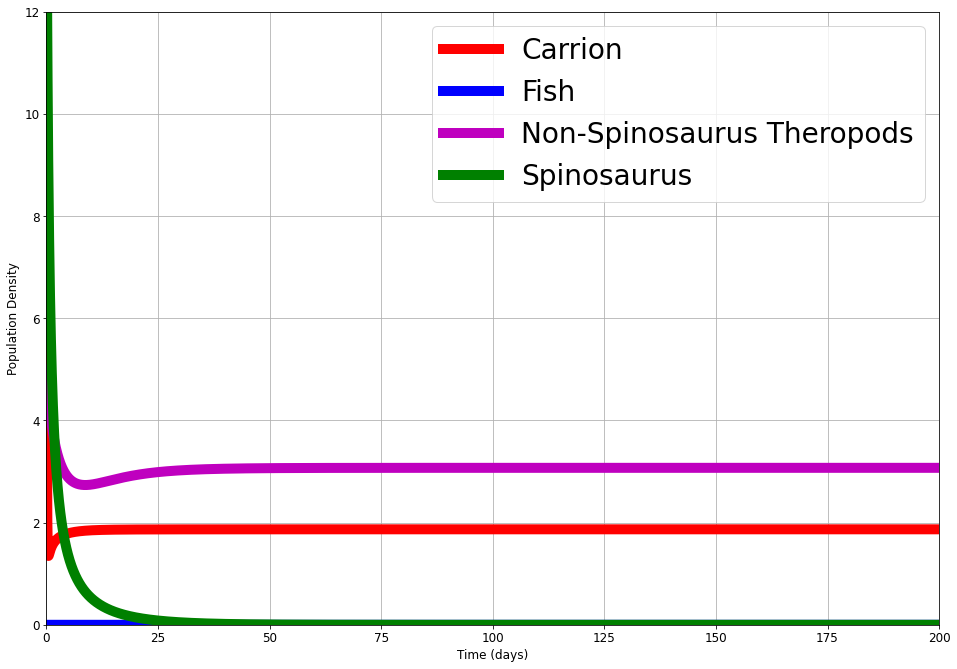

In [63]:
fig, ax = plt.subplots(figsize=(14, 10))

ax.plot(time_list, Carrion, label="Carrion", linestyle="-", linewidth=10, markersize=12,color="r")
ax.plot(time_list, Fish, label="Fish", linestyle="-", linewidth=10, markersize=12,color="b")
ax.plot(time_list, Other_Theropods, label="Non-Spinosaurus Theropods", linestyle="-", linewidth=10, markersize=12,color="m")
ax.plot(time_list, Spinosaurus, label="Spinosaurus", linestyle="-", linewidth=10, markersize=12,color="g")

plt.xlabel("Time (days)")
plt.ylabel("Population Density")
plt.legend(fancybox=True, shadow=True)
plt.xlim([0, time_list[-1]])
plt.ylim([0, 12])
plt.grid()
plt.rcParams.update({'font.size': 30})
leg = ax.legend(prop={"size":28})

plt.savefig('img/exponential_density_mediated_evolution_free_F.eps', format='eps')
plt.tight_layout()
plt.show()

## No density-mediated interaction

In [64]:
def model_No_density_mediated(
    t,
    X,
    p=p,
    d=d,
    a_S=a_S,
    h_S=h_S,
    a_T=a_T,
    h_T=h_T,
    O=O,
    r_F=r_F,
    K_F=K_F,
    m_T=m_T,
    q_T=q_T,
    m_S=m_S,
    q_S=q_S,
):
    C, F, T, S = X
    aTS = a_T
    aST = a_S
    C_prime = p - d * C - a_S * C * S / ( 1 + a_S * h_S * C + a_S * h_S * F ) - a_T * C * T / ( 1 + a_T * h_T * C + a_T * h_T + O )
    F_prime = 0#r_F * F * ( 1 - F / K_F ) - a_S * F * S / ( 1 + a_S * h_S * C + a_S * h_S * F )
    T_prime = ( aTS * C * T + a_T * O * T ) / ( 1 + aTS * h_T * C + a_T * h_T * O ) - m_T * T - q_T * T**2
    S_prime = ( aST * C * S + a_S * F * S ) / ( 1 + aST * h_S * C + a_S * h_S * F ) - m_S * S - q_S * S**2
    return C_prime, F_prime, T_prime, S_prime

def ode_solver_No_density_mediated(
    y0,
    t_span,
    t_eval,
    p=p,
    d=d,
    a_S=a_S,
    h_S=h_S,
    a_T=a_T,
    h_T=h_T,
    O=O,
    r_F=r_F,
    K_F=K_F,
    m_T=m_T,
    q_T=q_T,
    m_S=m_S,
    q_S=q_S,
):
    solution_ODE_No_density_mediated = solve_ivp(
        fun=model_No_density_mediated,
        t_span=t_span,
        y0=y0,
        t_eval=t_eval,
        args=(p,d,a_S,h_S,a_T,h_T,O,r_F,K_F,m_T,q_T,m_S,q_S),
        method=method,
    )
    return solution_ODE_No_density_mediated

t0 = time_list.min()
tf = time_list.max()
days_to_forecast = 0

In [65]:
solution_ODE_No_density_mediated = ode_solver_No_density_mediated(y0,(t0, tf + days_to_forecast),time_list, p=p, d=d, a_S=a_S, h_S=h_S, a_T=a_T, h_T=h_T, O=O, r_F=r_F, K_F=K_F, m_T=m_T, q_T=q_T, m_S=m_S, q_S=q_S)
t_computed_No_density_mediated, y_computed_No_density_mediated = solution_ODE_No_density_mediated.t, solution_ODE_No_density_mediated.y
Carrion, Fish, Other_Theropods, Spinosaurus = y_computed_No_density_mediated

No handles with labels found to put in legend.
No handles with labels found to put in legend.


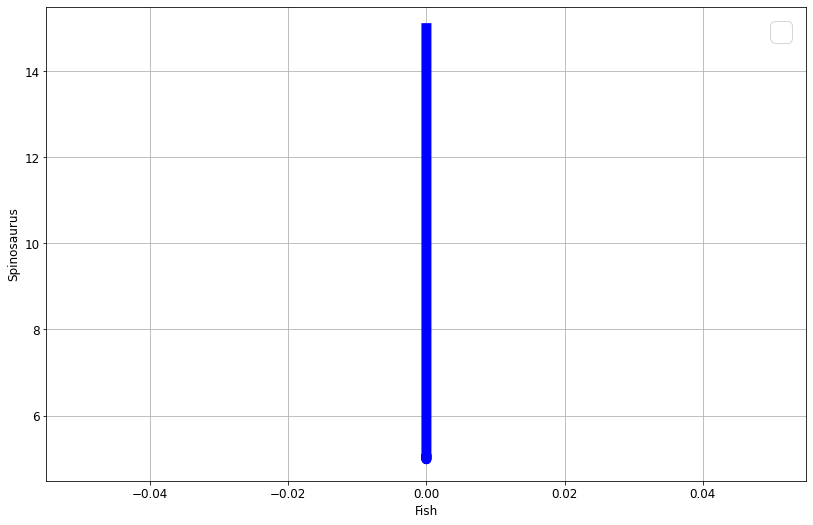

In [66]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(Fish, Spinosaurus, linestyle="-", linewidth=10, markersize=12,color="b")

plt.xlabel("Fish")
plt.ylabel("Spinosaurus")
plt.legend(fancybox=True, shadow=True)
plt.grid()
plt.rcParams.update({'font.size': 30})
leg = ax.legend(prop={"size":28})

plt.tight_layout()
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


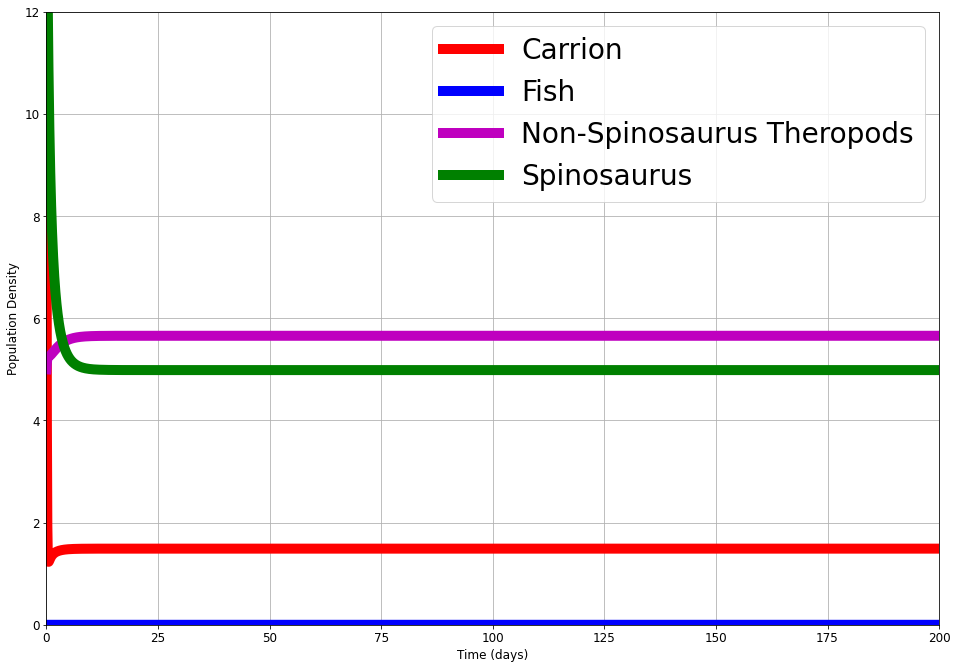

In [67]:
fig, ax = plt.subplots(figsize=(14, 10))

ax.plot(time_list, Carrion, label="Carrion", linestyle="-", linewidth=10, markersize=12,color="r")
ax.plot(time_list, Fish, label="Fish", linestyle="-", linewidth=10, markersize=12,color="b")
ax.plot(time_list, Other_Theropods, label="Non-Spinosaurus Theropods", linestyle="-", linewidth=10, markersize=12,color="m")
ax.plot(time_list, Spinosaurus, label="Spinosaurus", linestyle="-", linewidth=10, markersize=12,color="g")

plt.xlabel("Time (days)")
plt.ylabel("Population Density")
plt.legend(fancybox=True, shadow=True)
plt.xlim([0, time_list[-1]])
plt.ylim([0, 12])
plt.grid()
plt.rcParams.update({'font.size': 30})
leg = ax.legend(prop={"size":28})

plt.savefig('img/No_density_mediated_evolution_free_F.eps', format='eps')
plt.tight_layout()
plt.show()

# Absence of Fishes and Sauropods and others 

## Exponential Density-Mediated Interaction

## Parameter values

In [68]:
lambda_T=0.1
lambda_S=0.01
alpha=1
beta=100
p=20
d=10
a_S=1
h_S=1
a_T=1
h_T=1
O=0
r_F=2
K_F=10
m_T=0.1
q_T=0.1
m_S=0.1
q_S=0.1

y0 = np.array([10, 0, 5, 15])

In [69]:
def model_exponential_density_mediated(
    t,
    X,
    lambda_T=lambda_T,
    lambda_S=lambda_S,
    alpha=alpha,
    beta=beta,
    p=p,
    d=d,
    a_S=a_S,
    h_S=h_S,
    a_T=a_T,
    h_T=h_T,
    O=O,
    r_F=r_F,
    K_F=K_F,
    m_T=m_T,
    q_T=q_T,
    m_S=m_S,
    q_S=q_S,
):
    C, F, T, S = X
    aTS = lambda_T * np.exp( - alpha * S )
    aST = lambda_S * np.exp ( - beta * T )
    C_prime = p - d * C - a_S * C * S / ( 1 + a_S * h_S * C + a_S * h_S * F ) - a_T * C * T / ( 1 + a_T * h_T * C + a_T * h_T + O )
    F_prime = 0#r_F * F * ( 1 - F / K_F ) - a_S * F * S / ( 1 + a_S * h_S * C + a_S * h_S * F )
    T_prime = ( aTS * C * T + a_T * O * T ) / ( 1 + aTS * h_T * C + a_T * h_T * O ) - m_T * T - q_T * T**2
    S_prime = ( aST * C * S + a_S * F * S ) / ( 1 + aST * h_S * C + a_S * h_S * F ) - m_S * S - q_S * S**2
    return C_prime, F_prime, T_prime, S_prime

def ode_solver_exponential_density_mediated(
    y0,
    t_span,
    t_eval,
    lambda_T=lambda_T,
    lambda_S=lambda_S,
    alpha=alpha,
    beta=beta,
    p=p,
    d=d,
    a_S=a_S,
    h_S=h_S,
    a_T=a_T,
    h_T=h_T,
    O=O,
    r_F=r_F,
    K_F=K_F,
    m_T=m_T,
    q_T=q_T,
    m_S=m_S,
    q_S=q_S,
):
    solution_ODE_exponential_density_mediated = solve_ivp(
        fun=model_exponential_density_mediated,
        t_span=t_span,
        y0=y0,
        t_eval=t_eval,
        args=(lambda_T,lambda_S,alpha,beta,p,d,a_S,h_S,a_T,h_T,O,r_F,K_F,m_T,q_T,m_S,q_S),
        method=method,
    )
    return solution_ODE_exponential_density_mediated

t0 = time_list.min()
tf = time_list.max()
days_to_forecast = 0

In [70]:
solution_ODE_exponential_density_mediated = ode_solver_exponential_density_mediated(y0,(t0, tf + days_to_forecast),time_list,lambda_T=lambda_T, lambda_S=lambda_S, alpha=alpha, beta=beta, p=p, d=d, a_S=a_S, h_S=h_S, a_T=a_T, h_T=h_T, O=O, r_F=r_F, K_F=K_F, m_T=m_T, q_T=q_T, m_S=m_S, q_S=q_S)
t_computed_exponential_density_mediated, y_computed_exponential_density_mediated = solution_ODE_exponential_density_mediated.t, solution_ODE_exponential_density_mediated.y
Carrion, Fish, Other_Theropods, Spinosaurus = y_computed_exponential_density_mediated

No handles with labels found to put in legend.
No handles with labels found to put in legend.


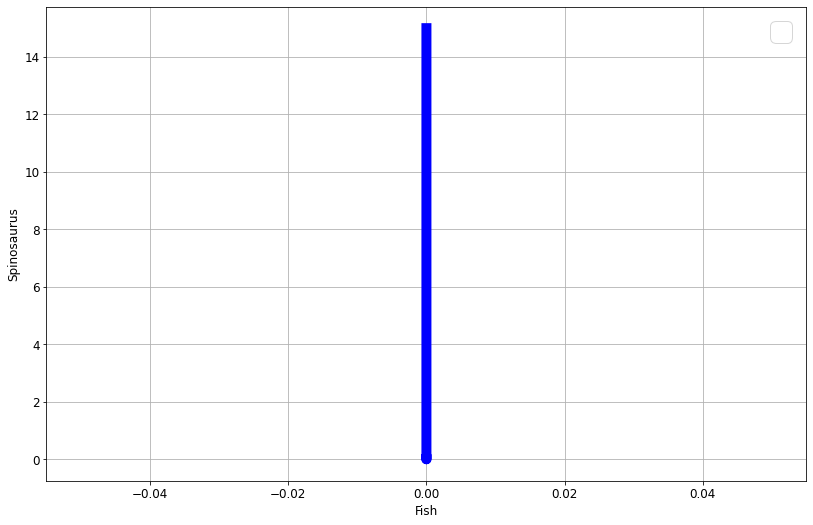

In [71]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(Fish, Spinosaurus, linestyle="-", linewidth=10, markersize=12,color="b")

plt.xlabel("Fish")
plt.ylabel("Spinosaurus")
plt.legend(fancybox=True, shadow=True)
plt.grid()
plt.rcParams.update({'font.size': 30})
leg = ax.legend(prop={"size":28})

plt.tight_layout()
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


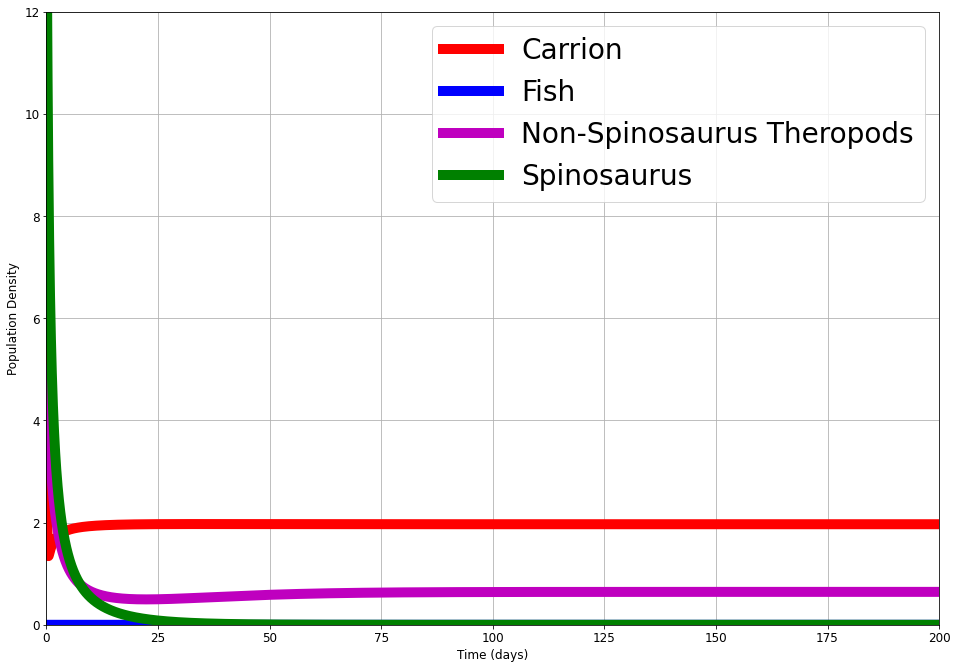

In [72]:
fig, ax = plt.subplots(figsize=(14, 10))

ax.plot(time_list, Carrion, label="Carrion", linestyle="-", linewidth=10, markersize=12,color="r")
ax.plot(time_list, Fish, label="Fish", linestyle="-", linewidth=10, markersize=12,color="b")
ax.plot(time_list, Other_Theropods, label="Non-Spinosaurus Theropods", linestyle="-", linewidth=10, markersize=12,color="m")
ax.plot(time_list, Spinosaurus, label="Spinosaurus", linestyle="-", linewidth=10, markersize=12,color="g")

plt.xlabel("Time (days)")
plt.ylabel("Population Density")
plt.legend(fancybox=True, shadow=True)
plt.xlim([0, time_list[-1]])
plt.ylim([0, 12])
plt.grid()
plt.rcParams.update({'font.size': 30})
leg = ax.legend(prop={"size":28})

plt.savefig('img/exponential_density_mediated_evolution_free_FO.eps', format='eps')
plt.tight_layout()
plt.show()

## No density-mediated interaction

In [73]:
def model_No_density_mediated(
    t,
    X,
    p=p,
    d=d,
    a_S=a_S,
    h_S=h_S,
    a_T=a_T,
    h_T=h_T,
    O=O,
    r_F=r_F,
    K_F=K_F,
    m_T=m_T,
    q_T=q_T,
    m_S=m_S,
    q_S=q_S,
):
    C, F, T, S = X
    aTS = a_T
    aST = a_S
    C_prime = p - d * C - a_S * C * S / ( 1 + a_S * h_S * C + a_S * h_S * F ) - a_T * C * T / ( 1 + a_T * h_T * C + a_T * h_T + O )
    F_prime = 0#r_F * F * ( 1 - F / K_F ) - a_S * F * S / ( 1 + a_S * h_S * C + a_S * h_S * F )
    T_prime = ( aTS * C * T + a_T * O * T ) / ( 1 + aTS * h_T * C + a_T * h_T * O ) - m_T * T - q_T * T**2
    S_prime = ( aST * C * S + a_S * F * S ) / ( 1 + aST * h_S * C + a_S * h_S * F ) - m_S * S - q_S * S**2
    return C_prime, F_prime, T_prime, S_prime

def ode_solver_No_density_mediated(
    y0,
    t_span,
    t_eval,
    p=p,
    d=d,
    a_S=a_S,
    h_S=h_S,
    a_T=a_T,
    h_T=h_T,
    O=O,
    r_F=r_F,
    K_F=K_F,
    m_T=m_T,
    q_T=q_T,
    m_S=m_S,
    q_S=q_S,
):
    solution_ODE_No_density_mediated = solve_ivp(
        fun=model_No_density_mediated,
        t_span=t_span,
        y0=y0,
        t_eval=t_eval,
        args=(p,d,a_S,h_S,a_T,h_T,O,r_F,K_F,m_T,q_T,m_S,q_S),
        method=method,
    )
    return solution_ODE_No_density_mediated

t0 = time_list.min()
tf = time_list.max()
days_to_forecast = 0

In [74]:
solution_ODE_No_density_mediated = ode_solver_No_density_mediated(y0,(t0, tf + days_to_forecast),time_list, p=p, d=d, a_S=a_S, h_S=h_S, a_T=a_T, h_T=h_T, O=O, r_F=r_F, K_F=K_F, m_T=m_T, q_T=q_T, m_S=m_S, q_S=q_S)
t_computed_No_density_mediated, y_computed_No_density_mediated = solution_ODE_No_density_mediated.t, solution_ODE_No_density_mediated.y
Carrion, Fish, Other_Theropods, Spinosaurus = y_computed_No_density_mediated

No handles with labels found to put in legend.
No handles with labels found to put in legend.


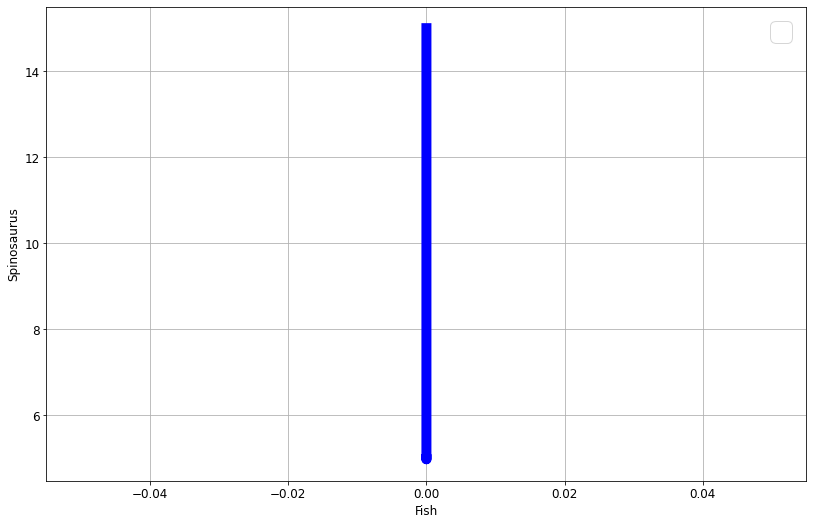

In [75]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(Fish, Spinosaurus, linestyle="-", linewidth=10, markersize=12,color="b")

plt.xlabel("Fish")
plt.ylabel("Spinosaurus")
plt.legend(fancybox=True, shadow=True)
plt.grid()
plt.rcParams.update({'font.size': 30})
leg = ax.legend(prop={"size":28})

plt.tight_layout()
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


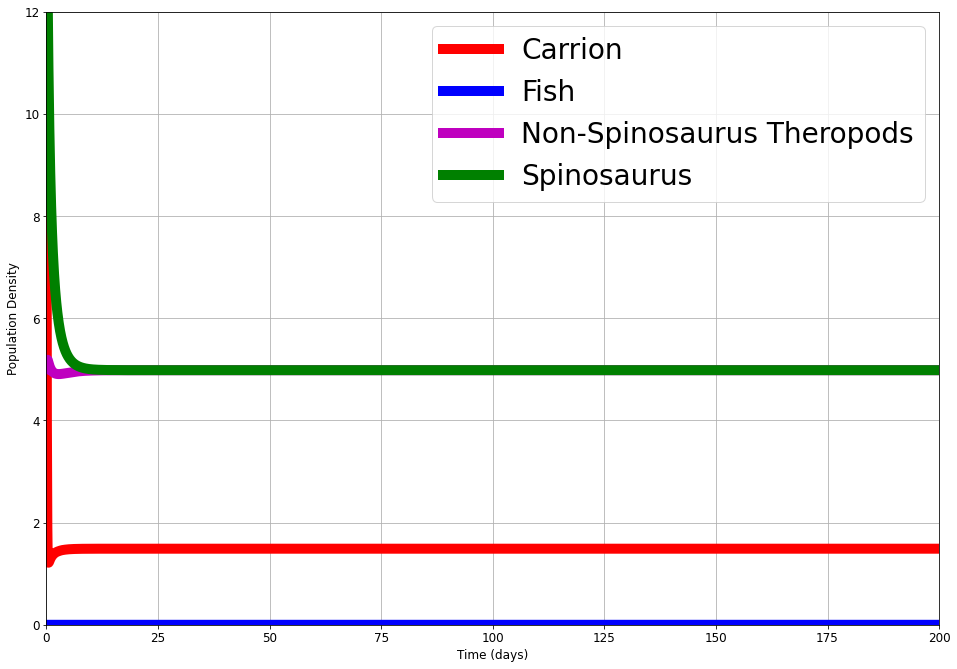

In [76]:
fig, ax = plt.subplots(figsize=(14, 10))

ax.plot(time_list, Carrion, label="Carrion", linestyle="-", linewidth=10, markersize=12,color="r")
ax.plot(time_list, Fish, label="Fish", linestyle="-", linewidth=10, markersize=12,color="b")
ax.plot(time_list, Other_Theropods, label="Non-Spinosaurus Theropods", linestyle="-", linewidth=10, markersize=12,color="m")
ax.plot(time_list, Spinosaurus, label="Spinosaurus", linestyle="-", linewidth=10, markersize=12,color="g")

plt.xlabel("Time (days)")
plt.ylabel("Population Density")
plt.legend(fancybox=True, shadow=True)
plt.xlim([0, time_list[-1]])
plt.ylim([0, 12])
plt.grid()
plt.rcParams.update({'font.size': 30})
leg = ax.legend(prop={"size":28})

plt.savefig('img/No_density_mediated_evolution_free_FO.eps', format='eps')
plt.tight_layout()
plt.show()